In [309]:
from scipy.optimize import fmin
from scipy import ndimage
# from os import path
import numpy as np
import json
import time

# function to compute error in depth calculation for a guessed depth compared to a calculated depth for a given flow
def Manning_Q(y, n, S0, B):
    return (1.49/n)*(S0**0.5)*((B*y)**(5/3))/((B+y)**(2/3))

def flow_min(y, n, S0, Q, B):
    return np.abs(Manning_Q(y, n, S0, B) - Q)

def y_direct(B, n, S0, Q):
    y_optimum = fmin(flow_min, Q/B/3, args=(n, S0, Q, B), full_output=True, disp=False)
    return float(y_optimum[0])
                     
B_dict = np.linspace(30, 2000, 1000001, endpoint=True)
n_dict = np.linspace(0.01, 0.05, 1000001, endpoint=True)
S0_dict = np.logspace(-5, -2.5, 1000001, endpoint=True)
Q_dict = np.logspace(2.7, 5.2, 1000001, endpoint=True)
    
#     B_dict = np.linspace(500, 1000, 51, endpoint=True)
#     n_dict = np.linspace(0.01, 0.05, 51, endpoint=True)
#     S0_dict = np.logspace(-5, -2.5, 51, endpoint=True)
#     Q_dict = np.logspace(2.7, 5.2, 51, endpoint=True)

#B 30 - 2000
#n 

In [310]:
# import random 
# from random import randint
# Y = []
# M = []
# for i in range(0,len(B_dict)):
# #     j = randint(0,len(B_dict)-1)
# #     k = randint(0,len(B_dict)-1)
# #     l = randint(0,len(B_dict)-1)
# #     m = randint(0,len(B_dict)-1)
#     S = y_direct(B_dict[i],n_dict[i],S0_dict[i],Q_dict[i])
#     Y.append(round(S,4))
#     M.append([B_dict[i],n_dict[i],S0_dict[i],Q_dict[i]])
# #link inputs of each iteration to input array train
# # possibly do every combo first then do rand on test data

# Y = np.array(Y)

# #not random 

In [311]:
import random 
from random import randint
Y = []
M = []
for i in range(0,len(B_dict)):
    j = randint(0,len(B_dict)-1)
    k = randint(0,len(B_dict)-1)
    l = randint(0,len(B_dict)-1)
    m = randint(0,len(B_dict)-1)
    S = y_direct(B_dict[j],n_dict[k],S0_dict[l],Q_dict[m])
    Y.append(round(S,4))
    M.append([B_dict[j],n_dict[k],S0_dict[l],Q_dict[m]])
#link inputs of each iteration to input array train
# possibly do every combo first then do rand on test data

Y = np.array(Y)

/shared/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


In [312]:
print(Y[:10])

[ 1.226  16.9832  0.9536  4.581  64.531   3.4871  7.9956 27.3871 16.9421
 15.1899]


In [313]:
print(len(B_dict))
print(len(n_dict))
print(len(S0_dict))
print(len(Q_dict))

1000001
1000001
1000001
1000001


In [314]:

# M=[]
# for i in range(0,len(B_dict)):
#     M.append([B_dict[i],n_dict[i],S0_dict[i],Q_dict[i]])

In [315]:
TOP = int(len(B_dict)*.9)

# xxtrain = np.array(M[:TOP])
# yytrain = np.array(Y[:TOP])
# xxtest = np.array(M[TOP:])
# yytest = np.array(Y[TOP:])
# # print(len(xxtrain))

In [322]:
from sklearn.preprocessing import StandardScaler
M = np.array(M)
# demonstrate data standardization with sklearn

# load data
data = M
# create scaler
scaler = StandardScaler()
# fit scaler on data
scaler.fit(data)
# apply transform
standardized = scaler.transform(data)
# inverse transform
inverse = scaler.inverse_transform(standardized)

Train on 720000 samples, validate on 180000 samples
Epoch 1/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 649.4389 - mse: 649.4393 - mean_absolute_error: 5.3368 - val_loss: 633.3160 - val_mse: 633.3161 - val_mean_absolute_error: 3.3392
Epoch 2/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 303.2564 - mse: 303.2563 - mean_absolute_error: 3.1339 - val_loss: 365.3966 - val_mse: 365.3966 - val_mean_absolute_error: 2.9030
Epoch 3/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 246.1810 - mse: 246.1812 - mean_absolute_error: 3.0609 - val_loss: 486.0137 - val_mse: 486.0137 - val_mean_absolute_error: 4.9809
Epoch 4/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 239.3639 - mse: 239.3640 - mean_absolute_error: 2.9996 - val_loss: 1009.3886 - val_mse: 1009.3886 - val_mean_absolute_error: 5.5254
Epoch 5/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2

Epoch 39/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 109.4732 - mse: 109.4732 - mean_absolute_error: 1.7271 - val_loss: 106.3472 - val_mse: 106.3472 - val_mean_absolute_error: 1.2299
Epoch 40/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 88.7915 - mse: 88.7915 - mean_absolute_error: 1.5628 - val_loss: 129.8935 - val_mse: 129.8935 - val_mean_absolute_error: 2.4205
Epoch 41/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 174.1628 - mse: 174.1629 - mean_absolute_error: 2.3287 - val_loss: 196.3788 - val_mse: 196.3788 - val_mean_absolute_error: 1.3984
Epoch 42/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 112.4371 - mse: 112.4371 - mean_absolute_error: 1.8371 - val_loss: 140.3581 - val_mse: 140.3581 - val_mean_absolute_error: 1.6796
Epoch 43/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 158.5593 - mse: 158.5593 - mean_absolute_error: 2.01

720000/720000 [==============================] - 3s 4us/sample - loss: 118.5358 - mse: 118.5358 - mean_absolute_error: 2.4534 - val_loss: 220.1893 - val_mse: 220.1893 - val_mean_absolute_error: 2.0810
Epoch 78/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 105.4288 - mse: 105.4288 - mean_absolute_error: 1.9450 - val_loss: 864.4384 - val_mse: 864.4381 - val_mean_absolute_error: 4.9611
Epoch 79/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 92.4590 - mse: 92.4590 - mean_absolute_error: 1.9671 - val_loss: 93.2805 - val_mse: 93.2804 - val_mean_absolute_error: 1.4259
Epoch 80/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 69.5299 - mse: 69.5299 - mean_absolute_error: 1.6757 - val_loss: 188.9017 - val_mse: 188.9017 - val_mean_absolute_error: 1.5061
Epoch 81/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 92.3023 - mse: 92.3023 - mean_absolute_error: 1.7611 - val_loss: 109.07

720000/720000 [==============================] - 3s 4us/sample - loss: 71.6015 - mse: 71.6015 - mean_absolute_error: 1.6617 - val_loss: 72.5540 - val_mse: 72.5540 - val_mean_absolute_error: 1.2756
Epoch 116/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 67.2779 - mse: 67.2779 - mean_absolute_error: 1.6585 - val_loss: 66.5817 - val_mse: 66.5817 - val_mean_absolute_error: 1.5883
Epoch 117/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 70.5614 - mse: 70.5614 - mean_absolute_error: 1.6520 - val_loss: 205.2719 - val_mse: 205.2719 - val_mean_absolute_error: 1.7100
Epoch 118/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 63.8382 - mse: 63.8382 - mean_absolute_error: 1.6485 - val_loss: 109.1390 - val_mse: 109.1390 - val_mean_absolute_error: 2.2333
Epoch 119/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 77.1193 - mse: 77.1193 - mean_absolute_error: 1.7782 - val_loss: 844.2067

720000/720000 [==============================] - 3s 4us/sample - loss: 90.0810 - mse: 90.0811 - mean_absolute_error: 1.8747 - val_loss: 199.2677 - val_mse: 199.2678 - val_mean_absolute_error: 1.4711
Epoch 154/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 103.7737 - mse: 103.7738 - mean_absolute_error: 1.7949 - val_loss: 182.5206 - val_mse: 182.5206 - val_mean_absolute_error: 3.9814
Epoch 155/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 70.5822 - mse: 70.5822 - mean_absolute_error: 1.5858 - val_loss: 115.5339 - val_mse: 115.5339 - val_mean_absolute_error: 2.3493
Epoch 156/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 63.7675 - mse: 63.7675 - mean_absolute_error: 1.3841 - val_loss: 86.2757 - val_mse: 86.2757 - val_mean_absolute_error: 1.1781
Epoch 157/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 110.3847 - mse: 110.3846 - mean_absolute_error: 1.9943 - val_loss: 13

720000/720000 [==============================] - 3s 4us/sample - loss: 46.5800 - mse: 46.5800 - mean_absolute_error: 1.2652 - val_loss: 90.6942 - val_mse: 90.6942 - val_mean_absolute_error: 1.0860
Epoch 192/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 50.5927 - mse: 50.5927 - mean_absolute_error: 1.3464 - val_loss: 71.1270 - val_mse: 71.1270 - val_mean_absolute_error: 1.1632
Epoch 193/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 60.0625 - mse: 60.0626 - mean_absolute_error: 1.4303 - val_loss: 98.9554 - val_mse: 98.9554 - val_mean_absolute_error: 1.7243
Epoch 194/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 54.6185 - mse: 54.6185 - mean_absolute_error: 1.3744 - val_loss: 131.7136 - val_mse: 131.7136 - val_mean_absolute_error: 1.5182
Epoch 195/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 34.6061 - mse: 34.6060 - mean_absolute_error: 1.1435 - val_loss: 46.6341 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 74.3975 - mse: 74.3975 - mean_absolute_error: 1.7609 - val_loss: 64.5620 - val_mse: 64.5620 - val_mean_absolute_error: 2.0940
Epoch 230/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 43.4588 - mse: 43.4588 - mean_absolute_error: 1.6191 - val_loss: 95.6366 - val_mse: 95.6366 - val_mean_absolute_error: 1.6821
Epoch 231/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 82.1933 - mse: 82.1933 - mean_absolute_error: 2.0414 - val_loss: 78.3234 - val_mse: 78.3233 - val_mean_absolute_error: 1.7863
Epoch 232/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 39.2106 - mse: 39.2106 - mean_absolute_error: 1.5831 - val_loss: 53.6739 - val_mse: 53.6739 - val_mean_absolute_error: 1.4641
Epoch 233/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 100.1301 - mse: 100.1301 - mean_absolute_error: 1.9135 - val_loss: 283.2004 -

720000/720000 [==============================] - 3s 4us/sample - loss: 40.3833 - mse: 40.3834 - mean_absolute_error: 1.4056 - val_loss: 63.4364 - val_mse: 63.4364 - val_mean_absolute_error: 1.2936
Epoch 268/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 28.8389 - mse: 28.8390 - mean_absolute_error: 1.3022 - val_loss: 78.8473 - val_mse: 78.8473 - val_mean_absolute_error: 1.6112
Epoch 269/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 39.2180 - mse: 39.2180 - mean_absolute_error: 1.3623 - val_loss: 45.9824 - val_mse: 45.9825 - val_mean_absolute_error: 1.3759
Epoch 270/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 96.7432 - mse: 96.7432 - mean_absolute_error: 1.8381 - val_loss: 39.3629 - val_mse: 39.3629 - val_mean_absolute_error: 1.3244
Epoch 271/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 53.8715 - mse: 53.8716 - mean_absolute_error: 1.6018 - val_loss: 114.8355 - v

720000/720000 [==============================] - 3s 4us/sample - loss: 27.8474 - mse: 27.8474 - mean_absolute_error: 1.1584 - val_loss: 28.1343 - val_mse: 28.1343 - val_mean_absolute_error: 1.0464
Epoch 306/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 56.8684 - mse: 56.8684 - mean_absolute_error: 1.4741 - val_loss: 65.8042 - val_mse: 65.8042 - val_mean_absolute_error: 1.8351
Epoch 307/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 91.9777 - mse: 91.9778 - mean_absolute_error: 1.8188 - val_loss: 53.4627 - val_mse: 53.4627 - val_mean_absolute_error: 1.2849
Epoch 308/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 57.9321 - mse: 57.9321 - mean_absolute_error: 1.5031 - val_loss: 37.9151 - val_mse: 37.9151 - val_mean_absolute_error: 1.0456
Epoch 309/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 40.4883 - mse: 40.4883 - mean_absolute_error: 1.3148 - val_loss: 52.9901 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 24.7194 - mse: 24.7194 - mean_absolute_error: 1.1050 - val_loss: 42.3186 - val_mse: 42.3186 - val_mean_absolute_error: 1.0753
Epoch 344/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 41.5387 - mse: 41.5387 - mean_absolute_error: 1.2501 - val_loss: 55.3799 - val_mse: 55.3799 - val_mean_absolute_error: 1.2384
Epoch 345/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 36.6484 - mse: 36.6484 - mean_absolute_error: 1.1884 - val_loss: 30.8996 - val_mse: 30.8996 - val_mean_absolute_error: 0.9193
Epoch 346/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 31.4306 - mse: 31.4307 - mean_absolute_error: 1.1809 - val_loss: 27.4169 - val_mse: 27.4169 - val_mean_absolute_error: 0.8934
Epoch 347/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 57.1962 - mse: 57.1962 - mean_absolute_error: 1.3735 - val_loss: 53.9881 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 64.9818 - mse: 64.9818 - mean_absolute_error: 1.3805 - val_loss: 83.0219 - val_mse: 83.0219 - val_mean_absolute_error: 1.1206
Epoch 382/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 32.6472 - mse: 32.6473 - mean_absolute_error: 1.1200 - val_loss: 220.7716 - val_mse: 220.7716 - val_mean_absolute_error: 1.7898
Epoch 383/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 61.4725 - mse: 61.4725 - mean_absolute_error: 1.3808 - val_loss: 151.2421 - val_mse: 151.2421 - val_mean_absolute_error: 2.4133
Epoch 384/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 48.1823 - mse: 48.1823 - mean_absolute_error: 1.3049 - val_loss: 93.0331 - val_mse: 93.0331 - val_mean_absolute_error: 1.2482
Epoch 385/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 51.9005 - mse: 51.9005 - mean_absolute_error: 1.3636 - val_loss: 96.7058 

720000/720000 [==============================] - 3s 4us/sample - loss: 33.6012 - mse: 33.6012 - mean_absolute_error: 1.1808 - val_loss: 45.3721 - val_mse: 45.3721 - val_mean_absolute_error: 1.0954
Epoch 420/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 20.7450 - mse: 20.7450 - mean_absolute_error: 0.9883 - val_loss: 143.2242 - val_mse: 143.2242 - val_mean_absolute_error: 1.3004
Epoch 421/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 51.5204 - mse: 51.5204 - mean_absolute_error: 1.3030 - val_loss: 52.0060 - val_mse: 52.0060 - val_mean_absolute_error: 1.2036
Epoch 422/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 56.9474 - mse: 56.9474 - mean_absolute_error: 1.3320 - val_loss: 110.4675 - val_mse: 110.4675 - val_mean_absolute_error: 1.3962
Epoch 423/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 34.8359 - mse: 34.8359 - mean_absolute_error: 1.1619 - val_loss: 32.1393 

720000/720000 [==============================] - 3s 4us/sample - loss: 29.5725 - mse: 29.5725 - mean_absolute_error: 1.1113 - val_loss: 49.3001 - val_mse: 49.3001 - val_mean_absolute_error: 1.0385
Epoch 458/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 50.7355 - mse: 50.7355 - mean_absolute_error: 1.3439 - val_loss: 46.0761 - val_mse: 46.0761 - val_mean_absolute_error: 1.9707
Epoch 459/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 24.1353 - mse: 24.1353 - mean_absolute_error: 1.0249 - val_loss: 25.7949 - val_mse: 25.7949 - val_mean_absolute_error: 1.0318
Epoch 460/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 102.6495 - mse: 102.6496 - mean_absolute_error: 1.5649 - val_loss: 44.5633 - val_mse: 44.5633 - val_mean_absolute_error: 0.8314
Epoch 461/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 28.5152 - mse: 28.5152 - mean_absolute_error: 1.0542 - val_loss: 37.1321 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 44.1202 - mse: 44.1202 - mean_absolute_error: 1.2239 - val_loss: 36.2105 - val_mse: 36.2106 - val_mean_absolute_error: 0.8207
Epoch 496/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 27.1425 - mse: 27.1425 - mean_absolute_error: 1.0205 - val_loss: 43.4267 - val_mse: 43.4267 - val_mean_absolute_error: 0.8332
Epoch 497/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 36.5840 - mse: 36.5840 - mean_absolute_error: 1.0568 - val_loss: 396.0221 - val_mse: 396.0221 - val_mean_absolute_error: 2.5514
Epoch 498/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 39.8093 - mse: 39.8093 - mean_absolute_error: 1.2027 - val_loss: 38.7498 - val_mse: 38.7498 - val_mean_absolute_error: 0.8049
Epoch 499/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 27.0918 - mse: 27.0918 - mean_absolute_error: 1.0470 - val_loss: 32.7615 - 

720000/720000 [==============================] - 3s 3us/sample - loss: 25.5035 - mse: 25.5036 - mean_absolute_error: 0.9465 - val_loss: 52.7960 - val_mse: 52.7960 - val_mean_absolute_error: 0.7793
Epoch 534/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 17.3310 - mse: 17.3310 - mean_absolute_error: 0.9011 - val_loss: 29.4251 - val_mse: 29.4251 - val_mean_absolute_error: 0.6988
Epoch 535/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 18.7120 - mse: 18.7120 - mean_absolute_error: 0.9003 - val_loss: 19.7925 - val_mse: 19.7925 - val_mean_absolute_error: 0.7095
Epoch 536/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 65.9578 - mse: 65.9578 - mean_absolute_error: 1.3796 - val_loss: 38.3816 - val_mse: 38.3816 - val_mean_absolute_error: 0.7692
Epoch 537/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 17.2005 - mse: 17.2005 - mean_absolute_error: 0.8275 - val_loss: 30.2611 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 25.8785 - mse: 25.8785 - mean_absolute_error: 0.9893 - val_loss: 37.5459 - val_mse: 37.5459 - val_mean_absolute_error: 0.8433
Epoch 572/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 35.5234 - mse: 35.5235 - mean_absolute_error: 1.1241 - val_loss: 44.4659 - val_mse: 44.4659 - val_mean_absolute_error: 0.7608
Epoch 573/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.0032 - mse: 19.0032 - mean_absolute_error: 0.8875 - val_loss: 36.3068 - val_mse: 36.3068 - val_mean_absolute_error: 0.6865
Epoch 574/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 22.7335 - mse: 22.7335 - mean_absolute_error: 0.9235 - val_loss: 39.2508 - val_mse: 39.2508 - val_mean_absolute_error: 0.9318
Epoch 575/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 37.3943 - mse: 37.3943 - mean_absolute_error: 1.1779 - val_loss: 66.3136 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 25.1807 - mse: 25.1807 - mean_absolute_error: 1.1132 - val_loss: 37.6536 - val_mse: 37.6536 - val_mean_absolute_error: 1.2439
Epoch 610/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 25.1687 - mse: 25.1687 - mean_absolute_error: 1.0079 - val_loss: 33.6676 - val_mse: 33.6676 - val_mean_absolute_error: 0.7726
Epoch 611/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 20.7041 - mse: 20.7041 - mean_absolute_error: 0.9269 - val_loss: 74.0385 - val_mse: 74.0385 - val_mean_absolute_error: 1.0191
Epoch 612/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 30.9699 - mse: 30.9699 - mean_absolute_error: 1.0727 - val_loss: 43.8366 - val_mse: 43.8366 - val_mean_absolute_error: 1.4246
Epoch 613/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 21.8282 - mse: 21.8282 - mean_absolute_error: 0.8613 - val_loss: 193.8832 - v

720000/720000 [==============================] - 3s 4us/sample - loss: 28.2546 - mse: 28.2546 - mean_absolute_error: 0.9970 - val_loss: 24.5241 - val_mse: 24.5241 - val_mean_absolute_error: 0.6632
Epoch 648/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.7391 - mse: 15.7391 - mean_absolute_error: 0.7751 - val_loss: 24.4903 - val_mse: 24.4903 - val_mean_absolute_error: 0.5645
Epoch 649/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 36.2229 - mse: 36.2229 - mean_absolute_error: 1.0236 - val_loss: 32.0178 - val_mse: 32.0178 - val_mean_absolute_error: 1.1408
Epoch 650/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 29.4392 - mse: 29.4392 - mean_absolute_error: 0.9403 - val_loss: 35.9477 - val_mse: 35.9477 - val_mean_absolute_error: 0.6499
Epoch 651/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 28.6162 - mse: 28.6162 - mean_absolute_error: 0.9516 - val_loss: 109.5406 - v

720000/720000 [==============================] - 3s 4us/sample - loss: 24.2914 - mse: 24.2914 - mean_absolute_error: 1.0003 - val_loss: 24.3412 - val_mse: 24.3412 - val_mean_absolute_error: 0.8060
Epoch 686/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 33.3731 - mse: 33.3731 - mean_absolute_error: 1.0924 - val_loss: 27.0568 - val_mse: 27.0568 - val_mean_absolute_error: 0.5991
Epoch 687/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 20.3820 - mse: 20.3820 - mean_absolute_error: 0.8661 - val_loss: 49.8373 - val_mse: 49.8373 - val_mean_absolute_error: 0.8332
Epoch 688/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 17.2352 - mse: 17.2352 - mean_absolute_error: 0.8376 - val_loss: 40.1617 - val_mse: 40.1617 - val_mean_absolute_error: 0.9599
Epoch 689/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.3764 - mse: 12.3764 - mean_absolute_error: 0.7606 - val_loss: 51.8471 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 31.5422 - mse: 31.5422 - mean_absolute_error: 1.0211 - val_loss: 30.5480 - val_mse: 30.5480 - val_mean_absolute_error: 0.6698
Epoch 724/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.2465 - mse: 16.2465 - mean_absolute_error: 0.7902 - val_loss: 25.7094 - val_mse: 25.7094 - val_mean_absolute_error: 1.0706
Epoch 725/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 30.3137 - mse: 30.3137 - mean_absolute_error: 1.0239 - val_loss: 61.9293 - val_mse: 61.9293 - val_mean_absolute_error: 1.5718
Epoch 726/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.1605 - mse: 16.1605 - mean_absolute_error: 0.8048 - val_loss: 22.9565 - val_mse: 22.9565 - val_mean_absolute_error: 0.5786
Epoch 727/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 38.4688 - mse: 38.4688 - mean_absolute_error: 1.0945 - val_loss: 115.4956 - v

720000/720000 [==============================] - 3s 4us/sample - loss: 41.7696 - mse: 41.7696 - mean_absolute_error: 1.1316 - val_loss: 22.7294 - val_mse: 22.7294 - val_mean_absolute_error: 0.5773
Epoch 762/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 24.5404 - mse: 24.5404 - mean_absolute_error: 0.8798 - val_loss: 30.0359 - val_mse: 30.0359 - val_mean_absolute_error: 0.6579
Epoch 763/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 38.0375 - mse: 38.0375 - mean_absolute_error: 1.0059 - val_loss: 34.5796 - val_mse: 34.5797 - val_mean_absolute_error: 0.8606
Epoch 764/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.4262 - mse: 15.4262 - mean_absolute_error: 0.8141 - val_loss: 21.8510 - val_mse: 21.8510 - val_mean_absolute_error: 0.6081
Epoch 765/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.6439 - mse: 15.6439 - mean_absolute_error: 0.8099 - val_loss: 26.8472 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 21.1268 - mse: 21.1268 - mean_absolute_error: 0.8400 - val_loss: 110.9195 - val_mse: 110.9195 - val_mean_absolute_error: 2.0800
Epoch 800/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.7254 - mse: 14.7254 - mean_absolute_error: 0.7882 - val_loss: 37.4118 - val_mse: 37.4118 - val_mean_absolute_error: 1.2417
Epoch 801/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.6211 - mse: 19.6211 - mean_absolute_error: 0.8975 - val_loss: 210.1775 - val_mse: 210.1775 - val_mean_absolute_error: 2.1531
Epoch 802/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.5692 - mse: 15.5692 - mean_absolute_error: 0.8576 - val_loss: 26.6370 - val_mse: 26.6370 - val_mean_absolute_error: 0.5567
Epoch 803/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 21.7230 - mse: 21.7230 - mean_absolute_error: 0.8500 - val_loss: 71.0088 

720000/720000 [==============================] - 3s 4us/sample - loss: 14.2365 - mse: 14.2365 - mean_absolute_error: 0.8142 - val_loss: 34.8115 - val_mse: 34.8115 - val_mean_absolute_error: 0.6402
Epoch 838/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 22.8639 - mse: 22.8639 - mean_absolute_error: 0.9218 - val_loss: 38.4877 - val_mse: 38.4877 - val_mean_absolute_error: 0.8165
Epoch 839/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 23.1621 - mse: 23.1621 - mean_absolute_error: 0.8978 - val_loss: 44.0815 - val_mse: 44.0815 - val_mean_absolute_error: 1.0815
Epoch 840/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.3388 - mse: 12.3388 - mean_absolute_error: 0.7487 - val_loss: 28.7434 - val_mse: 28.7434 - val_mean_absolute_error: 0.5248
Epoch 841/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 21.8578 - mse: 21.8578 - mean_absolute_error: 0.9139 - val_loss: 24.6857 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 14.1209 - mse: 14.1209 - mean_absolute_error: 0.7585 - val_loss: 29.6870 - val_mse: 29.6870 - val_mean_absolute_error: 0.7414
Epoch 876/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 25.7956 - mse: 25.7956 - mean_absolute_error: 0.9854 - val_loss: 32.5434 - val_mse: 32.5434 - val_mean_absolute_error: 0.6214
Epoch 877/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1346 - mse: 6.1346 - mean_absolute_error: 0.5993 - val_loss: 21.3811 - val_mse: 21.3811 - val_mean_absolute_error: 0.6129
Epoch 878/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.4428 - mse: 13.4428 - mean_absolute_error: 0.7609 - val_loss: 33.8865 - val_mse: 33.8865 - val_mean_absolute_error: 0.9550
Epoch 879/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.6867 - mse: 16.6867 - mean_absolute_error: 0.9093 - val_loss: 23.4480 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 26.1962 - mse: 26.1962 - mean_absolute_error: 0.8904 - val_loss: 47.9758 - val_mse: 47.9758 - val_mean_absolute_error: 0.6046
Epoch 914/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.6131 - mse: 19.6131 - mean_absolute_error: 0.8411 - val_loss: 28.4997 - val_mse: 28.4997 - val_mean_absolute_error: 0.5749
Epoch 915/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.9859 - mse: 7.9859 - mean_absolute_error: 0.6291 - val_loss: 27.0826 - val_mse: 27.0826 - val_mean_absolute_error: 0.6242
Epoch 916/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.7963 - mse: 15.7963 - mean_absolute_error: 0.7207 - val_loss: 31.7712 - val_mse: 31.7712 - val_mean_absolute_error: 0.5430
Epoch 917/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.5481 - mse: 12.5481 - mean_absolute_error: 0.7973 - val_loss: 27.8369 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 13.7178 - mse: 13.7178 - mean_absolute_error: 0.7767 - val_loss: 24.4138 - val_mse: 24.4138 - val_mean_absolute_error: 0.6413
Epoch 952/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.0578 - mse: 19.0578 - mean_absolute_error: 0.8079 - val_loss: 61.4047 - val_mse: 61.4047 - val_mean_absolute_error: 1.6866
Epoch 953/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.2518 - mse: 8.2518 - mean_absolute_error: 0.6656 - val_loss: 24.9083 - val_mse: 24.9083 - val_mean_absolute_error: 0.5192
Epoch 954/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 22.0112 - mse: 22.0112 - mean_absolute_error: 0.9456 - val_loss: 48.9158 - val_mse: 48.9158 - val_mean_absolute_error: 1.2618
Epoch 955/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 13.3855 - mse: 13.3855 - mean_absolute_error: 0.7910 - val_loss: 282.3896 - val

720000/720000 [==============================] - 3s 4us/sample - loss: 12.3867 - mse: 12.3867 - mean_absolute_error: 0.7692 - val_loss: 21.4019 - val_mse: 21.4019 - val_mean_absolute_error: 0.4647
Epoch 990/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.4444 - mse: 15.4444 - mean_absolute_error: 0.7803 - val_loss: 20.2311 - val_mse: 20.2311 - val_mean_absolute_error: 0.5061
Epoch 991/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.5218 - mse: 10.5218 - mean_absolute_error: 0.7083 - val_loss: 19.2953 - val_mse: 19.2953 - val_mean_absolute_error: 0.4854
Epoch 992/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 18.2407 - mse: 18.2407 - mean_absolute_error: 0.9348 - val_loss: 30.0198 - val_mse: 30.0198 - val_mean_absolute_error: 0.9457
Epoch 993/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.1819 - mse: 16.1819 - mean_absolute_error: 0.8161 - val_loss: 50.4358 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 15.2218 - mse: 15.2219 - mean_absolute_error: 0.7106 - val_loss: 21.5280 - val_mse: 21.5280 - val_mean_absolute_error: 0.5756
Epoch 1028/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 21.8379 - mse: 21.8379 - mean_absolute_error: 0.8782 - val_loss: 30.2231 - val_mse: 30.2231 - val_mean_absolute_error: 0.5595
Epoch 1029/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.6982 - mse: 15.6982 - mean_absolute_error: 0.7957 - val_loss: 49.9618 - val_mse: 49.9618 - val_mean_absolute_error: 1.4197
Epoch 1030/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.4338 - mse: 14.4338 - mean_absolute_error: 0.7929 - val_loss: 21.4384 - val_mse: 21.4384 - val_mean_absolute_error: 0.6237
Epoch 1031/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.8571 - mse: 10.8571 - mean_absolute_error: 0.6725 - val_loss: 48.5875 

720000/720000 [==============================] - 3s 4us/sample - loss: 29.8932 - mse: 29.8932 - mean_absolute_error: 0.8589 - val_loss: 52.0804 - val_mse: 52.0804 - val_mean_absolute_error: 0.7812
Epoch 1066/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.8112 - mse: 7.8112 - mean_absolute_error: 0.6094 - val_loss: 33.4126 - val_mse: 33.4126 - val_mean_absolute_error: 0.6929
Epoch 1067/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.7196 - mse: 13.7196 - mean_absolute_error: 0.7429 - val_loss: 19.6549 - val_mse: 19.6549 - val_mean_absolute_error: 0.4679
Epoch 1068/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9599 - mse: 6.9599 - mean_absolute_error: 0.6249 - val_loss: 18.8463 - val_mse: 18.8463 - val_mean_absolute_error: 0.4900
Epoch 1069/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 18.9577 - mse: 18.9577 - mean_absolute_error: 0.8482 - val_loss: 24.4246 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 19.5113 - mse: 19.5113 - mean_absolute_error: 0.8883 - val_loss: 68.1633 - val_mse: 68.1633 - val_mean_absolute_error: 0.8013
Epoch 1104/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.5887 - mse: 12.5887 - mean_absolute_error: 0.7143 - val_loss: 18.1009 - val_mse: 18.1009 - val_mean_absolute_error: 0.4638
Epoch 1105/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.5759 - mse: 13.5759 - mean_absolute_error: 0.7500 - val_loss: 25.2087 - val_mse: 25.2087 - val_mean_absolute_error: 0.6657
Epoch 1106/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 15.0847 - mse: 15.0847 - mean_absolute_error: 0.7164 - val_loss: 21.7224 - val_mse: 21.7224 - val_mean_absolute_error: 0.6312
Epoch 1107/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.8523 - mse: 6.8523 - mean_absolute_error: 0.6137 - val_loss: 22.0574 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 10.1625 - mse: 10.1625 - mean_absolute_error: 0.6877 - val_loss: 21.5435 - val_mse: 21.5435 - val_mean_absolute_error: 0.7316
Epoch 1142/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.8522 - mse: 12.8522 - mean_absolute_error: 0.7225 - val_loss: 19.8040 - val_mse: 19.8041 - val_mean_absolute_error: 0.6490
Epoch 1143/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.7181 - mse: 13.7181 - mean_absolute_error: 0.7195 - val_loss: 29.3378 - val_mse: 29.3378 - val_mean_absolute_error: 0.4967
Epoch 1144/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.9197 - mse: 8.9197 - mean_absolute_error: 0.6187 - val_loss: 45.7802 - val_mse: 45.7802 - val_mean_absolute_error: 0.9592
Epoch 1145/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.8520 - mse: 14.8519 - mean_absolute_error: 0.7234 - val_loss: 34.7248 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 26.9160 - mse: 26.9160 - mean_absolute_error: 0.9563 - val_loss: 76.9711 - val_mse: 76.9711 - val_mean_absolute_error: 2.2847
Epoch 1180/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.2805 - mse: 11.2805 - mean_absolute_error: 0.6686 - val_loss: 71.7954 - val_mse: 71.7954 - val_mean_absolute_error: 1.5069
Epoch 1181/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.9614 - mse: 12.9614 - mean_absolute_error: 0.7305 - val_loss: 15.2110 - val_mse: 15.2110 - val_mean_absolute_error: 0.4935
Epoch 1182/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.7304 - mse: 12.7304 - mean_absolute_error: 0.6570 - val_loss: 19.6048 - val_mse: 19.6048 - val_mean_absolute_error: 0.4595
Epoch 1183/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.2192 - mse: 10.2192 - mean_absolute_error: 0.6451 - val_loss: 20.6380 

720000/720000 [==============================] - 3s 4us/sample - loss: 17.4697 - mse: 17.4697 - mean_absolute_error: 0.8680 - val_loss: 24.5601 - val_mse: 24.5601 - val_mean_absolute_error: 0.6487
Epoch 1218/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.5674 - mse: 7.5674 - mean_absolute_error: 0.5514 - val_loss: 16.7986 - val_mse: 16.7986 - val_mean_absolute_error: 0.4591
Epoch 1219/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 23.9786 - mse: 23.9786 - mean_absolute_error: 0.8552 - val_loss: 52.3321 - val_mse: 52.3321 - val_mean_absolute_error: 0.9840
Epoch 1220/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.3748 - mse: 15.3748 - mean_absolute_error: 0.7227 - val_loss: 20.7999 - val_mse: 20.7999 - val_mean_absolute_error: 0.4437
Epoch 1221/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6179 - mse: 4.6179 - mean_absolute_error: 0.5141 - val_loss: 23.6718 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 11.1809 - mse: 11.1809 - mean_absolute_error: 0.6752 - val_loss: 27.3966 - val_mse: 27.3966 - val_mean_absolute_error: 0.4698
Epoch 1256/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.4043 - mse: 16.4043 - mean_absolute_error: 0.7715 - val_loss: 28.5369 - val_mse: 28.5369 - val_mean_absolute_error: 0.4326
Epoch 1257/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.5246 - mse: 9.5246 - mean_absolute_error: 0.5783 - val_loss: 26.9710 - val_mse: 26.9710 - val_mean_absolute_error: 0.6234
Epoch 1258/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.6641 - mse: 10.6641 - mean_absolute_error: 0.6664 - val_loss: 16.2908 - val_mse: 16.2908 - val_mean_absolute_error: 0.6987
Epoch 1259/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8087 - mse: 4.8087 - mean_absolute_error: 0.5298 - val_loss: 12.3937 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 7.3113 - mse: 7.3113 - mean_absolute_error: 0.5912 - val_loss: 25.1417 - val_mse: 25.1417 - val_mean_absolute_error: 0.6305
Epoch 1294/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.7940 - mse: 8.7940 - mean_absolute_error: 0.6464 - val_loss: 15.7805 - val_mse: 15.7805 - val_mean_absolute_error: 0.4254
Epoch 1295/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 30.6886 - mse: 30.6886 - mean_absolute_error: 1.0391 - val_loss: 23.9863 - val_mse: 23.9863 - val_mean_absolute_error: 0.5133
Epoch 1296/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.3790 - mse: 4.3790 - mean_absolute_error: 0.5055 - val_loss: 30.6245 - val_mse: 30.6245 - val_mean_absolute_error: 0.8504
Epoch 1297/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 24.9142 - mse: 24.9142 - mean_absolute_error: 0.8641 - val_loss: 95.8962 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 15.6395 - mse: 15.6395 - mean_absolute_error: 0.7086 - val_loss: 22.1902 - val_mse: 22.1902 - val_mean_absolute_error: 0.4421
Epoch 1332/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.9334 - mse: 8.9334 - mean_absolute_error: 0.6198 - val_loss: 104.4391 - val_mse: 104.4391 - val_mean_absolute_error: 0.9328
Epoch 1333/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.3623 - mse: 6.3623 - mean_absolute_error: 0.5547 - val_loss: 58.8525 - val_mse: 58.8525 - val_mean_absolute_error: 0.7936
Epoch 1334/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 63.0782 - mse: 63.0782 - mean_absolute_error: 1.1906 - val_loss: 44.2403 - val_mse: 44.2403 - val_mean_absolute_error: 0.9718
Epoch 1335/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.8085 - mse: 10.8085 - mean_absolute_error: 0.6928 - val_loss: 52.1927 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 13.5223 - mse: 13.5223 - mean_absolute_error: 0.6949 - val_loss: 15.9064 - val_mse: 15.9064 - val_mean_absolute_error: 0.4974
Epoch 1370/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 17.0220 - mse: 17.0220 - mean_absolute_error: 0.8057 - val_loss: 18.0946 - val_mse: 18.0946 - val_mean_absolute_error: 0.5166
Epoch 1371/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 24.6376 - mse: 24.6376 - mean_absolute_error: 0.8023 - val_loss: 18.5755 - val_mse: 18.5755 - val_mean_absolute_error: 0.4915
Epoch 1372/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.2157 - mse: 10.2157 - mean_absolute_error: 0.6103 - val_loss: 26.9684 - val_mse: 26.9684 - val_mean_absolute_error: 0.6139
Epoch 1373/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1559 - mse: 4.1559 - mean_absolute_error: 0.4946 - val_loss: 22.4406 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 13.8556 - mse: 13.8556 - mean_absolute_error: 0.7706 - val_loss: 24.2985 - val_mse: 24.2985 - val_mean_absolute_error: 0.9327
Epoch 1408/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.7391 - mse: 13.7391 - mean_absolute_error: 0.7456 - val_loss: 22.2407 - val_mse: 22.2407 - val_mean_absolute_error: 0.4728
Epoch 1409/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.7239 - mse: 14.7239 - mean_absolute_error: 0.6820 - val_loss: 15.7071 - val_mse: 15.7071 - val_mean_absolute_error: 0.4721
Epoch 1410/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.7920 - mse: 11.7920 - mean_absolute_error: 0.6570 - val_loss: 17.3636 - val_mse: 17.3636 - val_mean_absolute_error: 0.4979
Epoch 1411/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.0433 - mse: 13.0433 - mean_absolute_error: 0.6486 - val_loss: 23.5096 

720000/720000 [==============================] - 3s 4us/sample - loss: 11.8630 - mse: 11.8630 - mean_absolute_error: 0.6509 - val_loss: 23.6759 - val_mse: 23.6759 - val_mean_absolute_error: 0.4683
Epoch 1446/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 17.6612 - mse: 17.6612 - mean_absolute_error: 0.7986 - val_loss: 26.3664 - val_mse: 26.3664 - val_mean_absolute_error: 0.6662
Epoch 1447/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.7726 - mse: 10.7726 - mean_absolute_error: 0.6458 - val_loss: 25.7119 - val_mse: 25.7119 - val_mean_absolute_error: 0.5573
Epoch 1448/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.6402 - mse: 10.6402 - mean_absolute_error: 0.6167 - val_loss: 31.6414 - val_mse: 31.6414 - val_mean_absolute_error: 0.9417
Epoch 1449/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.8439 - mse: 14.8439 - mean_absolute_error: 0.7927 - val_loss: 72.5977 

720000/720000 [==============================] - 3s 4us/sample - loss: 3.8809 - mse: 3.8809 - mean_absolute_error: 0.4908 - val_loss: 15.5419 - val_mse: 15.5419 - val_mean_absolute_error: 0.3730
Epoch 1484/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.5821 - mse: 9.5821 - mean_absolute_error: 0.6604 - val_loss: 20.4840 - val_mse: 20.4840 - val_mean_absolute_error: 0.4559
Epoch 1485/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.0460 - mse: 11.0460 - mean_absolute_error: 0.7137 - val_loss: 18.8693 - val_mse: 18.8693 - val_mean_absolute_error: 0.4722
Epoch 1486/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 46.0228 - mse: 46.0228 - mean_absolute_error: 1.0813 - val_loss: 87.3230 - val_mse: 87.3230 - val_mean_absolute_error: 1.3954
Epoch 1487/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.8923 - mse: 14.8924 - mean_absolute_error: 0.6814 - val_loss: 32.2461 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 5.1197 - mse: 5.1197 - mean_absolute_error: 0.5228 - val_loss: 27.5945 - val_mse: 27.5945 - val_mean_absolute_error: 0.7406
Epoch 1522/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.0639 - mse: 10.0639 - mean_absolute_error: 0.6827 - val_loss: 39.3770 - val_mse: 39.3770 - val_mean_absolute_error: 0.5310
Epoch 1523/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.8596 - mse: 7.8596 - mean_absolute_error: 0.6093 - val_loss: 14.1102 - val_mse: 14.1102 - val_mean_absolute_error: 0.4346
Epoch 1524/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.7333 - mse: 11.7333 - mean_absolute_error: 0.6868 - val_loss: 23.0481 - val_mse: 23.0481 - val_mean_absolute_error: 0.5075
Epoch 1525/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.7858 - mse: 6.7858 - mean_absolute_error: 0.5708 - val_loss: 58.6511 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 16.7671 - mse: 16.7671 - mean_absolute_error: 0.7807 - val_loss: 112.3764 - val_mse: 112.3764 - val_mean_absolute_error: 3.1316
Epoch 1560/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.1210 - mse: 15.1210 - mean_absolute_error: 0.6955 - val_loss: 20.5264 - val_mse: 20.5264 - val_mean_absolute_error: 0.4121
Epoch 1561/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1886 - mse: 6.1886 - mean_absolute_error: 0.5323 - val_loss: 19.1879 - val_mse: 19.1879 - val_mean_absolute_error: 0.4216
Epoch 1562/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.1124 - mse: 8.1124 - mean_absolute_error: 0.5971 - val_loss: 73.6361 - val_mse: 73.6361 - val_mean_absolute_error: 0.8188
Epoch 1563/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 22.9535 - mse: 22.9535 - mean_absolute_error: 0.7606 - val_loss: 54.5307 - 

720000/720000 [==============================] - 3s 3us/sample - loss: 6.7882 - mse: 6.7882 - mean_absolute_error: 0.5209 - val_loss: 16.1649 - val_mse: 16.1649 - val_mean_absolute_error: 0.3543
Epoch 1598/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3251 - mse: 7.3251 - mean_absolute_error: 0.6055 - val_loss: 17.8855 - val_mse: 17.8855 - val_mean_absolute_error: 0.4303
Epoch 1599/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.9112 - mse: 8.9112 - mean_absolute_error: 0.5936 - val_loss: 18.0452 - val_mse: 18.0452 - val_mean_absolute_error: 0.6122
Epoch 1600/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.0191 - mse: 15.0191 - mean_absolute_error: 0.7232 - val_loss: 60.0738 - val_mse: 60.0737 - val_mean_absolute_error: 1.4344
Epoch 1601/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.8490 - mse: 8.8490 - mean_absolute_error: 0.6456 - val_loss: 28.6003 - val_ms

720000/720000 [==============================] - 3s 4us/sample - loss: 6.7000 - mse: 6.7000 - mean_absolute_error: 0.5173 - val_loss: 144.8409 - val_mse: 144.8409 - val_mean_absolute_error: 1.0607
Epoch 1636/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.0876 - mse: 10.0876 - mean_absolute_error: 0.6522 - val_loss: 20.7630 - val_mse: 20.7630 - val_mean_absolute_error: 0.4338
Epoch 1637/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.9384 - mse: 16.9384 - mean_absolute_error: 0.6729 - val_loss: 16.4625 - val_mse: 16.4625 - val_mean_absolute_error: 0.3888
Epoch 1638/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.6783 - mse: 6.6783 - mean_absolute_error: 0.5592 - val_loss: 18.6801 - val_mse: 18.6801 - val_mean_absolute_error: 0.4119
Epoch 1639/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 23.1473 - mse: 23.1473 - mean_absolute_error: 0.8998 - val_loss: 74.9892 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 5.4577 - mse: 5.4577 - mean_absolute_error: 0.5127 - val_loss: 18.4828 - val_mse: 18.4828 - val_mean_absolute_error: 0.5230
Epoch 1674/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.5969 - mse: 11.5969 - mean_absolute_error: 0.6460 - val_loss: 23.2727 - val_mse: 23.2727 - val_mean_absolute_error: 0.3692
Epoch 1675/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.0488 - mse: 13.0488 - mean_absolute_error: 0.6117 - val_loss: 30.8918 - val_mse: 30.8918 - val_mean_absolute_error: 0.9725
Epoch 1676/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.0987 - mse: 8.0987 - mean_absolute_error: 0.6224 - val_loss: 19.5872 - val_mse: 19.5872 - val_mean_absolute_error: 0.4767
Epoch 1677/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3400 - mse: 5.3400 - mean_absolute_error: 0.4990 - val_loss: 124.1997 - val

720000/720000 [==============================] - 3s 4us/sample - loss: 11.7296 - mse: 11.7296 - mean_absolute_error: 0.6018 - val_loss: 332.0928 - val_mse: 332.0929 - val_mean_absolute_error: 3.6087
Epoch 1712/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.1986 - mse: 14.1986 - mean_absolute_error: 0.7581 - val_loss: 22.1192 - val_mse: 22.1192 - val_mean_absolute_error: 0.3794
Epoch 1713/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 9.4569 - mse: 9.4569 - mean_absolute_error: 0.5502 - val_loss: 27.7238 - val_mse: 27.7238 - val_mean_absolute_error: 0.4381
Epoch 1714/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2141 - mse: 4.2141 - mean_absolute_error: 0.4919 - val_loss: 16.4230 - val_mse: 16.4230 - val_mean_absolute_error: 0.3796
Epoch 1715/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 21.4244 - mse: 21.4244 - mean_absolute_error: 0.8438 - val_loss: 286.6733 -

720000/720000 [==============================] - 3s 4us/sample - loss: 14.1408 - mse: 14.1408 - mean_absolute_error: 0.8016 - val_loss: 18.6083 - val_mse: 18.6083 - val_mean_absolute_error: 0.3945
Epoch 1750/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.3763 - mse: 6.3763 - mean_absolute_error: 0.5172 - val_loss: 13.2467 - val_mse: 13.2467 - val_mean_absolute_error: 0.3506
Epoch 1751/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.9132 - mse: 8.9132 - mean_absolute_error: 0.6774 - val_loss: 20.1099 - val_mse: 20.1099 - val_mean_absolute_error: 0.5321
Epoch 1752/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.6745 - mse: 16.6745 - mean_absolute_error: 0.6976 - val_loss: 14.0516 - val_mse: 14.0516 - val_mean_absolute_error: 0.4061
Epoch 1753/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4562 - mse: 4.4562 - mean_absolute_error: 0.4974 - val_loss: 31.5689 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 6.9776 - mse: 6.9776 - mean_absolute_error: 0.5143 - val_loss: 14.0049 - val_mse: 14.0049 - val_mean_absolute_error: 0.4014
Epoch 1788/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.7571 - mse: 9.7571 - mean_absolute_error: 0.6253 - val_loss: 27.1307 - val_mse: 27.1307 - val_mean_absolute_error: 0.6276
Epoch 1789/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.3566 - mse: 6.3567 - mean_absolute_error: 0.5343 - val_loss: 34.4622 - val_mse: 34.4622 - val_mean_absolute_error: 0.9156
Epoch 1790/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.8541 - mse: 9.8541 - mean_absolute_error: 0.6208 - val_loss: 47.9116 - val_mse: 47.9116 - val_mean_absolute_error: 1.4569
Epoch 1791/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.8998 - mse: 15.8998 - mean_absolute_error: 0.6681 - val_loss: 80.5657 - val_ms

720000/720000 [==============================] - 3s 4us/sample - loss: 18.4444 - mse: 18.4444 - mean_absolute_error: 0.7786 - val_loss: 27.7212 - val_mse: 27.7212 - val_mean_absolute_error: 0.5638
Epoch 1826/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.6045 - mse: 11.6045 - mean_absolute_error: 0.7214 - val_loss: 16.4873 - val_mse: 16.4873 - val_mean_absolute_error: 0.3972
Epoch 1827/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.1824 - mse: 8.1824 - mean_absolute_error: 0.5295 - val_loss: 21.9551 - val_mse: 21.9551 - val_mean_absolute_error: 0.4113
Epoch 1828/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3389 - mse: 7.3389 - mean_absolute_error: 0.5508 - val_loss: 23.7114 - val_mse: 23.7114 - val_mean_absolute_error: 1.2509
Epoch 1829/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.1777 - mse: 7.1777 - mean_absolute_error: 0.5760 - val_loss: 29.4654 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 15.0474 - mse: 15.0474 - mean_absolute_error: 0.5938 - val_loss: 201.4597 - val_mse: 201.4598 - val_mean_absolute_error: 1.6366
Epoch 1864/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.0155 - mse: 10.0155 - mean_absolute_error: 0.6040 - val_loss: 15.4512 - val_mse: 15.4512 - val_mean_absolute_error: 0.5403
Epoch 1865/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.0492 - mse: 12.0492 - mean_absolute_error: 0.6470 - val_loss: 27.4577 - val_mse: 27.4577 - val_mean_absolute_error: 0.7210
Epoch 1866/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.5172 - mse: 5.5172 - mean_absolute_error: 0.5041 - val_loss: 21.5905 - val_mse: 21.5905 - val_mean_absolute_error: 0.5427
Epoch 1867/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.0651 - mse: 10.0651 - mean_absolute_error: 0.6180 - val_loss: 129.8602

720000/720000 [==============================] - 3s 4us/sample - loss: 4.6204 - mse: 4.6204 - mean_absolute_error: 0.4734 - val_loss: 26.3825 - val_mse: 26.3825 - val_mean_absolute_error: 0.5204
Epoch 1902/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.6094 - mse: 10.6094 - mean_absolute_error: 0.5909 - val_loss: 163.3824 - val_mse: 163.3824 - val_mean_absolute_error: 0.9931
Epoch 1903/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.3821 - mse: 6.3821 - mean_absolute_error: 0.5591 - val_loss: 15.4271 - val_mse: 15.4271 - val_mean_absolute_error: 0.4003
Epoch 1904/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 26.5863 - mse: 26.5863 - mean_absolute_error: 0.8891 - val_loss: 34.1435 - val_mse: 34.1435 - val_mean_absolute_error: 0.7087
Epoch 1905/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.0709 - mse: 11.0709 - mean_absolute_error: 0.5806 - val_loss: 164.9470 -

720000/720000 [==============================] - 3s 4us/sample - loss: 9.1468 - mse: 9.1468 - mean_absolute_error: 0.6153 - val_loss: 16.0946 - val_mse: 16.0946 - val_mean_absolute_error: 0.4100
Epoch 1940/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3300 - mse: 7.3300 - mean_absolute_error: 0.5498 - val_loss: 45.2133 - val_mse: 45.2133 - val_mean_absolute_error: 0.5825
Epoch 1941/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.4365 - mse: 10.4365 - mean_absolute_error: 0.6712 - val_loss: 26.2081 - val_mse: 26.2081 - val_mean_absolute_error: 0.4708
Epoch 1942/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 17.5919 - mse: 17.5919 - mean_absolute_error: 0.6787 - val_loss: 39.3362 - val_mse: 39.3362 - val_mean_absolute_error: 0.7622
Epoch 1943/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0597 - mse: 4.0597 - mean_absolute_error: 0.4671 - val_loss: 16.5621 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 7.5496 - mse: 7.5496 - mean_absolute_error: 0.5702 - val_loss: 37.0780 - val_mse: 37.0780 - val_mean_absolute_error: 0.9621
Epoch 1978/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.4342 - mse: 10.4343 - mean_absolute_error: 0.6444 - val_loss: 15.9854 - val_mse: 15.9854 - val_mean_absolute_error: 0.3595
Epoch 1979/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.6295 - mse: 19.6295 - mean_absolute_error: 0.7463 - val_loss: 41.5665 - val_mse: 41.5665 - val_mean_absolute_error: 0.7662
Epoch 1980/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9662 - mse: 6.9662 - mean_absolute_error: 0.5178 - val_loss: 21.4051 - val_mse: 21.4051 - val_mean_absolute_error: 1.1449
Epoch 1981/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.6283 - mse: 5.6283 - mean_absolute_error: 0.5161 - val_loss: 160.2221 - val

720000/720000 [==============================] - 3s 4us/sample - loss: 12.9317 - mse: 12.9317 - mean_absolute_error: 0.6261 - val_loss: 26.0265 - val_mse: 26.0265 - val_mean_absolute_error: 0.4565
Epoch 2016/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.4405 - mse: 6.4405 - mean_absolute_error: 0.5292 - val_loss: 21.3713 - val_mse: 21.3713 - val_mean_absolute_error: 0.3344
Epoch 2017/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 21.5372 - mse: 21.5372 - mean_absolute_error: 0.8021 - val_loss: 130.6263 - val_mse: 130.6263 - val_mean_absolute_error: 2.5755
Epoch 2018/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.5375 - mse: 7.5375 - mean_absolute_error: 0.5679 - val_loss: 16.5557 - val_mse: 16.5557 - val_mean_absolute_error: 0.3687
Epoch 2019/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.3928 - mse: 14.3928 - mean_absolute_error: 0.7205 - val_loss: 19.4477 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 19.8206 - mse: 19.8206 - mean_absolute_error: 0.7888 - val_loss: 57.6759 - val_mse: 57.6759 - val_mean_absolute_error: 1.4768
Epoch 2054/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.4554 - mse: 11.4554 - mean_absolute_error: 0.7072 - val_loss: 24.0002 - val_mse: 24.0002 - val_mean_absolute_error: 0.5976
Epoch 2055/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.7425 - mse: 7.7425 - mean_absolute_error: 0.5846 - val_loss: 33.3611 - val_mse: 33.3611 - val_mean_absolute_error: 0.5444
Epoch 2056/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 9.1565 - mse: 9.1565 - mean_absolute_error: 0.5498 - val_loss: 143.9388 - val_mse: 143.9388 - val_mean_absolute_error: 2.3060
Epoch 2057/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.1154 - mse: 10.1154 - mean_absolute_error: 0.5927 - val_loss: 20.5151 - 

720000/720000 [==============================] - 3s 4us/sample - loss: 10.7154 - mse: 10.7154 - mean_absolute_error: 0.6665 - val_loss: 15.9954 - val_mse: 15.9954 - val_mean_absolute_error: 0.5066
Epoch 2092/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 21.2754 - mse: 21.2754 - mean_absolute_error: 0.8388 - val_loss: 19.8779 - val_mse: 19.8779 - val_mean_absolute_error: 0.5184
Epoch 2093/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1294 - mse: 6.1294 - mean_absolute_error: 0.5265 - val_loss: 25.0337 - val_mse: 25.0337 - val_mean_absolute_error: 0.4951
Epoch 2094/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.2272 - mse: 9.2272 - mean_absolute_error: 0.5801 - val_loss: 77.2697 - val_mse: 77.2696 - val_mean_absolute_error: 1.1528
Epoch 2095/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.3360 - mse: 11.3360 - mean_absolute_error: 0.5939 - val_loss: 25.4942 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 6.3167 - mse: 6.3167 - mean_absolute_error: 0.5539 - val_loss: 16.4524 - val_mse: 16.4524 - val_mean_absolute_error: 0.3808
Epoch 2130/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.1961 - mse: 19.1961 - mean_absolute_error: 0.7190 - val_loss: 15.9636 - val_mse: 15.9636 - val_mean_absolute_error: 0.8188
Epoch 2131/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.2270 - mse: 7.2270 - mean_absolute_error: 0.5089 - val_loss: 15.9808 - val_mse: 15.9808 - val_mean_absolute_error: 0.3424
Epoch 2132/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.2267 - mse: 9.2267 - mean_absolute_error: 0.5920 - val_loss: 14.8348 - val_mse: 14.8348 - val_mean_absolute_error: 0.3558
Epoch 2133/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.4264 - mse: 10.4264 - mean_absolute_error: 0.6570 - val_loss: 22.4328 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 10.0738 - mse: 10.0738 - mean_absolute_error: 0.5614 - val_loss: 17.5218 - val_mse: 17.5218 - val_mean_absolute_error: 0.4220
Epoch 2168/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.9321 - mse: 7.9321 - mean_absolute_error: 0.6120 - val_loss: 16.5467 - val_mse: 16.5467 - val_mean_absolute_error: 0.4010
Epoch 2169/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.2249 - mse: 6.2249 - mean_absolute_error: 0.5109 - val_loss: 18.5845 - val_mse: 18.5845 - val_mean_absolute_error: 0.3837
Epoch 2170/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.6576 - mse: 12.6576 - mean_absolute_error: 0.6905 - val_loss: 17.2442 - val_mse: 17.2442 - val_mean_absolute_error: 0.3491
Epoch 2171/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4486 - mse: 5.4486 - mean_absolute_error: 0.5190 - val_loss: 18.9591 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 6.4908 - mse: 6.4908 - mean_absolute_error: 0.4937 - val_loss: 19.8224 - val_mse: 19.8224 - val_mean_absolute_error: 0.6096
Epoch 2206/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.1868 - mse: 13.1868 - mean_absolute_error: 0.7303 - val_loss: 24.0010 - val_mse: 24.0010 - val_mean_absolute_error: 0.5439
Epoch 2207/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.9570 - mse: 10.9570 - mean_absolute_error: 0.5887 - val_loss: 17.6411 - val_mse: 17.6411 - val_mean_absolute_error: 0.3936
Epoch 2208/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.2077 - mse: 5.2077 - mean_absolute_error: 0.5379 - val_loss: 15.9501 - val_mse: 15.9501 - val_mean_absolute_error: 0.3711
Epoch 2209/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.8767 - mse: 8.8767 - mean_absolute_error: 0.5545 - val_loss: 20.8302 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 8.0029 - mse: 8.0029 - mean_absolute_error: 0.5367 - val_loss: 44.8587 - val_mse: 44.8587 - val_mean_absolute_error: 0.7279
Epoch 2244/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 21.4268 - mse: 21.4268 - mean_absolute_error: 0.7433 - val_loss: 350.0042 - val_mse: 350.0042 - val_mean_absolute_error: 3.9919
Epoch 2245/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 20.5872 - mse: 20.5872 - mean_absolute_error: 0.7132 - val_loss: 30.2644 - val_mse: 30.2644 - val_mean_absolute_error: 0.3681
Epoch 2246/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.1476 - mse: 9.1475 - mean_absolute_error: 0.5620 - val_loss: 62.0260 - val_mse: 62.0259 - val_mean_absolute_error: 1.6330
Epoch 2247/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.2602 - mse: 9.2601 - mean_absolute_error: 0.6323 - val_loss: 27.8608 - va

720000/720000 [==============================] - 3s 4us/sample - loss: 14.2096 - mse: 14.2096 - mean_absolute_error: 0.7196 - val_loss: 39.3212 - val_mse: 39.3212 - val_mean_absolute_error: 0.8581
Epoch 2282/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1292 - mse: 4.1292 - mean_absolute_error: 0.4330 - val_loss: 21.4964 - val_mse: 21.4964 - val_mean_absolute_error: 0.4533
Epoch 2283/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.4736 - mse: 6.4736 - mean_absolute_error: 0.5259 - val_loss: 84.2063 - val_mse: 84.2062 - val_mean_absolute_error: 1.1312
Epoch 2284/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8356 - mse: 4.8356 - mean_absolute_error: 0.5358 - val_loss: 13.8808 - val_mse: 13.8808 - val_mean_absolute_error: 0.6762
Epoch 2285/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.1518 - mse: 14.1518 - mean_absolute_error: 0.7086 - val_loss: 21.7020 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 2.5300 - mse: 2.5300 - mean_absolute_error: 0.4016 - val_loss: 27.8598 - val_mse: 27.8598 - val_mean_absolute_error: 1.1548
Epoch 2320/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.5578 - mse: 10.5578 - mean_absolute_error: 0.6970 - val_loss: 20.3924 - val_mse: 20.3924 - val_mean_absolute_error: 0.3377
Epoch 2321/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7566 - mse: 3.7566 - mean_absolute_error: 0.4391 - val_loss: 279.7965 - val_mse: 279.7964 - val_mean_absolute_error: 2.4356
Epoch 2322/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.0336 - mse: 11.0336 - mean_absolute_error: 0.7430 - val_loss: 25.1024 - val_mse: 25.1024 - val_mean_absolute_error: 0.3914
Epoch 2323/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.6030 - mse: 5.6030 - mean_absolute_error: 0.5144 - val_loss: 39.7900 - va

720000/720000 [==============================] - 3s 3us/sample - loss: 6.4447 - mse: 6.4447 - mean_absolute_error: 0.4987 - val_loss: 27.1237 - val_mse: 27.1237 - val_mean_absolute_error: 0.3787
Epoch 2358/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.1130 - mse: 10.1130 - mean_absolute_error: 0.6845 - val_loss: 23.0265 - val_mse: 23.0265 - val_mean_absolute_error: 0.4454
Epoch 2359/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 3.8138 - mse: 3.8138 - mean_absolute_error: 0.4468 - val_loss: 20.8357 - val_mse: 20.8357 - val_mean_absolute_error: 0.5593
Epoch 2360/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 9.1052 - mse: 9.1052 - mean_absolute_error: 0.5931 - val_loss: 20.1901 - val_mse: 20.1901 - val_mean_absolute_error: 0.3289
Epoch 2361/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 15.1310 - mse: 15.1310 - mean_absolute_error: 0.7822 - val_loss: 35.5145 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 15.0878 - mse: 15.0878 - mean_absolute_error: 0.7998 - val_loss: 22.5254 - val_mse: 22.5254 - val_mean_absolute_error: 0.4666
Epoch 2396/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 5.1166 - mse: 5.1166 - mean_absolute_error: 0.4690 - val_loss: 19.4904 - val_mse: 19.4904 - val_mean_absolute_error: 0.3530
Epoch 2397/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9547 - mse: 6.9547 - mean_absolute_error: 0.5534 - val_loss: 15.4741 - val_mse: 15.4741 - val_mean_absolute_error: 0.3434
Epoch 2398/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 5.4222 - mse: 5.4222 - mean_absolute_error: 0.5402 - val_loss: 19.1282 - val_mse: 19.1282 - val_mean_absolute_error: 0.4776
Epoch 2399/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 12.4074 - mse: 12.4074 - mean_absolute_error: 0.6831 - val_loss: 298.0279 - val

720000/720000 [==============================] - 3s 3us/sample - loss: 8.8290 - mse: 8.8290 - mean_absolute_error: 0.6039 - val_loss: 31.2003 - val_mse: 31.2003 - val_mean_absolute_error: 0.4153
Epoch 2434/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 4.0805 - mse: 4.0805 - mean_absolute_error: 0.4569 - val_loss: 28.8016 - val_mse: 28.8016 - val_mean_absolute_error: 0.6233
Epoch 2435/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 7.1158 - mse: 7.1158 - mean_absolute_error: 0.5751 - val_loss: 19.6788 - val_mse: 19.6788 - val_mean_absolute_error: 0.3927
Epoch 2436/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 4.1274 - mse: 4.1274 - mean_absolute_error: 0.4889 - val_loss: 18.0579 - val_mse: 18.0579 - val_mean_absolute_error: 0.5871
Epoch 2437/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 18.7415 - mse: 18.7415 - mean_absolute_error: 0.8404 - val_loss: 15.7021 - val_ms

720000/720000 [==============================] - 3s 3us/sample - loss: 17.2475 - mse: 17.2475 - mean_absolute_error: 0.7514 - val_loss: 21.8067 - val_mse: 21.8067 - val_mean_absolute_error: 0.5528
Epoch 2472/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.2213 - mse: 8.2213 - mean_absolute_error: 0.5927 - val_loss: 25.7711 - val_mse: 25.7711 - val_mean_absolute_error: 0.5048
Epoch 2473/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 4.0406 - mse: 4.0406 - mean_absolute_error: 0.4831 - val_loss: 17.4668 - val_mse: 17.4668 - val_mean_absolute_error: 0.4709
Epoch 2474/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 31.9931 - mse: 31.9931 - mean_absolute_error: 0.9288 - val_loss: 24.0942 - val_mse: 24.0942 - val_mean_absolute_error: 0.4927
Epoch 2475/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 5.3499 - mse: 5.3499 - mean_absolute_error: 0.5305 - val_loss: 18.2017 - val_

720000/720000 [==============================] - 3s 3us/sample - loss: 14.1102 - mse: 14.1102 - mean_absolute_error: 0.6895 - val_loss: 47.4819 - val_mse: 47.4819 - val_mean_absolute_error: 0.9744
Epoch 2510/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 5.3282 - mse: 5.3282 - mean_absolute_error: 0.5286 - val_loss: 49.0248 - val_mse: 49.0248 - val_mean_absolute_error: 0.8061
Epoch 2511/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 4.6916 - mse: 4.6916 - mean_absolute_error: 0.5341 - val_loss: 22.6231 - val_mse: 22.6231 - val_mean_absolute_error: 0.5967
Epoch 2512/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 12.5697 - mse: 12.5697 - mean_absolute_error: 0.7438 - val_loss: 42.1822 - val_mse: 42.1822 - val_mean_absolute_error: 0.5483
Epoch 2513/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.6902 - mse: 5.6902 - mean_absolute_error: 0.5413 - val_loss: 21.3894 - val_

720000/720000 [==============================] - 3s 3us/sample - loss: 5.0032 - mse: 5.0032 - mean_absolute_error: 0.4445 - val_loss: 18.4378 - val_mse: 18.4378 - val_mean_absolute_error: 0.3986
Epoch 2548/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 3.0115 - mse: 3.0115 - mean_absolute_error: 0.4500 - val_loss: 16.6631 - val_mse: 16.6632 - val_mean_absolute_error: 0.3269
Epoch 2549/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.9818 - mse: 12.9818 - mean_absolute_error: 0.7786 - val_loss: 24.2951 - val_mse: 24.2951 - val_mean_absolute_error: 1.8254
Epoch 2550/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 7.3092 - mse: 7.3092 - mean_absolute_error: 0.5442 - val_loss: 13.5913 - val_mse: 13.5913 - val_mean_absolute_error: 0.3470
Epoch 2551/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 3.8337 - mse: 3.8337 - mean_absolute_error: 0.4539 - val_loss: 29.1445 - val_ms

720000/720000 [==============================] - 2s 3us/sample - loss: 10.7042 - mse: 10.7042 - mean_absolute_error: 0.6465 - val_loss: 56.0077 - val_mse: 56.0077 - val_mean_absolute_error: 1.5815
Epoch 2586/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 6.2003 - mse: 6.2003 - mean_absolute_error: 0.5273 - val_loss: 24.5152 - val_mse: 24.5152 - val_mean_absolute_error: 0.5998
Epoch 2587/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.7057 - mse: 5.7057 - mean_absolute_error: 0.5342 - val_loss: 20.2565 - val_mse: 20.2565 - val_mean_absolute_error: 0.6495
Epoch 2588/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.0200 - mse: 5.0200 - mean_absolute_error: 0.5374 - val_loss: 78.4653 - val_mse: 78.4653 - val_mean_absolute_error: 1.2794
Epoch 2589/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 6.7321 - mse: 6.7321 - mean_absolute_error: 0.5423 - val_loss: 17.3063 - val_ms

720000/720000 [==============================] - 2s 3us/sample - loss: 8.4874 - mse: 8.4874 - mean_absolute_error: 0.6641 - val_loss: 79.1771 - val_mse: 79.1771 - val_mean_absolute_error: 0.9758
Epoch 2624/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 13.3648 - mse: 13.3648 - mean_absolute_error: 0.7841 - val_loss: 17.6360 - val_mse: 17.6360 - val_mean_absolute_error: 0.5052
Epoch 2625/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 3.0135 - mse: 3.0135 - mean_absolute_error: 0.4383 - val_loss: 18.5256 - val_mse: 18.5256 - val_mean_absolute_error: 0.7336
Epoch 2626/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 9.9893 - mse: 9.9893 - mean_absolute_error: 0.5874 - val_loss: 22.4566 - val_mse: 22.4566 - val_mean_absolute_error: 0.3939
Epoch 2627/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 9.2500 - mse: 9.2500 - mean_absolute_error: 0.6574 - val_loss: 23.9940 - val_ms

Epoch 2662/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2317 - mse: 3.2317 - mean_absolute_error: 0.3961 - val_loss: 19.7703 - val_mse: 19.7703 - val_mean_absolute_error: 0.3182
Epoch 2663/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 4.8872 - mse: 4.8872 - mean_absolute_error: 0.5010 - val_loss: 21.0237 - val_mse: 21.0237 - val_mean_absolute_error: 0.3528
Epoch 2664/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 10.6212 - mse: 10.6212 - mean_absolute_error: 0.6889 - val_loss: 47.2190 - val_mse: 47.2190 - val_mean_absolute_error: 1.2151
Epoch 2665/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 12.9778 - mse: 12.9778 - mean_absolute_error: 0.6925 - val_loss: 20.5231 - val_mse: 20.5231 - val_mean_absolute_error: 1.0755
Epoch 2666/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.2092 - mse: 5.2092 - mean_absolute_error: 0.4625 - val_los

720000/720000 [==============================] - 3s 3us/sample - loss: 5.0816 - mse: 5.0816 - mean_absolute_error: 0.5105 - val_loss: 70.0054 - val_mse: 70.0053 - val_mean_absolute_error: 1.6757
Epoch 2701/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.7539 - mse: 16.7539 - mean_absolute_error: 0.8116 - val_loss: 18.3867 - val_mse: 18.3866 - val_mean_absolute_error: 0.3894
Epoch 2702/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 5.9812 - mse: 5.9812 - mean_absolute_error: 0.5750 - val_loss: 21.6410 - val_mse: 21.6410 - val_mean_absolute_error: 0.5365
Epoch 2703/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4783 - mse: 3.4783 - mean_absolute_error: 0.4616 - val_loss: 17.1856 - val_mse: 17.1856 - val_mean_absolute_error: 0.6986
Epoch 2704/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 8.3572 - mse: 8.3572 - mean_absolute_error: 0.6093 - val_loss: 23.0684 - val_ms

720000/720000 [==============================] - 3s 3us/sample - loss: 4.6107 - mse: 4.6107 - mean_absolute_error: 0.5016 - val_loss: 17.7774 - val_mse: 17.7774 - val_mean_absolute_error: 0.3547
Epoch 2739/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 8.6002 - mse: 8.6002 - mean_absolute_error: 0.6378 - val_loss: 15.1726 - val_mse: 15.1726 - val_mean_absolute_error: 0.5714
Epoch 2740/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.7057 - mse: 11.7057 - mean_absolute_error: 0.7390 - val_loss: 19.8935 - val_mse: 19.8935 - val_mean_absolute_error: 0.3946
Epoch 2741/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 3.8351 - mse: 3.8351 - mean_absolute_error: 0.4917 - val_loss: 20.4194 - val_mse: 20.4194 - val_mean_absolute_error: 0.4942
Epoch 2742/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 24.0810 - mse: 24.0810 - mean_absolute_error: 0.7870 - val_loss: 54.5967 - val_

720000/720000 [==============================] - 3s 3us/sample - loss: 7.4425 - mse: 7.4425 - mean_absolute_error: 0.5834 - val_loss: 20.4730 - val_mse: 20.4730 - val_mean_absolute_error: 0.3486
Epoch 2777/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 2.3414 - mse: 2.3414 - mean_absolute_error: 0.3767 - val_loss: 48.2654 - val_mse: 48.2654 - val_mean_absolute_error: 0.6742
Epoch 2778/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 15.4129 - mse: 15.4129 - mean_absolute_error: 0.7564 - val_loss: 64.6107 - val_mse: 64.6107 - val_mean_absolute_error: 2.2462
Epoch 2779/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 6.8402 - mse: 6.8402 - mean_absolute_error: 0.5769 - val_loss: 30.5642 - val_mse: 30.5642 - val_mean_absolute_error: 0.4302
Epoch 2780/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 12.9743 - mse: 12.9743 - mean_absolute_error: 0.7279 - val_loss: 22.2434 - val_

720000/720000 [==============================] - 3s 3us/sample - loss: 10.3879 - mse: 10.3879 - mean_absolute_error: 0.6393 - val_loss: 21.0911 - val_mse: 21.0911 - val_mean_absolute_error: 0.3683
Epoch 2815/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 2.8004 - mse: 2.8004 - mean_absolute_error: 0.4216 - val_loss: 16.2599 - val_mse: 16.2599 - val_mean_absolute_error: 0.3572
Epoch 2816/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 41.7651 - mse: 41.7651 - mean_absolute_error: 1.0032 - val_loss: 51.3398 - val_mse: 51.3398 - val_mean_absolute_error: 0.6940
Epoch 2817/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 7.7094 - mse: 7.7094 - mean_absolute_error: 0.6025 - val_loss: 28.3862 - val_mse: 28.3862 - val_mean_absolute_error: 0.4769
Epoch 2818/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.7422 - mse: 5.7422 - mean_absolute_error: 0.5373 - val_loss: 31.4906 - val_

Epoch 2853/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.5622 - mse: 5.5622 - mean_absolute_error: 0.5128 - val_loss: 20.7850 - val_mse: 20.7850 - val_mean_absolute_error: 0.3619
Epoch 2854/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 2.7064 - mse: 2.7064 - mean_absolute_error: 0.3770 - val_loss: 17.9480 - val_mse: 17.9480 - val_mean_absolute_error: 0.3353
Epoch 2855/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 16.2271 - mse: 16.2271 - mean_absolute_error: 0.7994 - val_loss: 17.4595 - val_mse: 17.4595 - val_mean_absolute_error: 0.3812
Epoch 2856/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 3.9293 - mse: 3.9293 - mean_absolute_error: 0.4498 - val_loss: 45.1621 - val_mse: 45.1621 - val_mean_absolute_error: 2.3740
Epoch 2857/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 6.1426 - mse: 6.1426 - mean_absolute_error: 0.5872 - val_loss:

720000/720000 [==============================] - 2s 3us/sample - loss: 4.0712 - mse: 4.0712 - mean_absolute_error: 0.4791 - val_loss: 24.8448 - val_mse: 24.8448 - val_mean_absolute_error: 1.3298
Epoch 2892/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 7.8318 - mse: 7.8318 - mean_absolute_error: 0.6346 - val_loss: 19.0312 - val_mse: 19.0312 - val_mean_absolute_error: 0.6722
Epoch 2893/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 9.2043 - mse: 9.2043 - mean_absolute_error: 0.6375 - val_loss: 23.7563 - val_mse: 23.7563 - val_mean_absolute_error: 1.1941
Epoch 2894/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.7449 - mse: 5.7449 - mean_absolute_error: 0.5447 - val_loss: 21.4813 - val_mse: 21.4813 - val_mean_absolute_error: 0.5335
Epoch 2895/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 15.0730 - mse: 15.0730 - mean_absolute_error: 0.6452 - val_loss: 19.3729 - val_ms

720000/720000 [==============================] - 2s 3us/sample - loss: 13.3191 - mse: 13.3191 - mean_absolute_error: 0.6477 - val_loss: 24.2468 - val_mse: 24.2468 - val_mean_absolute_error: 0.3559
Epoch 2930/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 7.3234 - mse: 7.3234 - mean_absolute_error: 0.6017 - val_loss: 26.2491 - val_mse: 26.2491 - val_mean_absolute_error: 0.7948
Epoch 2931/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.0766 - mse: 8.0766 - mean_absolute_error: 0.5851 - val_loss: 32.1965 - val_mse: 32.1965 - val_mean_absolute_error: 0.5774
Epoch 2932/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 3.0554 - mse: 3.0554 - mean_absolute_error: 0.4549 - val_loss: 19.7857 - val_mse: 19.7857 - val_mean_absolute_error: 0.3746
Epoch 2933/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 6.0103 - mse: 6.0103 - mean_absolute_error: 0.5175 - val_loss: 19.9128 - val_ms

Epoch 2968/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 3.0422 - mse: 3.0422 - mean_absolute_error: 0.4296 - val_loss: 15.5217 - val_mse: 15.5217 - val_mean_absolute_error: 0.3655
Epoch 2969/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 9.9708 - mse: 9.9708 - mean_absolute_error: 0.6480 - val_loss: 14.9986 - val_mse: 14.9986 - val_mean_absolute_error: 0.4106
Epoch 2970/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 4.7789 - mse: 4.7789 - mean_absolute_error: 0.5293 - val_loss: 16.2778 - val_mse: 16.2778 - val_mean_absolute_error: 0.4122
Epoch 2971/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 3.3452 - mse: 3.3452 - mean_absolute_error: 0.4987 - val_loss: 30.5376 - val_mse: 30.5376 - val_mean_absolute_error: 0.4647
Epoch 2972/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 9.6479 - mse: 9.6479 - mean_absolute_error: 0.6331 - val_loss: 1

720000/720000 [==============================] - 2s 3us/sample - loss: 11.8670 - mse: 11.8670 - mean_absolute_error: 0.6276 - val_loss: 27.3939 - val_mse: 27.3939 - val_mean_absolute_error: 0.3914
Epoch 3007/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 4.8216 - mse: 4.8216 - mean_absolute_error: 0.5303 - val_loss: 18.1084 - val_mse: 18.1084 - val_mean_absolute_error: 0.3423
Epoch 3008/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.9985 - mse: 5.9985 - mean_absolute_error: 0.5850 - val_loss: 22.5582 - val_mse: 22.5582 - val_mean_absolute_error: 0.5095
Epoch 3009/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 7.8327 - mse: 7.8327 - mean_absolute_error: 0.6192 - val_loss: 15.8937 - val_mse: 15.8937 - val_mean_absolute_error: 0.3113
Epoch 3010/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 5.4736 - mse: 5.4736 - mean_absolute_error: 0.5308 - val_loss: 16.3169 - val_ms

720000/720000 [==============================] - 2s 3us/sample - loss: 17.2040 - mse: 17.2040 - mean_absolute_error: 0.7093 - val_loss: 55.4534 - val_mse: 55.4534 - val_mean_absolute_error: 3.0558
Epoch 3045/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 18.5214 - mse: 18.5214 - mean_absolute_error: 0.8209 - val_loss: 37.5679 - val_mse: 37.5679 - val_mean_absolute_error: 0.6134
Epoch 3046/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 3.2706 - mse: 3.2706 - mean_absolute_error: 0.4405 - val_loss: 18.6606 - val_mse: 18.6606 - val_mean_absolute_error: 0.4994
Epoch 3047/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.0126 - mse: 5.0127 - mean_absolute_error: 0.5264 - val_loss: 18.5159 - val_mse: 18.5159 - val_mean_absolute_error: 0.3941
Epoch 3048/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 9.8509 - mse: 9.8508 - mean_absolute_error: 0.6509 - val_loss: 16.1570 - val_

Epoch 3083/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 13.0797 - mse: 13.0797 - mean_absolute_error: 0.6367 - val_loss: 22.9003 - val_mse: 22.9003 - val_mean_absolute_error: 0.3856
Epoch 3084/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 2.7259 - mse: 2.7259 - mean_absolute_error: 0.4137 - val_loss: 17.1760 - val_mse: 17.1760 - val_mean_absolute_error: 0.5583
Epoch 3085/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 5.1722 - mse: 5.1722 - mean_absolute_error: 0.5153 - val_loss: 23.3348 - val_mse: 23.3348 - val_mean_absolute_error: 0.4351
Epoch 3086/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 14.1513 - mse: 14.1513 - mean_absolute_error: 0.6250 - val_loss: 26.1484 - val_mse: 26.1484 - val_mean_absolute_error: 0.3884
Epoch 3087/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 3.3681 - mse: 3.3681 - mean_absolute_error: 0.4437 - val_los

720000/720000 [==============================] - 3s 3us/sample - loss: 7.0859 - mse: 7.0859 - mean_absolute_error: 0.5668 - val_loss: 304.2206 - val_mse: 304.2206 - val_mean_absolute_error: 2.5337
Epoch 3122/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 8.0199 - mse: 8.0199 - mean_absolute_error: 0.7118 - val_loss: 15.8841 - val_mse: 15.8841 - val_mean_absolute_error: 0.3440
Epoch 3123/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 17.2559 - mse: 17.2559 - mean_absolute_error: 0.8288 - val_loss: 17.2217 - val_mse: 17.2217 - val_mean_absolute_error: 0.4884
Epoch 3124/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 9.0746 - mse: 9.0746 - mean_absolute_error: 0.5848 - val_loss: 23.8347 - val_mse: 23.8347 - val_mean_absolute_error: 0.4669
Epoch 3125/10000
720000/720000 [==============================] - 2s 3us/sample - loss: 3.8308 - mse: 3.8308 - mean_absolute_error: 0.4144 - val_loss: 18.8063 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 12.6046 - mse: 12.6046 - mean_absolute_error: 0.6683 - val_loss: 23.0485 - val_mse: 23.0485 - val_mean_absolute_error: 0.6631
Epoch 3160/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2559 - mse: 4.2559 - mean_absolute_error: 0.4604 - val_loss: 19.1198 - val_mse: 19.1198 - val_mean_absolute_error: 0.4259
Epoch 3161/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.5532 - mse: 10.5532 - mean_absolute_error: 0.6916 - val_loss: 18.3367 - val_mse: 18.3367 - val_mean_absolute_error: 0.4360
Epoch 3162/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1975 - mse: 5.1975 - mean_absolute_error: 0.4982 - val_loss: 18.9368 - val_mse: 18.9368 - val_mean_absolute_error: 0.4005
Epoch 3163/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1884 - mse: 5.1884 - mean_absolute_error: 0.5575 - val_loss: 16.8676 - val_

720000/720000 [==============================] - 3s 4us/sample - loss: 3.4876 - mse: 3.4876 - mean_absolute_error: 0.4231 - val_loss: 69.7647 - val_mse: 69.7647 - val_mean_absolute_error: 0.7613
Epoch 3198/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.8126 - mse: 15.8126 - mean_absolute_error: 0.6951 - val_loss: 58.6223 - val_mse: 58.6223 - val_mean_absolute_error: 1.1241
Epoch 3199/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8758 - mse: 4.8758 - mean_absolute_error: 0.4693 - val_loss: 15.0601 - val_mse: 15.0601 - val_mean_absolute_error: 0.2993
Epoch 3200/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.4423 - mse: 9.4423 - mean_absolute_error: 0.5506 - val_loss: 31.6401 - val_mse: 31.6402 - val_mean_absolute_error: 0.7853
Epoch 3201/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8685 - mse: 4.8684 - mean_absolute_error: 0.4925 - val_loss: 18.3895 - val_ms

Epoch 3236/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 6.0881 - mse: 6.0881 - mean_absolute_error: 0.4893 - val_loss: 25.9160 - val_mse: 25.9160 - val_mean_absolute_error: 1.0964
Epoch 3237/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 9.1143 - mse: 9.1143 - mean_absolute_error: 0.6811 - val_loss: 18.3590 - val_mse: 18.3590 - val_mean_absolute_error: 0.3337
Epoch 3238/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8237 - mse: 1.8237 - mean_absolute_error: 0.3721 - val_loss: 16.1770 - val_mse: 16.1770 - val_mean_absolute_error: 0.6165
Epoch 3239/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.5340 - mse: 12.5340 - mean_absolute_error: 0.6571 - val_loss: 26.3784 - val_mse: 26.3784 - val_mean_absolute_error: 0.7514
Epoch 3240/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.1578 - mse: 8.1578 - mean_absolute_error: 0.6258 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 2.0606 - mse: 2.0606 - mean_absolute_error: 0.3854 - val_loss: 14.7087 - val_mse: 14.7087 - val_mean_absolute_error: 0.3618
Epoch 3275/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.7362 - mse: 12.7362 - mean_absolute_error: 0.7309 - val_loss: 12.9823 - val_mse: 12.9823 - val_mean_absolute_error: 0.3725
Epoch 3276/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8791 - mse: 4.8791 - mean_absolute_error: 0.5054 - val_loss: 13.9104 - val_mse: 13.9104 - val_mean_absolute_error: 0.3180
Epoch 3277/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8311 - mse: 4.8311 - mean_absolute_error: 0.5430 - val_loss: 13.5115 - val_mse: 13.5115 - val_mean_absolute_error: 0.3318
Epoch 3278/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1512 - mse: 4.1512 - mean_absolute_error: 0.4734 - val_loss: 12.9245 - val_ms

720000/720000 [==============================] - 3s 4us/sample - loss: 4.2999 - mse: 4.2999 - mean_absolute_error: 0.4952 - val_loss: 19.6501 - val_mse: 19.6501 - val_mean_absolute_error: 0.4506
Epoch 3313/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.3175 - mse: 4.3175 - mean_absolute_error: 0.5245 - val_loss: 18.9962 - val_mse: 18.9962 - val_mean_absolute_error: 0.3662
Epoch 3314/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9246 - mse: 3.9246 - mean_absolute_error: 0.4716 - val_loss: 17.8802 - val_mse: 17.8802 - val_mean_absolute_error: 0.3576
Epoch 3315/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.0640 - mse: 7.0640 - mean_absolute_error: 0.4958 - val_loss: 20.5912 - val_mse: 20.5912 - val_mean_absolute_error: 0.2987
Epoch 3316/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9188 - mse: 3.9188 - mean_absolute_error: 0.5021 - val_loss: 17.1981 - val_mse:

Epoch 3351/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4425 - mse: 4.4425 - mean_absolute_error: 0.4893 - val_loss: 22.2069 - val_mse: 22.2069 - val_mean_absolute_error: 0.5471
Epoch 3352/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.4361 - mse: 6.4361 - mean_absolute_error: 0.6315 - val_loss: 16.5481 - val_mse: 16.5481 - val_mean_absolute_error: 0.3917
Epoch 3353/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.4912 - mse: 11.4912 - mean_absolute_error: 0.7025 - val_loss: 31.1394 - val_mse: 31.1394 - val_mean_absolute_error: 1.0846
Epoch 3354/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.8151 - mse: 9.8151 - mean_absolute_error: 0.6484 - val_loss: 14.5245 - val_mse: 14.5245 - val_mean_absolute_error: 0.4959
Epoch 3355/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8458 - mse: 3.8458 - mean_absolute_error: 0.4029 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 10.2450 - mse: 10.2450 - mean_absolute_error: 0.6294 - val_loss: 24.5857 - val_mse: 24.5857 - val_mean_absolute_error: 0.8883
Epoch 3390/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9009 - mse: 3.9009 - mean_absolute_error: 0.4348 - val_loss: 22.8186 - val_mse: 22.8186 - val_mean_absolute_error: 1.1587
Epoch 3391/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.3334 - mse: 12.3334 - mean_absolute_error: 0.7314 - val_loss: 17.8806 - val_mse: 17.8806 - val_mean_absolute_error: 0.3666
Epoch 3392/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1458 - mse: 5.1458 - mean_absolute_error: 0.5236 - val_loss: 15.8663 - val_mse: 15.8663 - val_mean_absolute_error: 0.5138
Epoch 3393/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.3898 - mse: 14.3898 - mean_absolute_error: 0.5644 - val_loss: 407.3828 - v

Epoch 3428/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6744 - mse: 2.6744 - mean_absolute_error: 0.3983 - val_loss: 19.3566 - val_mse: 19.3566 - val_mean_absolute_error: 0.2975
Epoch 3429/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5423 - mse: 2.5423 - mean_absolute_error: 0.4497 - val_loss: 18.8578 - val_mse: 18.8578 - val_mean_absolute_error: 0.4021
Epoch 3430/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.4793 - mse: 15.4793 - mean_absolute_error: 0.7569 - val_loss: 15.9757 - val_mse: 15.9757 - val_mean_absolute_error: 0.4344
Epoch 3431/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.5963 - mse: 6.5963 - mean_absolute_error: 0.5363 - val_loss: 15.8006 - val_mse: 15.8006 - val_mean_absolute_error: 0.5558
Epoch 3432/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2152 - mse: 3.2152 - mean_absolute_error: 0.4452 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 1.6749 - mse: 1.6749 - mean_absolute_error: 0.3660 - val_loss: 14.4482 - val_mse: 14.4482 - val_mean_absolute_error: 0.3079
Epoch 3467/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.9886 - mse: 9.9886 - mean_absolute_error: 0.7313 - val_loss: 17.6495 - val_mse: 17.6495 - val_mean_absolute_error: 0.4469
Epoch 3468/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6056 - mse: 4.6056 - mean_absolute_error: 0.5530 - val_loss: 23.0227 - val_mse: 23.0227 - val_mean_absolute_error: 0.4045
Epoch 3469/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9377 - mse: 3.9378 - mean_absolute_error: 0.5040 - val_loss: 14.0420 - val_mse: 14.0420 - val_mean_absolute_error: 0.3681
Epoch 3470/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.9857 - mse: 8.9857 - mean_absolute_error: 0.5707 - val_loss: 22.6362 - val_mse:

Epoch 3505/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9725 - mse: 2.9725 - mean_absolute_error: 0.4708 - val_loss: 15.9574 - val_mse: 15.9574 - val_mean_absolute_error: 0.4456
Epoch 3506/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.9594 - mse: 5.9594 - mean_absolute_error: 0.5718 - val_loss: 16.8553 - val_mse: 16.8553 - val_mean_absolute_error: 0.3969
Epoch 3507/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7499 - mse: 1.7499 - mean_absolute_error: 0.3644 - val_loss: 15.9158 - val_mse: 15.9158 - val_mean_absolute_error: 0.4692
Epoch 3508/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.8478 - mse: 19.8478 - mean_absolute_error: 0.7911 - val_loss: 326.2032 - val_mse: 326.2031 - val_mean_absolute_error: 2.9660
Epoch 3509/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.8253 - mse: 8.8253 - mean_absolute_error: 0.6230 - val_los

720000/720000 [==============================] - 3s 4us/sample - loss: 4.7957 - mse: 4.7957 - mean_absolute_error: 0.5301 - val_loss: 73.2890 - val_mse: 73.2890 - val_mean_absolute_error: 0.8568
Epoch 3544/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.8095 - mse: 13.8095 - mean_absolute_error: 0.6699 - val_loss: 20.1771 - val_mse: 20.1771 - val_mean_absolute_error: 0.6801
Epoch 3545/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3470 - mse: 3.3470 - mean_absolute_error: 0.4602 - val_loss: 21.9361 - val_mse: 21.9361 - val_mean_absolute_error: 0.6134
Epoch 3546/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.1808 - mse: 9.1808 - mean_absolute_error: 0.6388 - val_loss: 18.1290 - val_mse: 18.1290 - val_mean_absolute_error: 0.3305
Epoch 3547/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1210 - mse: 5.1210 - mean_absolute_error: 0.4984 - val_loss: 18.5911 - val_ms

Epoch 3582/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4391 - mse: 2.4391 - mean_absolute_error: 0.4206 - val_loss: 34.0501 - val_mse: 34.0501 - val_mean_absolute_error: 0.7817
Epoch 3583/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1381 - mse: 6.1381 - mean_absolute_error: 0.4933 - val_loss: 69.1982 - val_mse: 69.1982 - val_mean_absolute_error: 2.7419
Epoch 3584/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.4244 - mse: 14.4244 - mean_absolute_error: 0.7314 - val_loss: 102.4583 - val_mse: 102.4583 - val_mean_absolute_error: 3.5269
Epoch 3585/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1892 - mse: 6.1892 - mean_absolute_error: 0.5943 - val_loss: 16.2379 - val_mse: 16.2379 - val_mean_absolute_error: 0.5116
Epoch 3586/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4361 - mse: 5.4361 - mean_absolute_error: 0.5715 - val_los

720000/720000 [==============================] - 3s 4us/sample - loss: 9.2360 - mse: 9.2360 - mean_absolute_error: 0.6833 - val_loss: 13.5452 - val_mse: 13.5452 - val_mean_absolute_error: 0.3289
Epoch 3621/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9128 - mse: 3.9128 - mean_absolute_error: 0.4641 - val_loss: 19.9203 - val_mse: 19.9203 - val_mean_absolute_error: 0.5106
Epoch 3622/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.5805 - mse: 6.5805 - mean_absolute_error: 0.5622 - val_loss: 21.1511 - val_mse: 21.1512 - val_mean_absolute_error: 0.3863
Epoch 3623/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.9319 - mse: 5.9319 - mean_absolute_error: 0.5244 - val_loss: 16.8660 - val_mse: 16.8660 - val_mean_absolute_error: 0.3333
Epoch 3624/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1738 - mse: 5.1738 - mean_absolute_error: 0.5425 - val_loss: 36.8277 - val_mse:

Epoch 3659/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6861 - mse: 2.6861 - mean_absolute_error: 0.4100 - val_loss: 16.1756 - val_mse: 16.1756 - val_mean_absolute_error: 0.4163
Epoch 3660/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9078 - mse: 6.9078 - mean_absolute_error: 0.5645 - val_loss: 16.1080 - val_mse: 16.1080 - val_mean_absolute_error: 0.3995
Epoch 3661/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.9463 - mse: 7.9463 - mean_absolute_error: 0.5708 - val_loss: 19.2087 - val_mse: 19.2087 - val_mean_absolute_error: 0.4270
Epoch 3662/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2870 - mse: 3.2870 - mean_absolute_error: 0.4483 - val_loss: 17.2474 - val_mse: 17.2474 - val_mean_absolute_error: 0.3535
Epoch 3663/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.9482 - mse: 8.9482 - mean_absolute_error: 0.6349 - val_loss: 3

720000/720000 [==============================] - 3s 4us/sample - loss: 10.1001 - mse: 10.1001 - mean_absolute_error: 0.6718 - val_loss: 17.5017 - val_mse: 17.5017 - val_mean_absolute_error: 0.4441
Epoch 3698/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.0198 - mse: 16.0198 - mean_absolute_error: 0.7324 - val_loss: 39.7034 - val_mse: 39.7034 - val_mean_absolute_error: 1.4787
Epoch 3699/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8477 - mse: 2.8477 - mean_absolute_error: 0.4021 - val_loss: 16.2085 - val_mse: 16.2085 - val_mean_absolute_error: 0.3144
Epoch 3700/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7740 - mse: 2.7740 - mean_absolute_error: 0.4122 - val_loss: 40.6968 - val_mse: 40.6968 - val_mean_absolute_error: 1.8862
Epoch 3701/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.7779 - mse: 8.7779 - mean_absolute_error: 0.6305 - val_loss: 18.2957 - val_

Epoch 3736/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.1517 - mse: 8.1517 - mean_absolute_error: 0.6600 - val_loss: 18.0533 - val_mse: 18.0533 - val_mean_absolute_error: 0.4626
Epoch 3737/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.5032 - mse: 14.5031 - mean_absolute_error: 0.6213 - val_loss: 22.6552 - val_mse: 22.6552 - val_mean_absolute_error: 0.4073
Epoch 3738/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7758 - mse: 1.7758 - mean_absolute_error: 0.3819 - val_loss: 17.2409 - val_mse: 17.2409 - val_mean_absolute_error: 0.9920
Epoch 3739/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.7466 - mse: 8.7466 - mean_absolute_error: 0.5742 - val_loss: 29.2316 - val_mse: 29.2316 - val_mean_absolute_error: 1.0874
Epoch 3740/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.5652 - mse: 11.5652 - mean_absolute_error: 0.6038 - val_los

720000/720000 [==============================] - 3s 4us/sample - loss: 14.1260 - mse: 14.1260 - mean_absolute_error: 0.7756 - val_loss: 19.8405 - val_mse: 19.8405 - val_mean_absolute_error: 0.3556
Epoch 3775/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8293 - mse: 2.8293 - mean_absolute_error: 0.3878 - val_loss: 14.1288 - val_mse: 14.1288 - val_mean_absolute_error: 0.2831
Epoch 3776/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9541 - mse: 2.9541 - mean_absolute_error: 0.4417 - val_loss: 14.1792 - val_mse: 14.1792 - val_mean_absolute_error: 0.3953
Epoch 3777/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.1015 - mse: 16.1015 - mean_absolute_error: 0.8136 - val_loss: 42.1133 - val_mse: 42.1133 - val_mean_absolute_error: 0.5497
Epoch 3778/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0019 - mse: 3.0019 - mean_absolute_error: 0.4289 - val_loss: 20.3156 - val_

Epoch 3813/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9340 - mse: 6.9340 - mean_absolute_error: 0.6348 - val_loss: 13.3949 - val_mse: 13.3949 - val_mean_absolute_error: 0.3066
Epoch 3814/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2702 - mse: 2.2702 - mean_absolute_error: 0.3689 - val_loss: 19.0820 - val_mse: 19.0820 - val_mean_absolute_error: 0.3919
Epoch 3815/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.7440 - mse: 7.7440 - mean_absolute_error: 0.6241 - val_loss: 18.0618 - val_mse: 18.0618 - val_mean_absolute_error: 0.2989
Epoch 3816/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.6435 - mse: 10.6435 - mean_absolute_error: 0.5590 - val_loss: 36.1987 - val_mse: 36.1987 - val_mean_absolute_error: 1.1101
Epoch 3817/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0043 - mse: 2.0043 - mean_absolute_error: 0.3686 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 4.9325 - mse: 4.9325 - mean_absolute_error: 0.5465 - val_loss: 15.4232 - val_mse: 15.4232 - val_mean_absolute_error: 0.2930
Epoch 3852/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.5714 - mse: 7.5714 - mean_absolute_error: 0.6052 - val_loss: 53.5290 - val_mse: 53.5290 - val_mean_absolute_error: 0.6797
Epoch 3853/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.5454 - mse: 4.5454 - mean_absolute_error: 0.4760 - val_loss: 27.5177 - val_mse: 27.5177 - val_mean_absolute_error: 0.7436
Epoch 3854/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.0540 - mse: 9.0540 - mean_absolute_error: 0.6567 - val_loss: 18.1058 - val_mse: 18.1058 - val_mean_absolute_error: 0.4057
Epoch 3855/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3097 - mse: 5.3097 - mean_absolute_error: 0.5320 - val_loss: 13.6179 - val_mse:

720000/720000 [==============================] - 3s 4us/sample - loss: 4.0749 - mse: 4.0749 - mean_absolute_error: 0.5087 - val_loss: 19.7949 - val_mse: 19.7949 - val_mean_absolute_error: 1.3395
Epoch 3890/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.6092 - mse: 6.6092 - mean_absolute_error: 0.6118 - val_loss: 11.8497 - val_mse: 11.8497 - val_mean_absolute_error: 0.3621
Epoch 3891/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 19.4669 - mse: 19.4669 - mean_absolute_error: 0.7574 - val_loss: 80.7222 - val_mse: 80.7221 - val_mean_absolute_error: 1.7638
Epoch 3892/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9779 - mse: 6.9779 - mean_absolute_error: 0.5835 - val_loss: 15.9849 - val_mse: 15.9849 - val_mean_absolute_error: 0.4912
Epoch 3893/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6729 - mse: 2.6729 - mean_absolute_error: 0.4117 - val_loss: 24.3174 - val_ms

Epoch 3928/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4179 - mse: 5.4179 - mean_absolute_error: 0.4966 - val_loss: 17.6724 - val_mse: 17.6724 - val_mean_absolute_error: 0.6148
Epoch 3929/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0410 - mse: 3.0411 - mean_absolute_error: 0.4592 - val_loss: 15.9472 - val_mse: 15.9472 - val_mean_absolute_error: 0.3217
Epoch 3930/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.4951 - mse: 6.4951 - mean_absolute_error: 0.5698 - val_loss: 30.8189 - val_mse: 30.8189 - val_mean_absolute_error: 0.4228
Epoch 3931/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.7846 - mse: 10.7846 - mean_absolute_error: 0.6525 - val_loss: 16.9721 - val_mse: 16.9721 - val_mean_absolute_error: 0.3941
Epoch 3932/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.6943 - mse: 12.6943 - mean_absolute_error: 0.6627 - val_los

720000/720000 [==============================] - 3s 4us/sample - loss: 6.7453 - mse: 6.7453 - mean_absolute_error: 0.5455 - val_loss: 27.5051 - val_mse: 27.5051 - val_mean_absolute_error: 0.7539
Epoch 3967/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9088 - mse: 2.9088 - mean_absolute_error: 0.4101 - val_loss: 15.0802 - val_mse: 15.0802 - val_mean_absolute_error: 0.2770
Epoch 3968/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0610 - mse: 5.0610 - mean_absolute_error: 0.5229 - val_loss: 15.6420 - val_mse: 15.6420 - val_mean_absolute_error: 0.3901
Epoch 3969/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.0162 - mse: 8.0162 - mean_absolute_error: 0.5488 - val_loss: 22.3411 - val_mse: 22.3411 - val_mean_absolute_error: 0.3337
Epoch 3970/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8776 - mse: 3.8776 - mean_absolute_error: 0.4938 - val_loss: 49.9374 - val_mse:

Epoch 4005/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4504 - mse: 3.4504 - mean_absolute_error: 0.4816 - val_loss: 14.3620 - val_mse: 14.3620 - val_mean_absolute_error: 0.4639
Epoch 4006/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.1110 - mse: 7.1110 - mean_absolute_error: 0.6073 - val_loss: 15.0042 - val_mse: 15.0042 - val_mean_absolute_error: 0.2939
Epoch 4007/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.2715 - mse: 6.2715 - mean_absolute_error: 0.5717 - val_loss: 12.9208 - val_mse: 12.9208 - val_mean_absolute_error: 0.3678
Epoch 4008/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.5131 - mse: 7.5131 - mean_absolute_error: 0.6393 - val_loss: 77.7871 - val_mse: 77.7870 - val_mean_absolute_error: 1.0195
Epoch 4009/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.4688 - mse: 10.4688 - mean_absolute_error: 0.5636 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 4.9675 - mse: 4.9675 - mean_absolute_error: 0.5399 - val_loss: 17.1021 - val_mse: 17.1021 - val_mean_absolute_error: 0.4083
Epoch 4044/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4415 - mse: 5.4415 - mean_absolute_error: 0.5439 - val_loss: 21.2450 - val_mse: 21.2450 - val_mean_absolute_error: 0.4909
Epoch 4045/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1085 - mse: 6.1085 - mean_absolute_error: 0.5294 - val_loss: 18.4576 - val_mse: 18.4576 - val_mean_absolute_error: 0.3182
Epoch 4046/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8494 - mse: 1.8494 - mean_absolute_error: 0.3418 - val_loss: 15.9427 - val_mse: 15.9427 - val_mean_absolute_error: 0.2896
Epoch 4047/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 16.4541 - mse: 16.4541 - mean_absolute_error: 0.8303 - val_loss: 27.5399 - val_ms

Epoch 4082/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.5051 - mse: 4.5051 - mean_absolute_error: 0.5160 - val_loss: 15.7628 - val_mse: 15.7628 - val_mean_absolute_error: 0.4054
Epoch 4083/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7849 - mse: 3.7849 - mean_absolute_error: 0.4367 - val_loss: 19.6506 - val_mse: 19.6506 - val_mean_absolute_error: 0.6285
Epoch 4084/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6676 - mse: 4.6676 - mean_absolute_error: 0.4684 - val_loss: 16.7927 - val_mse: 16.7927 - val_mean_absolute_error: 0.2792
Epoch 4085/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.7288 - mse: 5.7288 - mean_absolute_error: 0.5295 - val_loss: 21.2039 - val_mse: 21.2039 - val_mean_absolute_error: 0.4990
Epoch 4086/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9971 - mse: 6.9971 - mean_absolute_error: 0.5923 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 11.0379 - mse: 11.0379 - mean_absolute_error: 0.6849 - val_loss: 15.0717 - val_mse: 15.0717 - val_mean_absolute_error: 0.3167
Epoch 4121/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3338 - mse: 1.3338 - mean_absolute_error: 0.3417 - val_loss: 12.8260 - val_mse: 12.8260 - val_mean_absolute_error: 0.3286
Epoch 4122/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3813 - mse: 5.3813 - mean_absolute_error: 0.5364 - val_loss: 18.2214 - val_mse: 18.2214 - val_mean_absolute_error: 0.3019
Epoch 4123/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9629 - mse: 4.9629 - mean_absolute_error: 0.4771 - val_loss: 16.8851 - val_mse: 16.8851 - val_mean_absolute_error: 0.3195
Epoch 4124/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3718 - mse: 2.3718 - mean_absolute_error: 0.4019 - val_loss: 12.3992 - val_ms

Epoch 4159/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0721 - mse: 2.0721 - mean_absolute_error: 0.3975 - val_loss: 14.7923 - val_mse: 14.7923 - val_mean_absolute_error: 0.3390
Epoch 4160/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.9917 - mse: 7.9917 - mean_absolute_error: 0.6325 - val_loss: 14.5887 - val_mse: 14.5887 - val_mean_absolute_error: 0.3990
Epoch 4161/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3406 - mse: 3.3406 - mean_absolute_error: 0.4578 - val_loss: 13.1080 - val_mse: 13.1080 - val_mean_absolute_error: 0.3078
Epoch 4162/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1375 - mse: 4.1375 - mean_absolute_error: 0.4508 - val_loss: 17.9661 - val_mse: 17.9661 - val_mean_absolute_error: 0.3566
Epoch 4163/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.8196 - mse: 5.8196 - mean_absolute_error: 0.5829 - val_loss: 1

Epoch 4198/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4104 - mse: 4.4104 - mean_absolute_error: 0.5123 - val_loss: 15.2102 - val_mse: 15.2102 - val_mean_absolute_error: 0.3540
Epoch 4199/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2114 - mse: 4.2114 - mean_absolute_error: 0.4871 - val_loss: 30.0618 - val_mse: 30.0618 - val_mean_absolute_error: 0.5286
Epoch 4200/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 22.4462 - mse: 22.4462 - mean_absolute_error: 0.8709 - val_loss: 49.3431 - val_mse: 49.3431 - val_mean_absolute_error: 0.6874
Epoch 4201/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1060 - mse: 3.1060 - mean_absolute_error: 0.4062 - val_loss: 16.3352 - val_mse: 16.3352 - val_mean_absolute_error: 0.3025
Epoch 4202/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3276 - mse: 7.3276 - mean_absolute_error: 0.5759 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 3.6209 - mse: 3.6209 - mean_absolute_error: 0.4631 - val_loss: 12.5821 - val_mse: 12.5821 - val_mean_absolute_error: 0.3985
Epoch 4237/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4445 - mse: 3.4445 - mean_absolute_error: 0.4596 - val_loss: 20.3294 - val_mse: 20.3294 - val_mean_absolute_error: 0.8289
Epoch 4238/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3421 - mse: 3.3421 - mean_absolute_error: 0.4475 - val_loss: 12.3449 - val_mse: 12.3449 - val_mean_absolute_error: 0.2892
Epoch 4239/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.7908 - mse: 6.7908 - mean_absolute_error: 0.6052 - val_loss: 14.0511 - val_mse: 14.0511 - val_mean_absolute_error: 0.2992
Epoch 4240/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0405 - mse: 4.0405 - mean_absolute_error: 0.4778 - val_loss: 15.4155 - val_mse:

720000/720000 [==============================] - 3s 4us/sample - loss: 2.1840 - mse: 2.1840 - mean_absolute_error: 0.4087 - val_loss: 16.7026 - val_mse: 16.7026 - val_mean_absolute_error: 0.3625
Epoch 4275/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9813 - mse: 2.9813 - mean_absolute_error: 0.4385 - val_loss: 15.4608 - val_mse: 15.4608 - val_mean_absolute_error: 0.5711
Epoch 4276/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.3868 - mse: 6.3868 - mean_absolute_error: 0.5662 - val_loss: 12.7317 - val_mse: 12.7317 - val_mean_absolute_error: 0.3770
Epoch 4277/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9550 - mse: 2.9550 - mean_absolute_error: 0.4679 - val_loss: 13.4491 - val_mse: 13.4491 - val_mean_absolute_error: 0.5438
Epoch 4278/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0660 - mse: 5.0660 - mean_absolute_error: 0.5303 - val_loss: 18.9023 - val_mse:

Epoch 4313/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.2836 - mse: 6.2836 - mean_absolute_error: 0.6012 - val_loss: 12.9414 - val_mse: 12.9414 - val_mean_absolute_error: 0.3008
Epoch 4314/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5808 - mse: 2.5808 - mean_absolute_error: 0.4269 - val_loss: 15.3558 - val_mse: 15.3558 - val_mean_absolute_error: 0.3702
Epoch 4315/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.3647 - mse: 9.3647 - mean_absolute_error: 0.6642 - val_loss: 19.5564 - val_mse: 19.5564 - val_mean_absolute_error: 0.5179
Epoch 4316/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.7760 - mse: 6.7760 - mean_absolute_error: 0.5022 - val_loss: 21.6810 - val_mse: 21.6810 - val_mean_absolute_error: 1.2320
Epoch 4317/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5504 - mse: 2.5504 - mean_absolute_error: 0.3995 - val_loss: 1

Epoch 4352/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6715 - mse: 4.6715 - mean_absolute_error: 0.5118 - val_loss: 14.3080 - val_mse: 14.3080 - val_mean_absolute_error: 0.4270
Epoch 4353/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.8905 - mse: 12.8905 - mean_absolute_error: 0.6695 - val_loss: 18.1075 - val_mse: 18.1075 - val_mean_absolute_error: 0.4025
Epoch 4354/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4757 - mse: 2.4757 - mean_absolute_error: 0.4279 - val_loss: 27.5525 - val_mse: 27.5525 - val_mean_absolute_error: 0.6427
Epoch 4355/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2644 - mse: 2.2644 - mean_absolute_error: 0.4189 - val_loss: 15.7608 - val_mse: 15.7608 - val_mean_absolute_error: 0.3309
Epoch 4356/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1741 - mse: 3.1741 - mean_absolute_error: 0.5144 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 5.2529 - mse: 5.2529 - mean_absolute_error: 0.4897 - val_loss: 14.9008 - val_mse: 14.9008 - val_mean_absolute_error: 0.3067
Epoch 4391/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1903 - mse: 6.1903 - mean_absolute_error: 0.5303 - val_loss: 22.0463 - val_mse: 22.0463 - val_mean_absolute_error: 0.6131
Epoch 4392/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.0773 - mse: 7.0773 - mean_absolute_error: 0.5794 - val_loss: 19.8182 - val_mse: 19.8182 - val_mean_absolute_error: 0.4891
Epoch 4393/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4774 - mse: 1.4774 - mean_absolute_error: 0.3716 - val_loss: 21.3564 - val_mse: 21.3564 - val_mean_absolute_error: 0.5076
Epoch 4394/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.4380 - mse: 13.4380 - mean_absolute_error: 0.7325 - val_loss: 15.7077 - val_ms

Epoch 4429/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1930 - mse: 4.1930 - mean_absolute_error: 0.4937 - val_loss: 8.6816 - val_mse: 8.6816 - val_mean_absolute_error: 0.2838
Epoch 4430/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.3114 - mse: 8.3114 - mean_absolute_error: 0.6161 - val_loss: 13.9413 - val_mse: 13.9413 - val_mean_absolute_error: 0.3600
Epoch 4431/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5981 - mse: 1.5981 - mean_absolute_error: 0.3671 - val_loss: 16.4980 - val_mse: 16.4980 - val_mean_absolute_error: 0.3184
Epoch 4432/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4039 - mse: 2.4039 - mean_absolute_error: 0.4455 - val_loss: 16.0648 - val_mse: 16.0648 - val_mean_absolute_error: 0.4992
Epoch 4433/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1941 - mse: 5.1941 - mean_absolute_error: 0.5440 - val_loss: 14.

Epoch 4468/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3517 - mse: 2.3517 - mean_absolute_error: 0.3935 - val_loss: 17.5047 - val_mse: 17.5047 - val_mean_absolute_error: 1.6565
Epoch 4469/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8299 - mse: 2.8299 - mean_absolute_error: 0.4502 - val_loss: 10.4926 - val_mse: 10.4926 - val_mean_absolute_error: 0.3646
Epoch 4470/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9261 - mse: 2.9261 - mean_absolute_error: 0.4465 - val_loss: 11.1243 - val_mse: 11.1243 - val_mean_absolute_error: 0.4124
Epoch 4471/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4322 - mse: 4.4321 - mean_absolute_error: 0.5460 - val_loss: 15.7023 - val_mse: 15.7023 - val_mean_absolute_error: 1.0156
Epoch 4472/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3009 - mse: 7.3009 - mean_absolute_error: 0.6040 - val_loss: 1

Epoch 4507/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.6588 - mse: 7.6588 - mean_absolute_error: 0.5169 - val_loss: 8.8242 - val_mse: 8.8242 - val_mean_absolute_error: 0.3702
Epoch 4508/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.5309 - mse: 6.5309 - mean_absolute_error: 0.6130 - val_loss: 12.6500 - val_mse: 12.6500 - val_mean_absolute_error: 0.2898
Epoch 4509/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6540 - mse: 1.6540 - mean_absolute_error: 0.3497 - val_loss: 14.3428 - val_mse: 14.3428 - val_mean_absolute_error: 0.6028
Epoch 4510/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 36.0297 - mse: 36.0297 - mean_absolute_error: 0.8647 - val_loss: 28.3193 - val_mse: 28.3193 - val_mean_absolute_error: 0.6014
Epoch 4511/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.8948 - mse: 10.8948 - mean_absolute_error: 0.6854 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 13.3873 - mse: 13.3873 - mean_absolute_error: 0.6985 - val_loss: 28.7579 - val_mse: 28.7579 - val_mean_absolute_error: 0.7560
Epoch 4546/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9749 - mse: 4.9749 - mean_absolute_error: 0.5214 - val_loss: 10.7020 - val_mse: 10.7020 - val_mean_absolute_error: 0.4592
Epoch 4547/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6031 - mse: 4.6031 - mean_absolute_error: 0.5687 - val_loss: 7.9812 - val_mse: 7.9812 - val_mean_absolute_error: 0.2971
Epoch 4548/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.5857 - mse: 5.5857 - mean_absolute_error: 0.5708 - val_loss: 8.5938 - val_mse: 8.5938 - val_mean_absolute_error: 0.2861
Epoch 4549/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.2175 - mse: 13.2175 - mean_absolute_error: 0.7141 - val_loss: 10.8197 - val_mse:

Epoch 4584/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.6721 - mse: 8.6721 - mean_absolute_error: 0.6310 - val_loss: 17.2197 - val_mse: 17.2197 - val_mean_absolute_error: 0.4079
Epoch 4585/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6684 - mse: 2.6684 - mean_absolute_error: 0.4159 - val_loss: 12.9870 - val_mse: 12.9870 - val_mean_absolute_error: 0.2850
Epoch 4586/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4607 - mse: 2.4607 - mean_absolute_error: 0.4538 - val_loss: 21.9825 - val_mse: 21.9825 - val_mean_absolute_error: 1.0303
Epoch 4587/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.2306 - mse: 10.2306 - mean_absolute_error: 0.7172 - val_loss: 21.1821 - val_mse: 21.1821 - val_mean_absolute_error: 0.7471
Epoch 4588/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7307 - mse: 1.7307 - mean_absolute_error: 0.3519 - val_loss:

Epoch 4623/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9099 - mse: 3.9099 - mean_absolute_error: 0.4924 - val_loss: 14.9471 - val_mse: 14.9471 - val_mean_absolute_error: 0.6499
Epoch 4624/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.7183 - mse: 9.7183 - mean_absolute_error: 0.6191 - val_loss: 13.8376 - val_mse: 13.8376 - val_mean_absolute_error: 0.3081
Epoch 4625/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1433 - mse: 2.1433 - mean_absolute_error: 0.4079 - val_loss: 14.0342 - val_mse: 14.0343 - val_mean_absolute_error: 0.3522
Epoch 4626/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3395 - mse: 2.3395 - mean_absolute_error: 0.4339 - val_loss: 18.8989 - val_mse: 18.8989 - val_mean_absolute_error: 0.5240
Epoch 4627/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.3946 - mse: 10.3946 - mean_absolute_error: 0.6412 - val_loss:

Epoch 4662/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7382 - mse: 1.7382 - mean_absolute_error: 0.4049 - val_loss: 15.8173 - val_mse: 15.8173 - val_mean_absolute_error: 0.4077
Epoch 4663/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7334 - mse: 2.7334 - mean_absolute_error: 0.4489 - val_loss: 28.6069 - val_mse: 28.6068 - val_mean_absolute_error: 0.3754
Epoch 4664/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.1833 - mse: 9.1833 - mean_absolute_error: 0.6023 - val_loss: 17.3057 - val_mse: 17.3057 - val_mean_absolute_error: 0.4224
Epoch 4665/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.4551 - mse: 6.4551 - mean_absolute_error: 0.6014 - val_loss: 12.8260 - val_mse: 12.8260 - val_mean_absolute_error: 0.3511
Epoch 4666/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7537 - mse: 1.7537 - mean_absolute_error: 0.3828 - val_loss: 1

Epoch 4701/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1963 - mse: 2.1963 - mean_absolute_error: 0.4451 - val_loss: 16.6162 - val_mse: 16.6162 - val_mean_absolute_error: 0.3214
Epoch 4702/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6436 - mse: 2.6436 - mean_absolute_error: 0.4563 - val_loss: 13.1702 - val_mse: 13.1702 - val_mean_absolute_error: 0.3193
Epoch 4703/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.0983 - mse: 7.0983 - mean_absolute_error: 0.6528 - val_loss: 20.6412 - val_mse: 20.6412 - val_mean_absolute_error: 0.4183
Epoch 4704/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6635 - mse: 4.6635 - mean_absolute_error: 0.5299 - val_loss: 22.5260 - val_mse: 22.5260 - val_mean_absolute_error: 0.5364
Epoch 4705/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.0990 - mse: 13.0990 - mean_absolute_error: 0.6545 - val_loss:

Epoch 4740/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0033 - mse: 4.0033 - mean_absolute_error: 0.5409 - val_loss: 205.5535 - val_mse: 205.5536 - val_mean_absolute_error: 1.3742
Epoch 4741/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.8738 - mse: 5.8738 - mean_absolute_error: 0.5367 - val_loss: 11.1841 - val_mse: 11.1841 - val_mean_absolute_error: 0.4194
Epoch 4742/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1105 - mse: 3.1105 - mean_absolute_error: 0.4694 - val_loss: 9.6007 - val_mse: 9.6007 - val_mean_absolute_error: 0.3248
Epoch 4743/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8719 - mse: 4.8719 - mean_absolute_error: 0.5396 - val_loss: 13.1809 - val_mse: 13.1809 - val_mean_absolute_error: 0.3404
Epoch 4744/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.6411 - mse: 5.6411 - mean_absolute_error: 0.5764 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 10.0332 - mse: 10.0332 - mean_absolute_error: 0.6046 - val_loss: 11.0506 - val_mse: 11.0506 - val_mean_absolute_error: 0.2980
Epoch 4779/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2014 - mse: 2.2014 - mean_absolute_error: 0.3954 - val_loss: 11.2876 - val_mse: 11.2876 - val_mean_absolute_error: 0.3053
Epoch 4780/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4241 - mse: 1.4241 - mean_absolute_error: 0.3400 - val_loss: 12.3145 - val_mse: 12.3145 - val_mean_absolute_error: 0.3785
Epoch 4781/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9386 - mse: 6.9386 - mean_absolute_error: 0.5689 - val_loss: 34.1441 - val_mse: 34.1441 - val_mean_absolute_error: 0.7238
Epoch 4782/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9135 - mse: 1.9135 - mean_absolute_error: 0.3975 - val_loss: 16.5560 - val_ms

Epoch 4817/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6744 - mse: 2.6744 - mean_absolute_error: 0.4259 - val_loss: 14.5877 - val_mse: 14.5877 - val_mean_absolute_error: 0.3448
Epoch 4818/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5441 - mse: 1.5441 - mean_absolute_error: 0.3520 - val_loss: 25.2601 - val_mse: 25.2601 - val_mean_absolute_error: 0.8862
Epoch 4819/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3445 - mse: 2.3445 - mean_absolute_error: 0.4673 - val_loss: 13.6131 - val_mse: 13.6131 - val_mean_absolute_error: 0.4694
Epoch 4820/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2772 - mse: 1.2772 - mean_absolute_error: 0.3835 - val_loss: 11.0045 - val_mse: 11.0045 - val_mean_absolute_error: 0.3913
Epoch 4821/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.0674 - mse: 7.0674 - mean_absolute_error: 0.6351 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 2.9927 - mse: 2.9927 - mean_absolute_error: 0.4312 - val_loss: 14.2714 - val_mse: 14.2714 - val_mean_absolute_error: 0.2958
Epoch 4856/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1314 - mse: 2.1314 - mean_absolute_error: 0.4164 - val_loss: 17.8749 - val_mse: 17.8749 - val_mean_absolute_error: 0.2902
Epoch 4857/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3799 - mse: 7.3799 - mean_absolute_error: 0.5856 - val_loss: 11.0791 - val_mse: 11.0791 - val_mean_absolute_error: 0.3363
Epoch 4858/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6889 - mse: 4.6889 - mean_absolute_error: 0.5550 - val_loss: 8.3515 - val_mse: 8.3515 - val_mean_absolute_error: 0.3898
Epoch 4859/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0893 - mse: 4.0893 - mean_absolute_error: 0.5733 - val_loss: 12.3571 - val_mse: 1

Epoch 4894/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9073 - mse: 3.9073 - mean_absolute_error: 0.5138 - val_loss: 11.8447 - val_mse: 11.8447 - val_mean_absolute_error: 0.3946
Epoch 4895/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3390 - mse: 5.3390 - mean_absolute_error: 0.5860 - val_loss: 10.7272 - val_mse: 10.7272 - val_mean_absolute_error: 0.3343
Epoch 4896/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8733 - mse: 1.8733 - mean_absolute_error: 0.3914 - val_loss: 12.9235 - val_mse: 12.9235 - val_mean_absolute_error: 0.3180
Epoch 4897/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 19.5622 - mse: 19.5622 - mean_absolute_error: 0.7570 - val_loss: 33.0812 - val_mse: 33.0812 - val_mean_absolute_error: 0.4593
Epoch 4898/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3606 - mse: 2.3606 - mean_absolute_error: 0.3759 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 9.1045 - mse: 9.1045 - mean_absolute_error: 0.7183 - val_loss: 17.1888 - val_mse: 17.1888 - val_mean_absolute_error: 0.4618
Epoch 4933/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8292 - mse: 1.8292 - mean_absolute_error: 0.3773 - val_loss: 10.9552 - val_mse: 10.9552 - val_mean_absolute_error: 0.5648
Epoch 4934/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6086 - mse: 3.6086 - mean_absolute_error: 0.4804 - val_loss: 15.8321 - val_mse: 15.8321 - val_mean_absolute_error: 0.4154
Epoch 4935/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9551 - mse: 1.9551 - mean_absolute_error: 0.4258 - val_loss: 13.2368 - val_mse: 13.2368 - val_mean_absolute_error: 0.3031
Epoch 4936/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9301 - mse: 2.9301 - mean_absolute_error: 0.4451 - val_loss: 12.7134 - val_mse:

Epoch 4971/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3038 - mse: 2.3038 - mean_absolute_error: 0.4407 - val_loss: 16.7862 - val_mse: 16.7863 - val_mean_absolute_error: 0.6882
Epoch 4972/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0187 - mse: 5.0187 - mean_absolute_error: 0.4919 - val_loss: 23.9602 - val_mse: 23.9602 - val_mean_absolute_error: 0.6230
Epoch 4973/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3126 - mse: 5.3126 - mean_absolute_error: 0.5381 - val_loss: 13.9062 - val_mse: 13.9062 - val_mean_absolute_error: 0.2975
Epoch 4974/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.3266 - mse: 6.3266 - mean_absolute_error: 0.5443 - val_loss: 12.4364 - val_mse: 12.4364 - val_mean_absolute_error: 0.4423
Epoch 4975/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1322 - mse: 4.1322 - mean_absolute_error: 0.5053 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 4.4858 - mse: 4.4858 - mean_absolute_error: 0.5200 - val_loss: 25.7832 - val_mse: 25.7832 - val_mean_absolute_error: 0.7655
Epoch 5010/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.0512 - mse: 11.0512 - mean_absolute_error: 0.6364 - val_loss: 15.4282 - val_mse: 15.4282 - val_mean_absolute_error: 0.2940
Epoch 5011/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9153 - mse: 2.9153 - mean_absolute_error: 0.4125 - val_loss: 13.4549 - val_mse: 13.4549 - val_mean_absolute_error: 0.5816
Epoch 5012/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6622 - mse: 3.6621 - mean_absolute_error: 0.5041 - val_loss: 11.5640 - val_mse: 11.5640 - val_mean_absolute_error: 0.3037
Epoch 5013/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1332 - mse: 2.1332 - mean_absolute_error: 0.4164 - val_loss: 12.1168 - val_ms

Epoch 5048/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1833 - mse: 3.1833 - mean_absolute_error: 0.4950 - val_loss: 12.7947 - val_mse: 12.7947 - val_mean_absolute_error: 0.3068
Epoch 5049/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9331 - mse: 3.9331 - mean_absolute_error: 0.4500 - val_loss: 54.1993 - val_mse: 54.1994 - val_mean_absolute_error: 0.8395
Epoch 5050/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6941 - mse: 2.6941 - mean_absolute_error: 0.4729 - val_loss: 12.2850 - val_mse: 12.2850 - val_mean_absolute_error: 0.2775
Epoch 5051/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0171 - mse: 3.0171 - mean_absolute_error: 0.4464 - val_loss: 22.5044 - val_mse: 22.5044 - val_mean_absolute_error: 1.1069
Epoch 5052/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.9668 - mse: 12.9668 - mean_absolute_error: 0.7112 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 2.5100 - mse: 2.5100 - mean_absolute_error: 0.4312 - val_loss: 14.3123 - val_mse: 14.3123 - val_mean_absolute_error: 0.2976
Epoch 5087/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4031 - mse: 3.4031 - mean_absolute_error: 0.4766 - val_loss: 22.8057 - val_mse: 22.8057 - val_mean_absolute_error: 0.5774
Epoch 5088/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.7388 - mse: 7.7388 - mean_absolute_error: 0.6090 - val_loss: 13.4822 - val_mse: 13.4822 - val_mean_absolute_error: 0.2952
Epoch 5089/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0981 - mse: 5.0981 - mean_absolute_error: 0.5283 - val_loss: 14.2538 - val_mse: 14.2538 - val_mean_absolute_error: 0.4120
Epoch 5090/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3601 - mse: 1.3601 - mean_absolute_error: 0.3385 - val_loss: 18.8191 - val_mse:

Epoch 5125/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9753 - mse: 4.9753 - mean_absolute_error: 0.5229 - val_loss: 18.3124 - val_mse: 18.3124 - val_mean_absolute_error: 0.3347
Epoch 5126/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4801 - mse: 1.4801 - mean_absolute_error: 0.3781 - val_loss: 17.1838 - val_mse: 17.1838 - val_mean_absolute_error: 0.3863
Epoch 5127/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.2683 - mse: 10.2683 - mean_absolute_error: 0.6160 - val_loss: 156.8522 - val_mse: 156.8521 - val_mean_absolute_error: 1.6938
Epoch 5128/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1620 - mse: 5.1620 - mean_absolute_error: 0.5267 - val_loss: 11.8385 - val_mse: 11.8385 - val_mean_absolute_error: 0.3018
Epoch 5129/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7317 - mse: 1.7317 - mean_absolute_error: 0.3584 - val_los

720000/720000 [==============================] - 3s 4us/sample - loss: 3.4567 - mse: 3.4567 - mean_absolute_error: 0.5444 - val_loss: 13.6454 - val_mse: 13.6454 - val_mean_absolute_error: 0.2921
Epoch 5164/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9634 - mse: 0.9634 - mean_absolute_error: 0.3150 - val_loss: 22.2944 - val_mse: 22.2944 - val_mean_absolute_error: 0.4276
Epoch 5165/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3704 - mse: 5.3704 - mean_absolute_error: 0.5568 - val_loss: 15.5396 - val_mse: 15.5396 - val_mean_absolute_error: 0.2700
Epoch 5166/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2556 - mse: 3.2556 - mean_absolute_error: 0.4957 - val_loss: 12.1336 - val_mse: 12.1336 - val_mean_absolute_error: 0.3078
Epoch 5167/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0909 - mse: 1.0909 - mean_absolute_error: 0.3246 - val_loss: 12.7217 - val_mse:

Epoch 5202/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.5621 - mse: 7.5621 - mean_absolute_error: 0.5929 - val_loss: 12.3995 - val_mse: 12.3995 - val_mean_absolute_error: 0.3374
Epoch 5203/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7247 - mse: 4.7247 - mean_absolute_error: 0.6359 - val_loss: 17.4701 - val_mse: 17.4701 - val_mean_absolute_error: 0.5762
Epoch 5204/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.6853 - mse: 14.6853 - mean_absolute_error: 0.6630 - val_loss: 5.3699 - val_mse: 5.3699 - val_mean_absolute_error: 0.3347
Epoch 5205/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2401 - mse: 3.2401 - mean_absolute_error: 0.4891 - val_loss: 8.4428 - val_mse: 8.4428 - val_mean_absolute_error: 0.3010
Epoch 5206/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8101 - mse: 2.8101 - mean_absolute_error: 0.4154 - val_loss: 11.

Epoch 5241/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9308 - mse: 2.9308 - mean_absolute_error: 0.4485 - val_loss: 14.2486 - val_mse: 14.2486 - val_mean_absolute_error: 0.7521
Epoch 5242/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9299 - mse: 2.9299 - mean_absolute_error: 0.4867 - val_loss: 11.6178 - val_mse: 11.6178 - val_mean_absolute_error: 0.4021
Epoch 5243/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9395 - mse: 1.9395 - mean_absolute_error: 0.4189 - val_loss: 11.7371 - val_mse: 11.7371 - val_mean_absolute_error: 0.3723
Epoch 5244/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.4699 - mse: 6.4699 - mean_absolute_error: 0.6091 - val_loss: 18.4296 - val_mse: 18.4296 - val_mean_absolute_error: 0.5700
Epoch 5245/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5203 - mse: 2.5203 - mean_absolute_error: 0.4385 - val_loss: 1

Epoch 5280/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.2643 - mse: 5.2643 - mean_absolute_error: 0.5308 - val_loss: 21.7064 - val_mse: 21.7064 - val_mean_absolute_error: 1.9356
Epoch 5281/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.2955 - mse: 9.2955 - mean_absolute_error: 0.5960 - val_loss: 29.3537 - val_mse: 29.3537 - val_mean_absolute_error: 0.7747
Epoch 5282/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7058 - mse: 2.7058 - mean_absolute_error: 0.4332 - val_loss: 10.6452 - val_mse: 10.6452 - val_mean_absolute_error: 0.3245
Epoch 5283/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.6606 - mse: 6.6606 - mean_absolute_error: 0.5702 - val_loss: 18.5695 - val_mse: 18.5695 - val_mean_absolute_error: 0.4145
Epoch 5284/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.4057 - mse: 10.4057 - mean_absolute_error: 0.6201 - val_loss:

Epoch 5319/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6389 - mse: 1.6389 - mean_absolute_error: 0.3554 - val_loss: 204.0813 - val_mse: 204.0813 - val_mean_absolute_error: 1.6046
Epoch 5320/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 13.6474 - mse: 13.6474 - mean_absolute_error: 0.7836 - val_loss: 34.9386 - val_mse: 34.9386 - val_mean_absolute_error: 0.5007
Epoch 5321/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5372 - mse: 2.5372 - mean_absolute_error: 0.4257 - val_loss: 18.3945 - val_mse: 18.3945 - val_mean_absolute_error: 0.3568
Epoch 5322/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2734 - mse: 1.2734 - mean_absolute_error: 0.3406 - val_loss: 18.6992 - val_mse: 18.6992 - val_mean_absolute_error: 0.5389
Epoch 5323/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9889 - mse: 0.9889 - mean_absolute_error: 0.3257 - val_los

Epoch 5358/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5413 - mse: 2.5413 - mean_absolute_error: 0.4346 - val_loss: 9.3293 - val_mse: 9.3293 - val_mean_absolute_error: 0.2725
Epoch 5359/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6094 - mse: 3.6094 - mean_absolute_error: 0.4916 - val_loss: 10.9655 - val_mse: 10.9655 - val_mean_absolute_error: 0.4151
Epoch 5360/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3483 - mse: 3.3483 - mean_absolute_error: 0.4711 - val_loss: 39.6458 - val_mse: 39.6458 - val_mean_absolute_error: 1.7026
Epoch 5361/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4122 - mse: 5.4122 - mean_absolute_error: 0.5605 - val_loss: 15.1524 - val_mse: 15.1524 - val_mean_absolute_error: 0.7868
Epoch 5362/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9408 - mse: 3.9408 - mean_absolute_error: 0.4717 - val_loss: 11.

720000/720000 [==============================] - 3s 4us/sample - loss: 5.2346 - mse: 5.2346 - mean_absolute_error: 0.5300 - val_loss: 20.1194 - val_mse: 20.1194 - val_mean_absolute_error: 0.2981
Epoch 5397/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7644 - mse: 4.7644 - mean_absolute_error: 0.4972 - val_loss: 11.4306 - val_mse: 11.4306 - val_mean_absolute_error: 0.2743
Epoch 5398/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9974 - mse: 1.9974 - mean_absolute_error: 0.4200 - val_loss: 9.8464 - val_mse: 9.8464 - val_mean_absolute_error: 0.3945
Epoch 5399/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.9568 - mse: 9.9568 - mean_absolute_error: 0.7743 - val_loss: 10.3482 - val_mse: 10.3482 - val_mean_absolute_error: 0.3965
Epoch 5400/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7230 - mse: 1.7230 - mean_absolute_error: 0.3521 - val_loss: 11.9847 - val_mse: 1

Epoch 5435/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2565 - mse: 4.2565 - mean_absolute_error: 0.4998 - val_loss: 22.9990 - val_mse: 22.9990 - val_mean_absolute_error: 0.4712
Epoch 5436/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8644 - mse: 2.8644 - mean_absolute_error: 0.4429 - val_loss: 14.1074 - val_mse: 14.1074 - val_mean_absolute_error: 0.3467
Epoch 5437/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5407 - mse: 1.5407 - mean_absolute_error: 0.3786 - val_loss: 18.7529 - val_mse: 18.7529 - val_mean_absolute_error: 0.4439
Epoch 5438/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8216 - mse: 2.8216 - mean_absolute_error: 0.4972 - val_loss: 16.8044 - val_mse: 16.8044 - val_mean_absolute_error: 0.2902
Epoch 5439/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4856 - mse: 4.4856 - mean_absolute_error: 0.5225 - val_loss: 2

Epoch 5474/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.4697 - mse: 6.4697 - mean_absolute_error: 0.5446 - val_loss: 21.0092 - val_mse: 21.0092 - val_mean_absolute_error: 0.5964
Epoch 5475/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6178 - mse: 1.6178 - mean_absolute_error: 0.3744 - val_loss: 20.6885 - val_mse: 20.6885 - val_mean_absolute_error: 0.2733
Epoch 5476/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1432 - mse: 5.1432 - mean_absolute_error: 0.5684 - val_loss: 16.1968 - val_mse: 16.1968 - val_mean_absolute_error: 1.2138
Epoch 5477/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9381 - mse: 2.9381 - mean_absolute_error: 0.4630 - val_loss: 34.6807 - val_mse: 34.6807 - val_mean_absolute_error: 0.5654
Epoch 5478/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6502 - mse: 3.6502 - mean_absolute_error: 0.4666 - val_loss: 1

Epoch 5513/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.2806 - mse: 5.2806 - mean_absolute_error: 0.4487 - val_loss: 17.0044 - val_mse: 17.0044 - val_mean_absolute_error: 0.3874
Epoch 5514/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7854 - mse: 1.7854 - mean_absolute_error: 0.3829 - val_loss: 12.7602 - val_mse: 12.7602 - val_mean_absolute_error: 0.3159
Epoch 5515/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.9770 - mse: 5.9770 - mean_absolute_error: 0.5403 - val_loss: 35.5335 - val_mse: 35.5335 - val_mean_absolute_error: 1.0940
Epoch 5516/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 17.4131 - mse: 17.4131 - mean_absolute_error: 0.7411 - val_loss: 13.8234 - val_mse: 13.8234 - val_mean_absolute_error: 0.3852
Epoch 5517/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1304 - mse: 2.1304 - mean_absolute_error: 0.3973 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 8.6341 - mse: 8.6341 - mean_absolute_error: 0.5830 - val_loss: 12.4977 - val_mse: 12.4977 - val_mean_absolute_error: 0.3347
Epoch 5552/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8339 - mse: 1.8339 - mean_absolute_error: 0.3820 - val_loss: 14.0655 - val_mse: 14.0655 - val_mean_absolute_error: 0.2783
Epoch 5553/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4795 - mse: 3.4795 - mean_absolute_error: 0.4649 - val_loss: 14.0487 - val_mse: 14.0487 - val_mean_absolute_error: 0.6443
Epoch 5554/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2751 - mse: 3.2751 - mean_absolute_error: 0.4694 - val_loss: 12.5122 - val_mse: 12.5122 - val_mean_absolute_error: 0.2952
Epoch 5555/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1584 - mse: 2.1584 - mean_absolute_error: 0.4043 - val_loss: 31.5190 - val_mse:

Epoch 5590/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.9606 - mse: 15.9606 - mean_absolute_error: 0.8124 - val_loss: 9.7385 - val_mse: 9.7385 - val_mean_absolute_error: 0.3691
Epoch 5591/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7968 - mse: 2.7968 - mean_absolute_error: 0.4462 - val_loss: 22.1117 - val_mse: 22.1117 - val_mean_absolute_error: 0.7277
Epoch 5592/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1197 - mse: 2.1197 - mean_absolute_error: 0.3774 - val_loss: 10.2513 - val_mse: 10.2513 - val_mean_absolute_error: 0.3099
Epoch 5593/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1428 - mse: 4.1428 - mean_absolute_error: 0.5444 - val_loss: 16.2708 - val_mse: 16.2708 - val_mean_absolute_error: 0.4899
Epoch 5594/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4021 - mse: 5.4021 - mean_absolute_error: 0.5314 - val_loss: 1

Epoch 5629/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0818 - mse: 2.0818 - mean_absolute_error: 0.4084 - val_loss: 12.1404 - val_mse: 12.1404 - val_mean_absolute_error: 0.3570
Epoch 5630/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9096 - mse: 3.9096 - mean_absolute_error: 0.4452 - val_loss: 24.8626 - val_mse: 24.8626 - val_mean_absolute_error: 0.4234
Epoch 5631/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6515 - mse: 1.6515 - mean_absolute_error: 0.3633 - val_loss: 18.5417 - val_mse: 18.5417 - val_mean_absolute_error: 0.6138
Epoch 5632/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.8258 - mse: 8.8258 - mean_absolute_error: 0.6705 - val_loss: 14.8101 - val_mse: 14.8101 - val_mean_absolute_error: 0.4665
Epoch 5633/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7289 - mse: 4.7289 - mean_absolute_error: 0.4871 - val_loss: 7

Epoch 5668/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5673 - mse: 2.5673 - mean_absolute_error: 0.4173 - val_loss: 13.9307 - val_mse: 13.9307 - val_mean_absolute_error: 0.3480
Epoch 5669/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6836 - mse: 1.6836 - mean_absolute_error: 0.3503 - val_loss: 18.0453 - val_mse: 18.0453 - val_mean_absolute_error: 0.4273
Epoch 5670/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9260 - mse: 6.9260 - mean_absolute_error: 0.5944 - val_loss: 12.6862 - val_mse: 12.6862 - val_mean_absolute_error: 0.2938
Epoch 5671/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6210 - mse: 1.6210 - mean_absolute_error: 0.3737 - val_loss: 13.1537 - val_mse: 13.1537 - val_mean_absolute_error: 0.2677
Epoch 5672/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.1047 - mse: 8.1047 - mean_absolute_error: 0.5641 - val_loss: 1

Epoch 5707/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.6805 - mse: 10.6805 - mean_absolute_error: 0.6148 - val_loss: 13.1339 - val_mse: 13.1339 - val_mean_absolute_error: 0.3272
Epoch 5708/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6308 - mse: 1.6308 - mean_absolute_error: 0.3833 - val_loss: 11.1763 - val_mse: 11.1763 - val_mean_absolute_error: 0.2996
Epoch 5709/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8049 - mse: 3.8049 - mean_absolute_error: 0.5046 - val_loss: 10.5133 - val_mse: 10.5133 - val_mean_absolute_error: 0.4267
Epoch 5710/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3133 - mse: 2.3133 - mean_absolute_error: 0.4019 - val_loss: 12.4063 - val_mse: 12.4063 - val_mean_absolute_error: 0.4875
Epoch 5711/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9483 - mse: 1.9483 - mean_absolute_error: 0.3956 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 3.7234 - mse: 3.7234 - mean_absolute_error: 0.4489 - val_loss: 21.8889 - val_mse: 21.8889 - val_mean_absolute_error: 0.3095
Epoch 5746/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7846 - mse: 1.7846 - mean_absolute_error: 0.3659 - val_loss: 21.4101 - val_mse: 21.4101 - val_mean_absolute_error: 0.6009
Epoch 5747/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.4127 - mse: 10.4127 - mean_absolute_error: 0.6880 - val_loss: 15.9194 - val_mse: 15.9194 - val_mean_absolute_error: 0.3273
Epoch 5748/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.5771 - mse: 5.5771 - mean_absolute_error: 0.5300 - val_loss: 16.5723 - val_mse: 16.5723 - val_mean_absolute_error: 0.4028
Epoch 5749/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8680 - mse: 1.8680 - mean_absolute_error: 0.3882 - val_loss: 14.0239 - val_ms

Epoch 5784/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.9307 - mse: 5.9307 - mean_absolute_error: 0.4832 - val_loss: 12.3978 - val_mse: 12.3978 - val_mean_absolute_error: 0.2720
Epoch 5785/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8774 - mse: 3.8774 - mean_absolute_error: 0.4723 - val_loss: 10.3485 - val_mse: 10.3485 - val_mean_absolute_error: 0.2955
Epoch 5786/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9552 - mse: 3.9552 - mean_absolute_error: 0.4626 - val_loss: 14.5236 - val_mse: 14.5236 - val_mean_absolute_error: 0.4500
Epoch 5787/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4139 - mse: 2.4139 - mean_absolute_error: 0.4148 - val_loss: 13.5380 - val_mse: 13.5380 - val_mean_absolute_error: 0.3170
Epoch 5788/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3340 - mse: 5.3340 - mean_absolute_error: 0.4564 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 32.2743 - mse: 32.2743 - mean_absolute_error: 0.9423 - val_loss: 16.1922 - val_mse: 16.1922 - val_mean_absolute_error: 0.3640
Epoch 5823/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2451 - mse: 3.2451 - mean_absolute_error: 0.4452 - val_loss: 13.8084 - val_mse: 13.8084 - val_mean_absolute_error: 0.4622
Epoch 5824/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0864 - mse: 1.0864 - mean_absolute_error: 0.3208 - val_loss: 10.2651 - val_mse: 10.2651 - val_mean_absolute_error: 0.2993
Epoch 5825/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7440 - mse: 1.7440 - mean_absolute_error: 0.4137 - val_loss: 12.6485 - val_mse: 12.6485 - val_mean_absolute_error: 0.3218
Epoch 5826/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8712 - mse: 1.8712 - mean_absolute_error: 0.4206 - val_loss: 9.8712 - val_mse

Epoch 5861/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4750 - mse: 1.4750 - mean_absolute_error: 0.3687 - val_loss: 13.1568 - val_mse: 13.1568 - val_mean_absolute_error: 0.2755
Epoch 5862/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4000 - mse: 3.4000 - mean_absolute_error: 0.4951 - val_loss: 10.4569 - val_mse: 10.4569 - val_mean_absolute_error: 0.2575
Epoch 5863/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8196 - mse: 3.8196 - mean_absolute_error: 0.5011 - val_loss: 11.6193 - val_mse: 11.6193 - val_mean_absolute_error: 0.3706
Epoch 5864/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9903 - mse: 4.9903 - mean_absolute_error: 0.4919 - val_loss: 12.2539 - val_mse: 12.2539 - val_mean_absolute_error: 0.2721
Epoch 5865/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1235 - mse: 1.1235 - mean_absolute_error: 0.3126 - val_loss: 1

Epoch 5900/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.1433 - mse: 10.1433 - mean_absolute_error: 0.6289 - val_loss: 16.8401 - val_mse: 16.8401 - val_mean_absolute_error: 0.3532
Epoch 5901/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7118 - mse: 4.7118 - mean_absolute_error: 0.5264 - val_loss: 18.3424 - val_mse: 18.3424 - val_mean_absolute_error: 0.3860
Epoch 5902/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9629 - mse: 3.9629 - mean_absolute_error: 0.5124 - val_loss: 17.2349 - val_mse: 17.2349 - val_mean_absolute_error: 0.4272
Epoch 5903/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.6077 - mse: 11.6077 - mean_absolute_error: 0.6323 - val_loss: 29.0506 - val_mse: 29.0506 - val_mean_absolute_error: 1.0034
Epoch 5904/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4403 - mse: 2.4403 - mean_absolute_error: 0.3926 - val_los

720000/720000 [==============================] - 3s 4us/sample - loss: 2.8325 - mse: 2.8325 - mean_absolute_error: 0.4148 - val_loss: 13.3388 - val_mse: 13.3388 - val_mean_absolute_error: 0.2698
Epoch 5939/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8559 - mse: 3.8559 - mean_absolute_error: 0.5293 - val_loss: 16.2252 - val_mse: 16.2252 - val_mean_absolute_error: 0.3507
Epoch 5940/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.5011 - mse: 8.5011 - mean_absolute_error: 0.6210 - val_loss: 16.0842 - val_mse: 16.0842 - val_mean_absolute_error: 0.2888
Epoch 5941/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0138 - mse: 5.0138 - mean_absolute_error: 0.4997 - val_loss: 15.4513 - val_mse: 15.4513 - val_mean_absolute_error: 0.5363
Epoch 5942/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1858 - mse: 4.1858 - mean_absolute_error: 0.4952 - val_loss: 14.4741 - val_mse:

Epoch 5977/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3817 - mse: 2.3817 - mean_absolute_error: 0.4154 - val_loss: 13.7294 - val_mse: 13.7294 - val_mean_absolute_error: 0.3380
Epoch 5978/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9051 - mse: 1.9051 - mean_absolute_error: 0.3811 - val_loss: 13.5108 - val_mse: 13.5108 - val_mean_absolute_error: 0.2813
Epoch 5979/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.5060 - mse: 4.5060 - mean_absolute_error: 0.5094 - val_loss: 12.0352 - val_mse: 12.0352 - val_mean_absolute_error: 0.2758
Epoch 5980/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8196 - mse: 4.8196 - mean_absolute_error: 0.4906 - val_loss: 16.4447 - val_mse: 16.4447 - val_mean_absolute_error: 0.6688
Epoch 5981/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4739 - mse: 3.4739 - mean_absolute_error: 0.4212 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 2.7364 - mse: 2.7364 - mean_absolute_error: 0.4505 - val_loss: 10.2806 - val_mse: 10.2806 - val_mean_absolute_error: 0.9734
Epoch 6016/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1626 - mse: 2.1626 - mean_absolute_error: 0.4359 - val_loss: 38.2980 - val_mse: 38.2980 - val_mean_absolute_error: 0.6914
Epoch 6017/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8647 - mse: 3.8647 - mean_absolute_error: 0.5476 - val_loss: 14.2096 - val_mse: 14.2096 - val_mean_absolute_error: 0.2977
Epoch 6018/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.4659 - mse: 11.4659 - mean_absolute_error: 0.6726 - val_loss: 11.5210 - val_mse: 11.5210 - val_mean_absolute_error: 0.3464
Epoch 6019/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3336 - mse: 2.3336 - mean_absolute_error: 0.4085 - val_loss: 10.7284 - val_ms

Epoch 6054/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0210 - mse: 1.0210 - mean_absolute_error: 0.3193 - val_loss: 22.6381 - val_mse: 22.6381 - val_mean_absolute_error: 0.3595
Epoch 6055/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8487 - mse: 3.8487 - mean_absolute_error: 0.4893 - val_loss: 20.9288 - val_mse: 20.9288 - val_mean_absolute_error: 0.9252
Epoch 6056/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7656 - mse: 4.7656 - mean_absolute_error: 0.5751 - val_loss: 12.3327 - val_mse: 12.3327 - val_mean_absolute_error: 0.5322
Epoch 6057/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6363 - mse: 1.6363 - mean_absolute_error: 0.3523 - val_loss: 20.3383 - val_mse: 20.3383 - val_mean_absolute_error: 0.2913
Epoch 6058/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.5144 - mse: 5.5144 - mean_absolute_error: 0.6305 - val_loss: 1

Epoch 6093/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4419 - mse: 4.4419 - mean_absolute_error: 0.5118 - val_loss: 22.4405 - val_mse: 22.4405 - val_mean_absolute_error: 0.4148
Epoch 6094/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1814 - mse: 3.1814 - mean_absolute_error: 0.4770 - val_loss: 22.7634 - val_mse: 22.7634 - val_mean_absolute_error: 0.3011
Epoch 6095/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3902 - mse: 5.3902 - mean_absolute_error: 0.5693 - val_loss: 15.3687 - val_mse: 15.3687 - val_mean_absolute_error: 0.3637
Epoch 6096/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0063 - mse: 3.0063 - mean_absolute_error: 0.4365 - val_loss: 13.5353 - val_mse: 13.5353 - val_mean_absolute_error: 0.2794
Epoch 6097/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4394 - mse: 2.4394 - mean_absolute_error: 0.3764 - val_loss: 1

Epoch 6132/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4756 - mse: 4.4756 - mean_absolute_error: 0.4923 - val_loss: 13.3290 - val_mse: 13.3290 - val_mean_absolute_error: 0.6073
Epoch 6133/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.7483 - mse: 7.7483 - mean_absolute_error: 0.5881 - val_loss: 11.4530 - val_mse: 11.4530 - val_mean_absolute_error: 0.5846
Epoch 6134/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0621 - mse: 2.0621 - mean_absolute_error: 0.4047 - val_loss: 8.5243 - val_mse: 8.5243 - val_mean_absolute_error: 0.2715
Epoch 6135/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1196 - mse: 2.1196 - mean_absolute_error: 0.4120 - val_loss: 8.4485 - val_mse: 8.4485 - val_mean_absolute_error: 0.3074
Epoch 6136/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6849 - mse: 1.6849 - mean_absolute_error: 0.4074 - val_loss: 9.337

Epoch 6171/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4729 - mse: 1.4729 - mean_absolute_error: 0.3545 - val_loss: 14.7990 - val_mse: 14.7990 - val_mean_absolute_error: 0.3743
Epoch 6172/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1851 - mse: 1.1851 - mean_absolute_error: 0.3398 - val_loss: 27.7801 - val_mse: 27.7801 - val_mean_absolute_error: 0.4820
Epoch 6173/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0233 - mse: 2.0233 - mean_absolute_error: 0.4153 - val_loss: 15.4181 - val_mse: 15.4181 - val_mean_absolute_error: 0.3559
Epoch 6174/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7664 - mse: 4.7664 - mean_absolute_error: 0.5478 - val_loss: 11.7084 - val_mse: 11.7084 - val_mean_absolute_error: 0.4090
Epoch 6175/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.2660 - mse: 8.2660 - mean_absolute_error: 0.5928 - val_loss: 1

Epoch 6210/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7189 - mse: 3.7189 - mean_absolute_error: 0.4583 - val_loss: 14.7503 - val_mse: 14.7503 - val_mean_absolute_error: 0.3420
Epoch 6211/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.7277 - mse: 7.7277 - mean_absolute_error: 0.6916 - val_loss: 28.6999 - val_mse: 28.6999 - val_mean_absolute_error: 0.7121
Epoch 6212/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1006 - mse: 4.1006 - mean_absolute_error: 0.4629 - val_loss: 15.1616 - val_mse: 15.1616 - val_mean_absolute_error: 0.4664
Epoch 6213/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2812 - mse: 1.2812 - mean_absolute_error: 0.3507 - val_loss: 14.5112 - val_mse: 14.5112 - val_mean_absolute_error: 0.2863
Epoch 6214/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.5183 - mse: 11.5183 - mean_absolute_error: 0.5915 - val_loss:

Epoch 6249/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1717 - mse: 1.1717 - mean_absolute_error: 0.3454 - val_loss: 9.1791 - val_mse: 9.1791 - val_mean_absolute_error: 0.4284
Epoch 6250/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4701 - mse: 5.4701 - mean_absolute_error: 0.4541 - val_loss: 10.8433 - val_mse: 10.8433 - val_mean_absolute_error: 0.2879
Epoch 6251/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3985 - mse: 1.3985 - mean_absolute_error: 0.3709 - val_loss: 12.0653 - val_mse: 12.0653 - val_mean_absolute_error: 0.3971
Epoch 6252/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.9950 - mse: 11.9950 - mean_absolute_error: 0.6970 - val_loss: 11.1530 - val_mse: 11.1530 - val_mean_absolute_error: 0.3707
Epoch 6253/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3529 - mse: 2.3529 - mean_absolute_error: 0.4073 - val_loss: 1

Epoch 6288/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0573 - mse: 2.0573 - mean_absolute_error: 0.4187 - val_loss: 20.2258 - val_mse: 20.2258 - val_mean_absolute_error: 0.3473
Epoch 6289/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6369 - mse: 2.6369 - mean_absolute_error: 0.4522 - val_loss: 23.7265 - val_mse: 23.7265 - val_mean_absolute_error: 0.3487
Epoch 6290/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7624 - mse: 3.7624 - mean_absolute_error: 0.4731 - val_loss: 17.0367 - val_mse: 17.0367 - val_mean_absolute_error: 0.2654
Epoch 6291/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.2285 - mse: 7.2285 - mean_absolute_error: 0.5404 - val_loss: 16.0452 - val_mse: 16.0452 - val_mean_absolute_error: 0.9060
Epoch 6292/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2244 - mse: 3.2244 - mean_absolute_error: 0.4592 - val_loss: 1

Epoch 6327/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5032 - mse: 2.5032 - mean_absolute_error: 0.4153 - val_loss: 14.8230 - val_mse: 14.8230 - val_mean_absolute_error: 0.2824
Epoch 6328/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7922 - mse: 4.7922 - mean_absolute_error: 0.5244 - val_loss: 11.9256 - val_mse: 11.9256 - val_mean_absolute_error: 0.3416
Epoch 6329/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9076 - mse: 1.9076 - mean_absolute_error: 0.3768 - val_loss: 12.9496 - val_mse: 12.9496 - val_mean_absolute_error: 0.4906
Epoch 6330/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5523 - mse: 2.5523 - mean_absolute_error: 0.4176 - val_loss: 12.3775 - val_mse: 12.3775 - val_mean_absolute_error: 0.3946
Epoch 6331/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0781 - mse: 2.0781 - mean_absolute_error: 0.3708 - val_loss: 1

Epoch 6366/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3230 - mse: 2.3230 - mean_absolute_error: 0.4468 - val_loss: 21.1373 - val_mse: 21.1373 - val_mean_absolute_error: 0.3729
Epoch 6367/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9323 - mse: 2.9323 - mean_absolute_error: 0.4035 - val_loss: 14.1626 - val_mse: 14.1626 - val_mean_absolute_error: 0.5438
Epoch 6368/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4189 - mse: 2.4189 - mean_absolute_error: 0.4354 - val_loss: 14.0923 - val_mse: 14.0923 - val_mean_absolute_error: 0.8462
Epoch 6369/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7212 - mse: 1.7212 - mean_absolute_error: 0.3894 - val_loss: 10.9225 - val_mse: 10.9225 - val_mean_absolute_error: 0.3316
Epoch 6370/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0607 - mse: 5.0607 - mean_absolute_error: 0.5418 - val_loss: 1

Epoch 6405/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7366 - mse: 1.7366 - mean_absolute_error: 0.3717 - val_loss: 43.1715 - val_mse: 43.1715 - val_mean_absolute_error: 1.2128
Epoch 6406/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.2834 - mse: 7.2834 - mean_absolute_error: 0.5439 - val_loss: 25.7873 - val_mse: 25.7873 - val_mean_absolute_error: 0.8704
Epoch 6407/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8570 - mse: 2.8570 - mean_absolute_error: 0.4339 - val_loss: 12.0034 - val_mse: 12.0034 - val_mean_absolute_error: 0.2631
Epoch 6408/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5464 - mse: 2.5464 - mean_absolute_error: 0.3958 - val_loss: 14.8090 - val_mse: 14.8090 - val_mean_absolute_error: 0.2909
Epoch 6409/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.2284 - mse: 5.2284 - mean_absolute_error: 0.5306 - val_loss: 1

Epoch 6444/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.9873 - mse: 5.9873 - mean_absolute_error: 0.5161 - val_loss: 45.8091 - val_mse: 45.8091 - val_mean_absolute_error: 1.2923
Epoch 6445/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.5877 - mse: 3.5877 - mean_absolute_error: 0.4562 - val_loss: 17.1860 - val_mse: 17.1860 - val_mean_absolute_error: 0.3377
Epoch 6446/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7224 - mse: 1.7224 - mean_absolute_error: 0.3919 - val_loss: 16.8985 - val_mse: 16.8985 - val_mean_absolute_error: 0.4204
Epoch 6447/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.7255 - mse: 5.7255 - mean_absolute_error: 0.5574 - val_loss: 17.0729 - val_mse: 17.0729 - val_mean_absolute_error: 0.4262
Epoch 6448/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1092 - mse: 1.1092 - mean_absolute_error: 0.3348 - val_loss: 1

Epoch 6483/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.0657 - mse: 8.0657 - mean_absolute_error: 0.6277 - val_loss: 17.6894 - val_mse: 17.6894 - val_mean_absolute_error: 0.8791
Epoch 6484/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2670 - mse: 3.2670 - mean_absolute_error: 0.4313 - val_loss: 24.8430 - val_mse: 24.8430 - val_mean_absolute_error: 0.5967
Epoch 6485/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5659 - mse: 2.5659 - mean_absolute_error: 0.4245 - val_loss: 11.8211 - val_mse: 11.8211 - val_mean_absolute_error: 0.2847
Epoch 6486/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1552 - mse: 1.1552 - mean_absolute_error: 0.3162 - val_loss: 13.9308 - val_mse: 13.9308 - val_mean_absolute_error: 0.2701
Epoch 6487/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.0529 - mse: 7.0529 - mean_absolute_error: 0.5815 - val_loss: 1

Epoch 6522/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4847 - mse: 1.4847 - mean_absolute_error: 0.3468 - val_loss: 15.5962 - val_mse: 15.5962 - val_mean_absolute_error: 0.3241
Epoch 6523/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1479 - mse: 6.1479 - mean_absolute_error: 0.4646 - val_loss: 12.9350 - val_mse: 12.9350 - val_mean_absolute_error: 0.2646
Epoch 6524/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7580 - mse: 0.7580 - mean_absolute_error: 0.2986 - val_loss: 12.8983 - val_mse: 12.8983 - val_mean_absolute_error: 0.2462
Epoch 6525/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8008 - mse: 4.8008 - mean_absolute_error: 0.5087 - val_loss: 14.9125 - val_mse: 14.9125 - val_mean_absolute_error: 0.9944
Epoch 6526/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9310 - mse: 3.9310 - mean_absolute_error: 0.5097 - val_loss: 1

Epoch 6561/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1163 - mse: 4.1163 - mean_absolute_error: 0.5348 - val_loss: 13.4356 - val_mse: 13.4356 - val_mean_absolute_error: 0.2998
Epoch 6562/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7306 - mse: 3.7306 - mean_absolute_error: 0.4254 - val_loss: 14.6629 - val_mse: 14.6629 - val_mean_absolute_error: 0.2572
Epoch 6563/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4620 - mse: 1.4620 - mean_absolute_error: 0.3505 - val_loss: 13.7048 - val_mse: 13.7048 - val_mean_absolute_error: 0.3492
Epoch 6564/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9457 - mse: 2.9457 - mean_absolute_error: 0.4212 - val_loss: 15.8121 - val_mse: 15.8121 - val_mean_absolute_error: 0.3059
Epoch 6565/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7070 - mse: 1.7070 - mean_absolute_error: 0.3742 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 3.0913 - mse: 3.0913 - mean_absolute_error: 0.4319 - val_loss: 12.9904 - val_mse: 12.9904 - val_mean_absolute_error: 0.6063
Epoch 6600/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.5343 - mse: 12.5343 - mean_absolute_error: 0.6456 - val_loss: 14.9266 - val_mse: 14.9266 - val_mean_absolute_error: 0.3503
Epoch 6601/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2186 - mse: 1.2186 - mean_absolute_error: 0.3109 - val_loss: 29.8619 - val_mse: 29.8619 - val_mean_absolute_error: 0.4598
Epoch 6602/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.9997 - mse: 12.9997 - mean_absolute_error: 0.6296 - val_loss: 27.1196 - val_mse: 27.1196 - val_mean_absolute_error: 0.4503
Epoch 6603/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2923 - mse: 2.2923 - mean_absolute_error: 0.3866 - val_loss: 10.7798 - val_

Epoch 6638/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.2139 - mse: 11.2139 - mean_absolute_error: 0.6716 - val_loss: 22.1980 - val_mse: 22.1980 - val_mean_absolute_error: 0.6079
Epoch 6639/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1326 - mse: 1.1326 - mean_absolute_error: 0.3339 - val_loss: 14.5755 - val_mse: 14.5754 - val_mean_absolute_error: 0.3194
Epoch 6640/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6620 - mse: 0.6620 - mean_absolute_error: 0.2873 - val_loss: 13.2702 - val_mse: 13.2702 - val_mean_absolute_error: 0.2517
Epoch 6641/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8413 - mse: 0.8413 - mean_absolute_error: 0.3038 - val_loss: 18.9482 - val_mse: 18.9482 - val_mean_absolute_error: 1.1653
Epoch 6642/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.5581 - mse: 3.5581 - mean_absolute_error: 0.4921 - val_loss:

Epoch 6677/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9844 - mse: 2.9844 - mean_absolute_error: 0.4360 - val_loss: 15.9241 - val_mse: 15.9241 - val_mean_absolute_error: 0.5059
Epoch 6678/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.9739 - mse: 5.9739 - mean_absolute_error: 0.4931 - val_loss: 38.3922 - val_mse: 38.3922 - val_mean_absolute_error: 1.1322
Epoch 6679/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8860 - mse: 1.8860 - mean_absolute_error: 0.3224 - val_loss: 14.2378 - val_mse: 14.2378 - val_mean_absolute_error: 0.2534
Epoch 6680/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9041 - mse: 3.9041 - mean_absolute_error: 0.4450 - val_loss: 54.0899 - val_mse: 54.0899 - val_mean_absolute_error: 2.8368
Epoch 6681/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.6580 - mse: 7.6580 - mean_absolute_error: 0.5366 - val_loss: 1

Epoch 6716/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8163 - mse: 2.8163 - mean_absolute_error: 0.4942 - val_loss: 13.3397 - val_mse: 13.3397 - val_mean_absolute_error: 0.3529
Epoch 6717/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.3147 - mse: 4.3147 - mean_absolute_error: 0.5541 - val_loss: 9.6601 - val_mse: 9.6601 - val_mean_absolute_error: 0.2788
Epoch 6718/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.8642 - mse: 5.8642 - mean_absolute_error: 0.4479 - val_loss: 15.1719 - val_mse: 15.1719 - val_mean_absolute_error: 0.3623
Epoch 6719/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0213 - mse: 1.0213 - mean_absolute_error: 0.3354 - val_loss: 15.2812 - val_mse: 15.2812 - val_mean_absolute_error: 0.4427
Epoch 6720/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9445 - mse: 1.9445 - mean_absolute_error: 0.3928 - val_loss: 17.

Epoch 6755/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0959 - mse: 1.0959 - mean_absolute_error: 0.3134 - val_loss: 19.1516 - val_mse: 19.1516 - val_mean_absolute_error: 0.8332
Epoch 6756/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6528 - mse: 2.6528 - mean_absolute_error: 0.4007 - val_loss: 13.2671 - val_mse: 13.2671 - val_mean_absolute_error: 0.3548
Epoch 6757/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9890 - mse: 1.9890 - mean_absolute_error: 0.3755 - val_loss: 17.5036 - val_mse: 17.5036 - val_mean_absolute_error: 0.3224
Epoch 6758/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2787 - mse: 1.2787 - mean_absolute_error: 0.3415 - val_loss: 10.9414 - val_mse: 10.9414 - val_mean_absolute_error: 0.3535
Epoch 6759/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7029 - mse: 3.7029 - mean_absolute_error: 0.4924 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 3.9176 - mse: 3.9176 - mean_absolute_error: 0.4778 - val_loss: 12.4172 - val_mse: 12.4172 - val_mean_absolute_error: 0.3449
Epoch 6794/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.5646 - mse: 5.5646 - mean_absolute_error: 0.4645 - val_loss: 12.4679 - val_mse: 12.4679 - val_mean_absolute_error: 0.2821
Epoch 6795/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3559 - mse: 1.3559 - mean_absolute_error: 0.3747 - val_loss: 10.7097 - val_mse: 10.7097 - val_mean_absolute_error: 0.2960
Epoch 6796/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6970 - mse: 0.6970 - mean_absolute_error: 0.3036 - val_loss: 11.1183 - val_mse: 11.1183 - val_mean_absolute_error: 0.6639
Epoch 6797/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.3620 - mse: 6.3620 - mean_absolute_error: 0.6104 - val_loss: 12.6107 - val_mse:

Epoch 6832/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2712 - mse: 2.2712 - mean_absolute_error: 0.3748 - val_loss: 13.3198 - val_mse: 13.3198 - val_mean_absolute_error: 0.3241
Epoch 6833/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2032 - mse: 1.2032 - mean_absolute_error: 0.3423 - val_loss: 12.8794 - val_mse: 12.8794 - val_mean_absolute_error: 0.2747
Epoch 6834/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7202 - mse: 2.7202 - mean_absolute_error: 0.4253 - val_loss: 22.4752 - val_mse: 22.4752 - val_mean_absolute_error: 0.4397
Epoch 6835/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.6626 - mse: 5.6626 - mean_absolute_error: 0.5029 - val_loss: 17.0153 - val_mse: 17.0153 - val_mean_absolute_error: 0.2548
Epoch 6836/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3041 - mse: 7.3041 - mean_absolute_error: 0.5136 - val_loss: 1

Epoch 6871/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5808 - mse: 1.5808 - mean_absolute_error: 0.3336 - val_loss: 14.2515 - val_mse: 14.2515 - val_mean_absolute_error: 0.2520
Epoch 6872/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.3347 - mse: 4.3347 - mean_absolute_error: 0.4835 - val_loss: 14.7214 - val_mse: 14.7214 - val_mean_absolute_error: 0.3606
Epoch 6873/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.5194 - mse: 3.5194 - mean_absolute_error: 0.4915 - val_loss: 23.2089 - val_mse: 23.2089 - val_mean_absolute_error: 0.5090
Epoch 6874/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5687 - mse: 2.5687 - mean_absolute_error: 0.4411 - val_loss: 16.5663 - val_mse: 16.5663 - val_mean_absolute_error: 0.5392
Epoch 6875/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7370 - mse: 1.7370 - mean_absolute_error: 0.3465 - val_loss: 1

Epoch 6910/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8598 - mse: 1.8598 - mean_absolute_error: 0.3778 - val_loss: 15.5422 - val_mse: 15.5422 - val_mean_absolute_error: 0.6375
Epoch 6911/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2704 - mse: 2.2704 - mean_absolute_error: 0.4239 - val_loss: 20.9913 - val_mse: 20.9913 - val_mean_absolute_error: 0.3826
Epoch 6912/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4258 - mse: 2.4258 - mean_absolute_error: 0.4256 - val_loss: 13.7864 - val_mse: 13.7864 - val_mean_absolute_error: 0.3582
Epoch 6913/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5333 - mse: 1.5333 - mean_absolute_error: 0.3195 - val_loss: 85.1095 - val_mse: 85.1095 - val_mean_absolute_error: 0.8393
Epoch 6914/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3381 - mse: 7.3381 - mean_absolute_error: 0.6118 - val_loss: 1

Epoch 6949/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1223 - mse: 1.1223 - mean_absolute_error: 0.3259 - val_loss: 13.0421 - val_mse: 13.0421 - val_mean_absolute_error: 0.3556
Epoch 6950/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4993 - mse: 1.4993 - mean_absolute_error: 0.3791 - val_loss: 13.7565 - val_mse: 13.7565 - val_mean_absolute_error: 0.2739
Epoch 6951/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8947 - mse: 3.8947 - mean_absolute_error: 0.4334 - val_loss: 20.3378 - val_mse: 20.3378 - val_mean_absolute_error: 0.6540
Epoch 6952/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6775 - mse: 1.6775 - mean_absolute_error: 0.3635 - val_loss: 14.9807 - val_mse: 14.9807 - val_mean_absolute_error: 0.2602
Epoch 6953/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9766 - mse: 2.9766 - mean_absolute_error: 0.3728 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 6.0528 - mse: 6.0528 - mean_absolute_error: 0.4730 - val_loss: 17.2030 - val_mse: 17.2030 - val_mean_absolute_error: 0.2731
Epoch 6988/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3467 - mse: 2.3467 - mean_absolute_error: 0.4171 - val_loss: 16.2790 - val_mse: 16.2790 - val_mean_absolute_error: 0.3163
Epoch 6989/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6767 - mse: 1.6767 - mean_absolute_error: 0.3604 - val_loss: 15.2658 - val_mse: 15.2658 - val_mean_absolute_error: 0.2831
Epoch 6990/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.6570 - mse: 6.6570 - mean_absolute_error: 0.5715 - val_loss: 23.8979 - val_mse: 23.8979 - val_mean_absolute_error: 0.5107
Epoch 6991/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9207 - mse: 2.9207 - mean_absolute_error: 0.4152 - val_loss: 16.5123 - val_mse:

Epoch 7026/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0955 - mse: 1.0955 - mean_absolute_error: 0.3180 - val_loss: 16.4490 - val_mse: 16.4490 - val_mean_absolute_error: 0.2764
Epoch 7027/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0587 - mse: 2.0587 - mean_absolute_error: 0.3988 - val_loss: 34.6233 - val_mse: 34.6233 - val_mean_absolute_error: 0.5162
Epoch 7028/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6646 - mse: 2.6646 - mean_absolute_error: 0.4557 - val_loss: 17.3956 - val_mse: 17.3956 - val_mean_absolute_error: 0.8586
Epoch 7029/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.3316 - mse: 4.3316 - mean_absolute_error: 0.5101 - val_loss: 72.5682 - val_mse: 72.5682 - val_mean_absolute_error: 0.9769
Epoch 7030/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4965 - mse: 3.4965 - mean_absolute_error: 0.5242 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 9.4973 - mse: 9.4973 - mean_absolute_error: 0.5748 - val_loss: 20.4310 - val_mse: 20.4310 - val_mean_absolute_error: 0.2832
Epoch 7065/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2642 - mse: 1.2642 - mean_absolute_error: 0.3429 - val_loss: 17.5491 - val_mse: 17.5491 - val_mean_absolute_error: 0.2760
Epoch 7066/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7005 - mse: 4.7005 - mean_absolute_error: 0.5116 - val_loss: 24.9822 - val_mse: 24.9822 - val_mean_absolute_error: 0.4950
Epoch 7067/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5996 - mse: 1.5996 - mean_absolute_error: 0.3591 - val_loss: 17.2487 - val_mse: 17.2487 - val_mean_absolute_error: 0.3447
Epoch 7068/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2403 - mse: 1.2403 - mean_absolute_error: 0.3733 - val_loss: 15.9309 - val_mse:

Epoch 7103/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7987 - mse: 0.7987 - mean_absolute_error: 0.2935 - val_loss: 13.5266 - val_mse: 13.5266 - val_mean_absolute_error: 0.3344
Epoch 7104/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 20.9648 - mse: 20.9648 - mean_absolute_error: 0.7731 - val_loss: 16.5178 - val_mse: 16.5178 - val_mean_absolute_error: 0.3030
Epoch 7105/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7937 - mse: 1.7937 - mean_absolute_error: 0.3759 - val_loss: 13.4517 - val_mse: 13.4517 - val_mean_absolute_error: 0.6521
Epoch 7106/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5040 - mse: 1.5040 - mean_absolute_error: 0.3581 - val_loss: 16.1508 - val_mse: 16.1508 - val_mean_absolute_error: 0.4097
Epoch 7107/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9767 - mse: 0.9767 - mean_absolute_error: 0.3272 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 1.3241 - mse: 1.3241 - mean_absolute_error: 0.3626 - val_loss: 15.0599 - val_mse: 15.0599 - val_mean_absolute_error: 0.2828
Epoch 7142/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.7330 - mse: 14.7330 - mean_absolute_error: 0.7265 - val_loss: 29.7135 - val_mse: 29.7136 - val_mean_absolute_error: 0.7746
Epoch 7143/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5138 - mse: 1.5138 - mean_absolute_error: 0.3072 - val_loss: 16.6688 - val_mse: 16.6688 - val_mean_absolute_error: 0.3711
Epoch 7144/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8749 - mse: 0.8749 - mean_absolute_error: 0.2986 - val_loss: 15.5595 - val_mse: 15.5595 - val_mean_absolute_error: 0.3008
Epoch 7145/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4862 - mse: 5.4862 - mean_absolute_error: 0.5015 - val_loss: 13.6204 - val_ms

Epoch 7180/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9586 - mse: 0.9586 - mean_absolute_error: 0.3219 - val_loss: 14.0991 - val_mse: 14.0991 - val_mean_absolute_error: 0.2511
Epoch 7181/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.0724 - mse: 6.0724 - mean_absolute_error: 0.5043 - val_loss: 15.6795 - val_mse: 15.6795 - val_mean_absolute_error: 0.2655
Epoch 7182/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0361 - mse: 2.0361 - mean_absolute_error: 0.3752 - val_loss: 13.4279 - val_mse: 13.4280 - val_mean_absolute_error: 0.4628
Epoch 7183/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7819 - mse: 1.7819 - mean_absolute_error: 0.3775 - val_loss: 22.6643 - val_mse: 22.6643 - val_mean_absolute_error: 0.5093
Epoch 7184/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.4232 - mse: 9.4232 - mean_absolute_error: 0.5815 - val_loss: 1

Epoch 7219/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8654 - mse: 0.8654 - mean_absolute_error: 0.3227 - val_loss: 15.4247 - val_mse: 15.4247 - val_mean_absolute_error: 0.4414
Epoch 7220/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3876 - mse: 3.3876 - mean_absolute_error: 0.5079 - val_loss: 14.3422 - val_mse: 14.3422 - val_mean_absolute_error: 0.2554
Epoch 7221/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6138 - mse: 4.6138 - mean_absolute_error: 0.4173 - val_loss: 12.1767 - val_mse: 12.1767 - val_mean_absolute_error: 0.2473
Epoch 7222/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7687 - mse: 0.7687 - mean_absolute_error: 0.2870 - val_loss: 13.9989 - val_mse: 13.9989 - val_mean_absolute_error: 0.2939
Epoch 7223/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0918 - mse: 5.0918 - mean_absolute_error: 0.5709 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 0.7500 - mse: 0.7500 - mean_absolute_error: 0.2893 - val_loss: 13.7434 - val_mse: 13.7434 - val_mean_absolute_error: 0.2480
Epoch 7258/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2303 - mse: 2.2303 - mean_absolute_error: 0.4348 - val_loss: 19.2421 - val_mse: 19.2421 - val_mean_absolute_error: 0.5211
Epoch 7259/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5054 - mse: 2.5054 - mean_absolute_error: 0.4516 - val_loss: 15.0320 - val_mse: 15.0320 - val_mean_absolute_error: 0.3230
Epoch 7260/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2072 - mse: 4.2072 - mean_absolute_error: 0.4663 - val_loss: 16.3373 - val_mse: 16.3373 - val_mean_absolute_error: 0.8939
Epoch 7261/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9558 - mse: 1.9558 - mean_absolute_error: 0.4004 - val_loss: 16.7374 - val_mse:

Epoch 7296/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1830 - mse: 6.1830 - mean_absolute_error: 0.4709 - val_loss: 16.7205 - val_mse: 16.7205 - val_mean_absolute_error: 0.3428
Epoch 7297/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4636 - mse: 2.4636 - mean_absolute_error: 0.3744 - val_loss: 17.2955 - val_mse: 17.2955 - val_mean_absolute_error: 0.3063
Epoch 7298/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.5355 - mse: 7.5355 - mean_absolute_error: 0.5574 - val_loss: 16.1912 - val_mse: 16.1912 - val_mean_absolute_error: 0.3746
Epoch 7299/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1690 - mse: 1.1690 - mean_absolute_error: 0.2920 - val_loss: 28.2679 - val_mse: 28.2679 - val_mean_absolute_error: 1.3592
Epoch 7300/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3520 - mse: 5.3520 - mean_absolute_error: 0.5153 - val_loss: 1

Epoch 7335/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2553 - mse: 1.2553 - mean_absolute_error: 0.3616 - val_loss: 15.0231 - val_mse: 15.0231 - val_mean_absolute_error: 0.8494
Epoch 7336/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0752 - mse: 4.0752 - mean_absolute_error: 0.4679 - val_loss: 14.1968 - val_mse: 14.1968 - val_mean_absolute_error: 0.5859
Epoch 7337/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9209 - mse: 0.9209 - mean_absolute_error: 0.3140 - val_loss: 12.6675 - val_mse: 12.6675 - val_mean_absolute_error: 0.2473
Epoch 7338/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1434 - mse: 2.1434 - mean_absolute_error: 0.3723 - val_loss: 25.0760 - val_mse: 25.0760 - val_mean_absolute_error: 0.5524
Epoch 7339/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.2275 - mse: 10.2276 - mean_absolute_error: 0.5402 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 2.4398 - mse: 2.4398 - mean_absolute_error: 0.3816 - val_loss: 12.0505 - val_mse: 12.0505 - val_mean_absolute_error: 0.3932
Epoch 7374/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7797 - mse: 0.7797 - mean_absolute_error: 0.2968 - val_loss: 14.6232 - val_mse: 14.6232 - val_mean_absolute_error: 0.3168
Epoch 7375/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8104 - mse: 0.8104 - mean_absolute_error: 0.3156 - val_loss: 14.8682 - val_mse: 14.8682 - val_mean_absolute_error: 0.2705
Epoch 7376/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7685 - mse: 3.7685 - mean_absolute_error: 0.4926 - val_loss: 19.7766 - val_mse: 19.7766 - val_mean_absolute_error: 0.3520
Epoch 7377/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2905 - mse: 2.2905 - mean_absolute_error: 0.3720 - val_loss: 18.1948 - val_mse:

Epoch 7412/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.5847 - mse: 3.5847 - mean_absolute_error: 0.4464 - val_loss: 18.3247 - val_mse: 18.3247 - val_mean_absolute_error: 0.4952
Epoch 7413/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7908 - mse: 4.7908 - mean_absolute_error: 0.4939 - val_loss: 14.4508 - val_mse: 14.4508 - val_mean_absolute_error: 0.3908
Epoch 7414/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8088 - mse: 2.8088 - mean_absolute_error: 0.4390 - val_loss: 11.8705 - val_mse: 11.8705 - val_mean_absolute_error: 0.2595
Epoch 7415/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4637 - mse: 2.4637 - mean_absolute_error: 0.3841 - val_loss: 15.8053 - val_mse: 15.8053 - val_mean_absolute_error: 0.3207
Epoch 7416/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7644 - mse: 1.7644 - mean_absolute_error: 0.3451 - val_loss: 1

Epoch 7451/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6751 - mse: 3.6751 - mean_absolute_error: 0.5047 - val_loss: 51.5735 - val_mse: 51.5735 - val_mean_absolute_error: 0.6082
Epoch 7452/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 14.4954 - mse: 14.4954 - mean_absolute_error: 0.6515 - val_loss: 15.4142 - val_mse: 15.4142 - val_mean_absolute_error: 0.2819
Epoch 7453/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5280 - mse: 1.5280 - mean_absolute_error: 0.3261 - val_loss: 18.1045 - val_mse: 18.1045 - val_mean_absolute_error: 0.3503
Epoch 7454/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0667 - mse: 1.0667 - mean_absolute_error: 0.2970 - val_loss: 13.9884 - val_mse: 13.9884 - val_mean_absolute_error: 0.2723
Epoch 7455/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9592 - mse: 1.9592 - mean_absolute_error: 0.3583 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 0.7825 - mse: 0.7825 - mean_absolute_error: 0.3085 - val_loss: 14.3689 - val_mse: 14.3689 - val_mean_absolute_error: 0.2336
Epoch 7490/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3348 - mse: 1.3348 - mean_absolute_error: 0.3627 - val_loss: 20.3622 - val_mse: 20.3622 - val_mean_absolute_error: 0.7268
Epoch 7491/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.7797 - mse: 15.7797 - mean_absolute_error: 0.7538 - val_loss: 14.5845 - val_mse: 14.5845 - val_mean_absolute_error: 0.3372
Epoch 7492/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0975 - mse: 1.0975 - mean_absolute_error: 0.2958 - val_loss: 19.1185 - val_mse: 19.1185 - val_mean_absolute_error: 0.3232
Epoch 7493/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5216 - mse: 2.5216 - mean_absolute_error: 0.4035 - val_loss: 18.8049 - val_ms

Epoch 7528/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1381 - mse: 3.1381 - mean_absolute_error: 0.4211 - val_loss: 17.1096 - val_mse: 17.1096 - val_mean_absolute_error: 0.3130
Epoch 7529/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8927 - mse: 0.8927 - mean_absolute_error: 0.3025 - val_loss: 22.4078 - val_mse: 22.4078 - val_mean_absolute_error: 0.6442
Epoch 7530/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1718 - mse: 1.1718 - mean_absolute_error: 0.3527 - val_loss: 14.2002 - val_mse: 14.2002 - val_mean_absolute_error: 0.2675
Epoch 7531/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1482 - mse: 2.1482 - mean_absolute_error: 0.3700 - val_loss: 15.1882 - val_mse: 15.1882 - val_mean_absolute_error: 0.2466
Epoch 7532/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.8635 - mse: 5.8635 - mean_absolute_error: 0.4764 - val_loss: 1

Epoch 7567/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9575 - mse: 0.9575 - mean_absolute_error: 0.3055 - val_loss: 14.4350 - val_mse: 14.4350 - val_mean_absolute_error: 0.2332
Epoch 7568/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.5466 - mse: 6.5466 - mean_absolute_error: 0.4906 - val_loss: 14.0675 - val_mse: 14.0675 - val_mean_absolute_error: 0.3891
Epoch 7569/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9211 - mse: 2.9211 - mean_absolute_error: 0.3406 - val_loss: 49.7209 - val_mse: 49.7210 - val_mean_absolute_error: 3.2226
Epoch 7570/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.9713 - mse: 7.9713 - mean_absolute_error: 0.5945 - val_loss: 19.1960 - val_mse: 19.1959 - val_mean_absolute_error: 0.5403
Epoch 7571/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3585 - mse: 3.3585 - mean_absolute_error: 0.3941 - val_loss: 1

Epoch 7606/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.5758 - mse: 0.5758 - mean_absolute_error: 0.2596 - val_loss: 16.1584 - val_mse: 16.1584 - val_mean_absolute_error: 0.2356
Epoch 7607/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6031 - mse: 2.6031 - mean_absolute_error: 0.3753 - val_loss: 15.2172 - val_mse: 15.2172 - val_mean_absolute_error: 0.2925
Epoch 7608/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6997 - mse: 0.6997 - mean_absolute_error: 0.2995 - val_loss: 14.3137 - val_mse: 14.3137 - val_mean_absolute_error: 0.2413
Epoch 7609/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1292 - mse: 2.1292 - mean_absolute_error: 0.4212 - val_loss: 13.8762 - val_mse: 13.8762 - val_mean_absolute_error: 0.2445
Epoch 7610/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.6643 - mse: 12.6643 - mean_absolute_error: 0.7480 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 3.4581 - mse: 3.4581 - mean_absolute_error: 0.3977 - val_loss: 19.0302 - val_mse: 19.0302 - val_mean_absolute_error: 0.2781
Epoch 7645/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2028 - mse: 3.2028 - mean_absolute_error: 0.4220 - val_loss: 18.6487 - val_mse: 18.6487 - val_mean_absolute_error: 0.3216
Epoch 7646/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8080 - mse: 0.8080 - mean_absolute_error: 0.2869 - val_loss: 17.7778 - val_mse: 17.7778 - val_mean_absolute_error: 0.2522
Epoch 7647/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7901 - mse: 1.7901 - mean_absolute_error: 0.3552 - val_loss: 14.1889 - val_mse: 14.1889 - val_mean_absolute_error: 0.2821
Epoch 7648/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2697 - mse: 2.2697 - mean_absolute_error: 0.4401 - val_loss: 15.2537 - val_mse:

Epoch 7683/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5638 - mse: 1.5638 - mean_absolute_error: 0.3274 - val_loss: 20.8808 - val_mse: 20.8808 - val_mean_absolute_error: 0.9162
Epoch 7684/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.9206 - mse: 1.9206 - mean_absolute_error: 0.3863 - val_loss: 15.0593 - val_mse: 15.0593 - val_mean_absolute_error: 0.7437
Epoch 7685/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4259 - mse: 4.4259 - mean_absolute_error: 0.4976 - val_loss: 27.4246 - val_mse: 27.4246 - val_mean_absolute_error: 0.4756
Epoch 7686/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8433 - mse: 3.8433 - mean_absolute_error: 0.4486 - val_loss: 17.9466 - val_mse: 17.9466 - val_mean_absolute_error: 0.3406
Epoch 7687/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9259 - mse: 0.9259 - mean_absolute_error: 0.2902 - val_loss: 2

Epoch 7722/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.9344 - mse: 6.9344 - mean_absolute_error: 0.6336 - val_loss: 15.0856 - val_mse: 15.0856 - val_mean_absolute_error: 0.4178
Epoch 7723/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2577 - mse: 2.2577 - mean_absolute_error: 0.3847 - val_loss: 11.3678 - val_mse: 11.3678 - val_mean_absolute_error: 0.2514
Epoch 7724/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8920 - mse: 3.8920 - mean_absolute_error: 0.4515 - val_loss: 14.1031 - val_mse: 14.1031 - val_mean_absolute_error: 0.2619
Epoch 7725/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.8670 - mse: 5.8670 - mean_absolute_error: 0.4993 - val_loss: 18.7952 - val_mse: 18.7952 - val_mean_absolute_error: 0.3916
Epoch 7726/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6266 - mse: 0.6266 - mean_absolute_error: 0.2641 - val_loss: 1

Epoch 7761/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4042 - mse: 4.4042 - mean_absolute_error: 0.4762 - val_loss: 24.7195 - val_mse: 24.7195 - val_mean_absolute_error: 0.3084
Epoch 7762/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0939 - mse: 3.0939 - mean_absolute_error: 0.3735 - val_loss: 46.7829 - val_mse: 46.7828 - val_mean_absolute_error: 2.4188
Epoch 7763/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3526 - mse: 1.3526 - mean_absolute_error: 0.3577 - val_loss: 15.2879 - val_mse: 15.2879 - val_mean_absolute_error: 0.2479
Epoch 7764/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9897 - mse: 0.9897 - mean_absolute_error: 0.3065 - val_loss: 26.3061 - val_mse: 26.3061 - val_mean_absolute_error: 0.9735
Epoch 7765/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1641 - mse: 1.1641 - mean_absolute_error: 0.3342 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 2.0549 - mse: 2.0549 - mean_absolute_error: 0.3818 - val_loss: 12.9480 - val_mse: 12.9480 - val_mean_absolute_error: 0.2569
Epoch 7800/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7807 - mse: 0.7807 - mean_absolute_error: 0.2993 - val_loss: 17.4740 - val_mse: 17.4740 - val_mean_absolute_error: 0.2766
Epoch 7801/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0494 - mse: 5.0494 - mean_absolute_error: 0.4338 - val_loss: 15.9800 - val_mse: 15.9800 - val_mean_absolute_error: 0.3872
Epoch 7802/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.5607 - mse: 0.5607 - mean_absolute_error: 0.2762 - val_loss: 14.8917 - val_mse: 14.8917 - val_mean_absolute_error: 0.2881
Epoch 7803/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3853 - mse: 1.3853 - mean_absolute_error: 0.3600 - val_loss: 13.7527 - val_mse:

Epoch 7838/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7300 - mse: 3.7300 - mean_absolute_error: 0.4659 - val_loss: 9.2262 - val_mse: 9.2262 - val_mean_absolute_error: 0.2535
Epoch 7839/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8803 - mse: 1.8803 - mean_absolute_error: 0.3542 - val_loss: 12.2480 - val_mse: 12.2480 - val_mean_absolute_error: 0.2592
Epoch 7840/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0122 - mse: 3.0122 - mean_absolute_error: 0.3956 - val_loss: 19.1272 - val_mse: 19.1272 - val_mean_absolute_error: 0.3068
Epoch 7841/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4146 - mse: 2.4146 - mean_absolute_error: 0.4046 - val_loss: 16.7832 - val_mse: 16.7832 - val_mean_absolute_error: 0.3357
Epoch 7842/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5768 - mse: 2.5768 - mean_absolute_error: 0.4112 - val_loss: 16.

Epoch 7877/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6992 - mse: 2.6992 - mean_absolute_error: 0.3997 - val_loss: 14.6990 - val_mse: 14.6990 - val_mean_absolute_error: 0.2808
Epoch 7878/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1191 - mse: 1.1191 - mean_absolute_error: 0.2894 - val_loss: 15.5795 - val_mse: 15.5795 - val_mean_absolute_error: 0.4438
Epoch 7879/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7113 - mse: 4.7113 - mean_absolute_error: 0.5028 - val_loss: 30.0366 - val_mse: 30.0366 - val_mean_absolute_error: 1.9003
Epoch 7880/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7815 - mse: 1.7815 - mean_absolute_error: 0.3893 - val_loss: 15.3012 - val_mse: 15.3012 - val_mean_absolute_error: 0.3210
Epoch 7881/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3006 - mse: 3.3006 - mean_absolute_error: 0.4508 - val_loss: 1

Epoch 7916/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.6915 - mse: 7.6915 - mean_absolute_error: 0.6204 - val_loss: 12.0518 - val_mse: 12.0518 - val_mean_absolute_error: 0.2914
Epoch 7917/10000
720000/720000 [==============================] - 3s 3us/sample - loss: 1.4300 - mse: 1.4300 - mean_absolute_error: 0.3453 - val_loss: 11.7133 - val_mse: 11.7133 - val_mean_absolute_error: 0.4467
Epoch 7918/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2463 - mse: 1.2463 - mean_absolute_error: 0.3435 - val_loss: 9.1518 - val_mse: 9.1518 - val_mean_absolute_error: 0.2617
Epoch 7919/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6122 - mse: 2.6122 - mean_absolute_error: 0.4233 - val_loss: 10.4521 - val_mse: 10.4521 - val_mean_absolute_error: 0.3160
Epoch 7920/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6662 - mse: 3.6662 - mean_absolute_error: 0.4588 - val_loss: 13.

Epoch 7955/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4911 - mse: 2.4911 - mean_absolute_error: 0.3939 - val_loss: 18.8795 - val_mse: 18.8795 - val_mean_absolute_error: 0.2849
Epoch 7956/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1598 - mse: 2.1598 - mean_absolute_error: 0.4130 - val_loss: 18.8582 - val_mse: 18.8582 - val_mean_absolute_error: 0.5894
Epoch 7957/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9197 - mse: 3.9197 - mean_absolute_error: 0.4472 - val_loss: 16.0995 - val_mse: 16.0995 - val_mean_absolute_error: 0.2526
Epoch 7958/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2436 - mse: 1.2436 - mean_absolute_error: 0.3288 - val_loss: 15.5315 - val_mse: 15.5315 - val_mean_absolute_error: 0.2619
Epoch 7959/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4310 - mse: 1.4310 - mean_absolute_error: 0.3450 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 4.1318 - mse: 4.1318 - mean_absolute_error: 0.4517 - val_loss: 25.4236 - val_mse: 25.4236 - val_mean_absolute_error: 0.4109
Epoch 7994/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2078 - mse: 1.2078 - mean_absolute_error: 0.3154 - val_loss: 14.9113 - val_mse: 14.9113 - val_mean_absolute_error: 0.3131
Epoch 7995/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7311 - mse: 2.7311 - mean_absolute_error: 0.4276 - val_loss: 19.6392 - val_mse: 19.6392 - val_mean_absolute_error: 0.3442
Epoch 7996/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.7561 - mse: 7.7561 - mean_absolute_error: 0.5534 - val_loss: 21.4628 - val_mse: 21.4627 - val_mean_absolute_error: 0.5073
Epoch 7997/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1471 - mse: 1.1471 - mean_absolute_error: 0.3090 - val_loss: 16.4259 - val_mse:

Epoch 8032/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6174 - mse: 0.6174 - mean_absolute_error: 0.2843 - val_loss: 15.1994 - val_mse: 15.1994 - val_mean_absolute_error: 0.2881
Epoch 8033/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2443 - mse: 2.2443 - mean_absolute_error: 0.3769 - val_loss: 21.6030 - val_mse: 21.6030 - val_mean_absolute_error: 1.0014
Epoch 8034/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2390 - mse: 2.2390 - mean_absolute_error: 0.3810 - val_loss: 23.4622 - val_mse: 23.4622 - val_mean_absolute_error: 0.5161
Epoch 8035/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6213 - mse: 3.6213 - mean_absolute_error: 0.4202 - val_loss: 14.1514 - val_mse: 14.1514 - val_mean_absolute_error: 0.3312
Epoch 8036/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8830 - mse: 3.8830 - mean_absolute_error: 0.5133 - val_loss: 1

Epoch 8071/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9109 - mse: 2.9109 - mean_absolute_error: 0.4207 - val_loss: 13.2620 - val_mse: 13.2620 - val_mean_absolute_error: 0.2463
Epoch 8072/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1881 - mse: 4.1881 - mean_absolute_error: 0.3742 - val_loss: 51.0916 - val_mse: 51.0916 - val_mean_absolute_error: 2.0147
Epoch 8073/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.5046 - mse: 6.5046 - mean_absolute_error: 0.5557 - val_loss: 498.6152 - val_mse: 498.6153 - val_mean_absolute_error: 2.7327
Epoch 8074/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.2524 - mse: 9.2524 - mean_absolute_error: 0.5201 - val_loss: 16.9574 - val_mse: 16.9574 - val_mean_absolute_error: 0.3719
Epoch 8075/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2314 - mse: 1.2314 - mean_absolute_error: 0.3131 - val_loss:

Epoch 8110/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.2326 - mse: 5.2326 - mean_absolute_error: 0.5669 - val_loss: 16.1876 - val_mse: 16.1876 - val_mean_absolute_error: 0.3477
Epoch 8111/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1924 - mse: 2.1924 - mean_absolute_error: 0.3842 - val_loss: 14.2125 - val_mse: 14.2125 - val_mean_absolute_error: 0.2685
Epoch 8112/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0904 - mse: 1.0904 - mean_absolute_error: 0.3385 - val_loss: 15.1406 - val_mse: 15.1406 - val_mean_absolute_error: 0.2870
Epoch 8113/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.0754 - mse: 8.0753 - mean_absolute_error: 0.6249 - val_loss: 12.5892 - val_mse: 12.5892 - val_mean_absolute_error: 0.3256
Epoch 8114/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0106 - mse: 1.0106 - mean_absolute_error: 0.3216 - val_loss: 1

Epoch 8149/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3590 - mse: 2.3590 - mean_absolute_error: 0.3656 - val_loss: 15.6195 - val_mse: 15.6195 - val_mean_absolute_error: 0.8825
Epoch 8150/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1236 - mse: 4.1236 - mean_absolute_error: 0.4568 - val_loss: 13.7059 - val_mse: 13.7059 - val_mean_absolute_error: 0.2690
Epoch 8151/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6612 - mse: 0.6612 - mean_absolute_error: 0.2775 - val_loss: 12.9558 - val_mse: 12.9558 - val_mean_absolute_error: 0.2440
Epoch 8152/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.5025 - mse: 5.5025 - mean_absolute_error: 0.5381 - val_loss: 47.8709 - val_mse: 47.8709 - val_mean_absolute_error: 2.6837
Epoch 8153/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8903 - mse: 4.8903 - mean_absolute_error: 0.5317 - val_loss: 1

Epoch 8188/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.8309 - mse: 9.8309 - mean_absolute_error: 0.6331 - val_loss: 21.3475 - val_mse: 21.3475 - val_mean_absolute_error: 0.3027
Epoch 8189/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1708 - mse: 1.1708 - mean_absolute_error: 0.2975 - val_loss: 16.4851 - val_mse: 16.4851 - val_mean_absolute_error: 0.3480
Epoch 8190/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.2708 - mse: 3.2708 - mean_absolute_error: 0.3947 - val_loss: 36.0682 - val_mse: 36.0682 - val_mean_absolute_error: 1.1277
Epoch 8191/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1991 - mse: 2.1991 - mean_absolute_error: 0.4178 - val_loss: 15.9813 - val_mse: 15.9813 - val_mean_absolute_error: 0.2961
Epoch 8192/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4875 - mse: 4.4875 - mean_absolute_error: 0.5112 - val_loss: 1

Epoch 8227/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7229 - mse: 2.7229 - mean_absolute_error: 0.4333 - val_loss: 13.3686 - val_mse: 13.3686 - val_mean_absolute_error: 0.3029
Epoch 8228/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9475 - mse: 4.9475 - mean_absolute_error: 0.5019 - val_loss: 18.8875 - val_mse: 18.8875 - val_mean_absolute_error: 1.1131
Epoch 8229/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9935 - mse: 0.9935 - mean_absolute_error: 0.2910 - val_loss: 17.8930 - val_mse: 17.8930 - val_mean_absolute_error: 0.3227
Epoch 8230/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1054 - mse: 1.1054 - mean_absolute_error: 0.3194 - val_loss: 15.6752 - val_mse: 15.6752 - val_mean_absolute_error: 0.3630
Epoch 8231/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6750 - mse: 4.6750 - mean_absolute_error: 0.4396 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 2.6112 - mse: 2.6112 - mean_absolute_error: 0.4262 - val_loss: 11.6348 - val_mse: 11.6348 - val_mean_absolute_error: 0.3398
Epoch 8266/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0372 - mse: 3.0372 - mean_absolute_error: 0.4267 - val_loss: 14.3853 - val_mse: 14.3853 - val_mean_absolute_error: 0.3132
Epoch 8267/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1489 - mse: 2.1489 - mean_absolute_error: 0.4039 - val_loss: 14.8420 - val_mse: 14.8420 - val_mean_absolute_error: 0.3047
Epoch 8268/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4041 - mse: 1.4041 - mean_absolute_error: 0.3292 - val_loss: 17.8934 - val_mse: 17.8934 - val_mean_absolute_error: 0.3043
Epoch 8269/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.5528 - mse: 7.5528 - mean_absolute_error: 0.5883 - val_loss: 22.4021 - val_mse:

Epoch 8304/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9626 - mse: 2.9626 - mean_absolute_error: 0.4302 - val_loss: 16.9446 - val_mse: 16.9446 - val_mean_absolute_error: 0.3479
Epoch 8305/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.3953 - mse: 8.3953 - mean_absolute_error: 0.6442 - val_loss: 18.4423 - val_mse: 18.4423 - val_mean_absolute_error: 0.4682
Epoch 8306/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5585 - mse: 2.5585 - mean_absolute_error: 0.3470 - val_loss: 18.6090 - val_mse: 18.6090 - val_mean_absolute_error: 0.3871
Epoch 8307/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6445 - mse: 0.6445 - mean_absolute_error: 0.2682 - val_loss: 17.3717 - val_mse: 17.3717 - val_mean_absolute_error: 0.2764
Epoch 8308/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1283 - mse: 3.1283 - mean_absolute_error: 0.3936 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 1.3025 - mse: 1.3025 - mean_absolute_error: 0.3326 - val_loss: 17.7616 - val_mse: 17.7616 - val_mean_absolute_error: 0.2290
Epoch 8343/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.4654 - mse: 11.4654 - mean_absolute_error: 0.6692 - val_loss: 11.4502 - val_mse: 11.4502 - val_mean_absolute_error: 0.2728
Epoch 8344/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6438 - mse: 1.6438 - mean_absolute_error: 0.3617 - val_loss: 14.2757 - val_mse: 14.2757 - val_mean_absolute_error: 0.4344
Epoch 8345/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2307 - mse: 1.2307 - mean_absolute_error: 0.3449 - val_loss: 12.8314 - val_mse: 12.8314 - val_mean_absolute_error: 0.3000
Epoch 8346/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.1934 - mse: 4.1934 - mean_absolute_error: 0.4889 - val_loss: 12.8840 - val_ms

Epoch 8381/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7167 - mse: 4.7167 - mean_absolute_error: 0.5190 - val_loss: 25.2368 - val_mse: 25.2368 - val_mean_absolute_error: 0.4307
Epoch 8382/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1620 - mse: 1.1620 - mean_absolute_error: 0.3123 - val_loss: 14.8472 - val_mse: 14.8472 - val_mean_absolute_error: 0.2692
Epoch 8383/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1013 - mse: 1.1013 - mean_absolute_error: 0.3135 - val_loss: 17.6376 - val_mse: 17.6376 - val_mean_absolute_error: 0.2799
Epoch 8384/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3149 - mse: 1.3149 - mean_absolute_error: 0.3601 - val_loss: 16.1032 - val_mse: 16.1032 - val_mean_absolute_error: 0.3874
Epoch 8385/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0597 - mse: 4.0597 - mean_absolute_error: 0.5206 - val_loss: 1

Epoch 8420/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9965 - mse: 0.9965 - mean_absolute_error: 0.3054 - val_loss: 16.4104 - val_mse: 16.4104 - val_mean_absolute_error: 0.4581
Epoch 8421/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6027 - mse: 3.6027 - mean_absolute_error: 0.4314 - val_loss: 24.4298 - val_mse: 24.4298 - val_mean_absolute_error: 0.3714
Epoch 8422/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0597 - mse: 1.0597 - mean_absolute_error: 0.3284 - val_loss: 21.3747 - val_mse: 21.3747 - val_mean_absolute_error: 0.2617
Epoch 8423/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9053 - mse: 4.9053 - mean_absolute_error: 0.4792 - val_loss: 60.3495 - val_mse: 60.3494 - val_mean_absolute_error: 1.3292
Epoch 8424/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4804 - mse: 4.4804 - mean_absolute_error: 0.4837 - val_loss: 1

Epoch 8459/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4501 - mse: 1.4501 - mean_absolute_error: 0.3273 - val_loss: 40.8682 - val_mse: 40.8682 - val_mean_absolute_error: 0.4767
Epoch 8460/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5560 - mse: 2.5560 - mean_absolute_error: 0.4222 - val_loss: 15.1330 - val_mse: 15.1330 - val_mean_absolute_error: 0.3266
Epoch 8461/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8382 - mse: 1.8382 - mean_absolute_error: 0.3762 - val_loss: 19.6856 - val_mse: 19.6856 - val_mean_absolute_error: 0.2940
Epoch 8462/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5893 - mse: 2.5893 - mean_absolute_error: 0.4029 - val_loss: 16.9662 - val_mse: 16.9662 - val_mean_absolute_error: 0.2767
Epoch 8463/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5234 - mse: 2.5234 - mean_absolute_error: 0.4088 - val_loss: 2

Epoch 8498/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4448 - mse: 1.4448 - mean_absolute_error: 0.3596 - val_loss: 16.5524 - val_mse: 16.5524 - val_mean_absolute_error: 0.2563
Epoch 8499/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7547 - mse: 0.7547 - mean_absolute_error: 0.2755 - val_loss: 13.8190 - val_mse: 13.8190 - val_mean_absolute_error: 0.2244
Epoch 8500/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.5146 - mse: 0.5146 - mean_absolute_error: 0.2618 - val_loss: 21.4990 - val_mse: 21.4990 - val_mean_absolute_error: 0.6286
Epoch 8501/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3055 - mse: 1.3055 - mean_absolute_error: 0.3723 - val_loss: 13.4730 - val_mse: 13.4730 - val_mean_absolute_error: 0.2825
Epoch 8502/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.4374 - mse: 5.4374 - mean_absolute_error: 0.5317 - val_loss: 1

Epoch 8537/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2443 - mse: 1.2443 - mean_absolute_error: 0.2941 - val_loss: 42.0758 - val_mse: 42.0758 - val_mean_absolute_error: 1.3880
Epoch 8538/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5166 - mse: 1.5166 - mean_absolute_error: 0.3504 - val_loss: 13.4527 - val_mse: 13.4527 - val_mean_absolute_error: 0.2269
Epoch 8539/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4818 - mse: 4.4818 - mean_absolute_error: 0.5131 - val_loss: 15.1732 - val_mse: 15.1732 - val_mean_absolute_error: 0.2500
Epoch 8540/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8304 - mse: 1.8304 - mean_absolute_error: 0.3253 - val_loss: 15.6417 - val_mse: 15.6417 - val_mean_absolute_error: 0.4814
Epoch 8541/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4836 - mse: 1.4836 - mean_absolute_error: 0.3091 - val_loss: 2

Epoch 8576/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 12.9015 - mse: 12.9015 - mean_absolute_error: 0.6279 - val_loss: 26.9103 - val_mse: 26.9103 - val_mean_absolute_error: 0.2981
Epoch 8577/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5634 - mse: 2.5634 - mean_absolute_error: 0.3640 - val_loss: 18.2751 - val_mse: 18.2751 - val_mean_absolute_error: 0.2431
Epoch 8578/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8353 - mse: 0.8353 - mean_absolute_error: 0.2687 - val_loss: 51.8014 - val_mse: 51.8014 - val_mean_absolute_error: 0.7798
Epoch 8579/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3583 - mse: 5.3583 - mean_absolute_error: 0.5619 - val_loss: 39.2295 - val_mse: 39.2295 - val_mean_absolute_error: 1.1711
Epoch 8580/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0102 - mse: 2.0102 - mean_absolute_error: 0.3841 - val_loss:

720000/720000 [==============================] - 3s 4us/sample - loss: 2.4724 - mse: 2.4724 - mean_absolute_error: 0.3674 - val_loss: 54.7894 - val_mse: 54.7894 - val_mean_absolute_error: 1.1858
Epoch 8615/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1568 - mse: 3.1568 - mean_absolute_error: 0.4950 - val_loss: 18.7848 - val_mse: 18.7848 - val_mean_absolute_error: 0.2928
Epoch 8616/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8302 - mse: 0.8302 - mean_absolute_error: 0.2844 - val_loss: 15.8239 - val_mse: 15.8239 - val_mean_absolute_error: 0.3030
Epoch 8617/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0019 - mse: 2.0019 - mean_absolute_error: 0.3778 - val_loss: 12.7941 - val_mse: 12.7941 - val_mean_absolute_error: 0.5412
Epoch 8618/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2308 - mse: 4.2308 - mean_absolute_error: 0.4164 - val_loss: 32.8240 - val_mse:

Epoch 8653/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6159 - mse: 3.6159 - mean_absolute_error: 0.4440 - val_loss: 14.5485 - val_mse: 14.5485 - val_mean_absolute_error: 0.2984
Epoch 8654/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.8966 - mse: 5.8966 - mean_absolute_error: 0.5215 - val_loss: 19.4178 - val_mse: 19.4178 - val_mean_absolute_error: 0.2732
Epoch 8655/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2231 - mse: 2.2231 - mean_absolute_error: 0.3846 - val_loss: 23.6190 - val_mse: 23.6190 - val_mean_absolute_error: 0.4774
Epoch 8656/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9269 - mse: 4.9269 - mean_absolute_error: 0.5165 - val_loss: 13.4845 - val_mse: 13.4845 - val_mean_absolute_error: 0.2634
Epoch 8657/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1299 - mse: 6.1299 - mean_absolute_error: 0.5018 - val_loss: 1

Epoch 8692/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0359 - mse: 1.0359 - mean_absolute_error: 0.3094 - val_loss: 20.7387 - val_mse: 20.7387 - val_mean_absolute_error: 0.5212
Epoch 8693/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4861 - mse: 2.4861 - mean_absolute_error: 0.4078 - val_loss: 14.1894 - val_mse: 14.1894 - val_mean_absolute_error: 0.2666
Epoch 8694/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2461 - mse: 1.2461 - mean_absolute_error: 0.3487 - val_loss: 15.5393 - val_mse: 15.5393 - val_mean_absolute_error: 0.4933
Epoch 8695/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2594 - mse: 4.2594 - mean_absolute_error: 0.4824 - val_loss: 15.0638 - val_mse: 15.0638 - val_mean_absolute_error: 0.3105
Epoch 8696/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1315 - mse: 1.1315 - mean_absolute_error: 0.3017 - val_loss: 1

Epoch 8731/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5111 - mse: 2.5111 - mean_absolute_error: 0.4647 - val_loss: 10.6521 - val_mse: 10.6521 - val_mean_absolute_error: 0.5005
Epoch 8732/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.8993 - mse: 6.8993 - mean_absolute_error: 0.5632 - val_loss: 16.3455 - val_mse: 16.3455 - val_mean_absolute_error: 0.5969
Epoch 8733/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5913 - mse: 2.5912 - mean_absolute_error: 0.4037 - val_loss: 15.7007 - val_mse: 15.7007 - val_mean_absolute_error: 0.2883
Epoch 8734/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.5855 - mse: 5.5855 - mean_absolute_error: 0.4693 - val_loss: 26.9294 - val_mse: 26.9294 - val_mean_absolute_error: 2.4028
Epoch 8735/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 7.3419 - mse: 7.3419 - mean_absolute_error: 0.5834 - val_loss: 1

Epoch 8770/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0657 - mse: 3.0657 - mean_absolute_error: 0.4082 - val_loss: 27.0871 - val_mse: 27.0871 - val_mean_absolute_error: 0.6176
Epoch 8771/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0942 - mse: 1.0942 - mean_absolute_error: 0.3326 - val_loss: 16.2800 - val_mse: 16.2800 - val_mean_absolute_error: 0.2356
Epoch 8772/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.5022 - mse: 6.5022 - mean_absolute_error: 0.5669 - val_loss: 16.6333 - val_mse: 16.6333 - val_mean_absolute_error: 0.3838
Epoch 8773/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1848 - mse: 1.1848 - mean_absolute_error: 0.3191 - val_loss: 16.7871 - val_mse: 16.7871 - val_mean_absolute_error: 0.3272
Epoch 8774/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0347 - mse: 4.0347 - mean_absolute_error: 0.4847 - val_loss: 2

Epoch 8809/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4860 - mse: 3.4860 - mean_absolute_error: 0.4418 - val_loss: 16.0637 - val_mse: 16.0637 - val_mean_absolute_error: 0.2446
Epoch 8810/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6465 - mse: 0.6465 - mean_absolute_error: 0.2797 - val_loss: 19.4705 - val_mse: 19.4705 - val_mean_absolute_error: 0.4269
Epoch 8811/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.5105 - mse: 3.5105 - mean_absolute_error: 0.4358 - val_loss: 16.0991 - val_mse: 16.0991 - val_mean_absolute_error: 0.2504
Epoch 8812/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0328 - mse: 5.0328 - mean_absolute_error: 0.5181 - val_loss: 16.7187 - val_mse: 16.7187 - val_mean_absolute_error: 0.2999
Epoch 8813/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9090 - mse: 0.9090 - mean_absolute_error: 0.2742 - val_loss: 1

Epoch 8848/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3283 - mse: 1.3283 - mean_absolute_error: 0.3168 - val_loss: 17.7897 - val_mse: 17.7897 - val_mean_absolute_error: 0.2886
Epoch 8849/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.6430 - mse: 3.6430 - mean_absolute_error: 0.5062 - val_loss: 14.5277 - val_mse: 14.5277 - val_mean_absolute_error: 0.2434
Epoch 8850/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4209 - mse: 1.4209 - mean_absolute_error: 0.3145 - val_loss: 16.0404 - val_mse: 16.0404 - val_mean_absolute_error: 0.3868
Epoch 8851/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9929 - mse: 4.9929 - mean_absolute_error: 0.4714 - val_loss: 77.6056 - val_mse: 77.6056 - val_mean_absolute_error: 1.1282
Epoch 8852/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.2809 - mse: 6.2809 - mean_absolute_error: 0.4796 - val_loss: 1

Epoch 8887/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8766 - mse: 2.8766 - mean_absolute_error: 0.4310 - val_loss: 17.4060 - val_mse: 17.4060 - val_mean_absolute_error: 0.3391
Epoch 8888/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3158 - mse: 3.3158 - mean_absolute_error: 0.4672 - val_loss: 13.5843 - val_mse: 13.5843 - val_mean_absolute_error: 0.2897
Epoch 8889/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8381 - mse: 0.8381 - mean_absolute_error: 0.2914 - val_loss: 12.6231 - val_mse: 12.6231 - val_mean_absolute_error: 0.2688
Epoch 8890/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.2185 - mse: 4.2185 - mean_absolute_error: 0.4315 - val_loss: 16.3301 - val_mse: 16.3301 - val_mean_absolute_error: 0.2888
Epoch 8891/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6327 - mse: 0.6327 - mean_absolute_error: 0.2629 - val_loss: 1

Epoch 8926/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4391 - mse: 2.4391 - mean_absolute_error: 0.4099 - val_loss: 15.0013 - val_mse: 15.0013 - val_mean_absolute_error: 0.2468
Epoch 8927/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1808 - mse: 2.1808 - mean_absolute_error: 0.3741 - val_loss: 29.6533 - val_mse: 29.6533 - val_mean_absolute_error: 0.4457
Epoch 8928/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.6229 - mse: 5.6229 - mean_absolute_error: 0.5226 - val_loss: 20.0753 - val_mse: 20.0753 - val_mean_absolute_error: 0.5756
Epoch 8929/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.0069 - mse: 4.0069 - mean_absolute_error: 0.4198 - val_loss: 15.2011 - val_mse: 15.2011 - val_mean_absolute_error: 0.2507
Epoch 8930/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7015 - mse: 0.7015 - mean_absolute_error: 0.2676 - val_loss: 1

Epoch 8965/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.7526 - mse: 8.7526 - mean_absolute_error: 0.6072 - val_loss: 15.5396 - val_mse: 15.5396 - val_mean_absolute_error: 0.2552
Epoch 8966/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6364 - mse: 0.6364 - mean_absolute_error: 0.2537 - val_loss: 34.6671 - val_mse: 34.6671 - val_mean_absolute_error: 0.7025
Epoch 8967/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4968 - mse: 4.4968 - mean_absolute_error: 0.4834 - val_loss: 14.1967 - val_mse: 14.1967 - val_mean_absolute_error: 0.2413
Epoch 8968/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.6463 - mse: 4.6463 - mean_absolute_error: 0.4668 - val_loss: 13.8509 - val_mse: 13.8508 - val_mean_absolute_error: 0.5797
Epoch 8969/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0542 - mse: 1.0542 - mean_absolute_error: 0.2995 - val_loss: 1

Epoch 9004/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.7255 - mse: 3.7255 - mean_absolute_error: 0.4685 - val_loss: 17.4560 - val_mse: 17.4560 - val_mean_absolute_error: 0.3556
Epoch 9005/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0235 - mse: 2.0235 - mean_absolute_error: 0.3421 - val_loss: 14.7363 - val_mse: 14.7363 - val_mean_absolute_error: 0.2808
Epoch 9006/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.8127 - mse: 5.8127 - mean_absolute_error: 0.5140 - val_loss: 15.4097 - val_mse: 15.4097 - val_mean_absolute_error: 0.2947
Epoch 9007/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6424 - mse: 0.6424 - mean_absolute_error: 0.2669 - val_loss: 14.9766 - val_mse: 14.9766 - val_mean_absolute_error: 0.2561
Epoch 9008/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.7815 - mse: 5.7815 - mean_absolute_error: 0.4965 - val_loss: 3

Epoch 9043/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2741 - mse: 1.2741 - mean_absolute_error: 0.3337 - val_loss: 12.5106 - val_mse: 12.5106 - val_mean_absolute_error: 0.5815
Epoch 9044/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0869 - mse: 1.0869 - mean_absolute_error: 0.3242 - val_loss: 15.9012 - val_mse: 15.9012 - val_mean_absolute_error: 0.4618
Epoch 9045/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1668 - mse: 6.1668 - mean_absolute_error: 0.5618 - val_loss: 22.7217 - val_mse: 22.7217 - val_mean_absolute_error: 0.5758
Epoch 9046/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.0027 - mse: 5.0027 - mean_absolute_error: 0.4482 - val_loss: 11.0965 - val_mse: 11.0965 - val_mean_absolute_error: 0.2485
Epoch 9047/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6293 - mse: 0.6293 - mean_absolute_error: 0.2571 - val_loss: 1

Epoch 9082/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.7806 - mse: 9.7806 - mean_absolute_error: 0.6676 - val_loss: 18.4983 - val_mse: 18.4983 - val_mean_absolute_error: 0.2835
Epoch 9083/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5633 - mse: 1.5633 - mean_absolute_error: 0.3196 - val_loss: 16.4282 - val_mse: 16.4282 - val_mean_absolute_error: 0.2513
Epoch 9084/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8667 - mse: 0.8667 - mean_absolute_error: 0.2695 - val_loss: 16.3341 - val_mse: 16.3341 - val_mean_absolute_error: 0.3974
Epoch 9085/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.6634 - mse: 2.6634 - mean_absolute_error: 0.4350 - val_loss: 14.3748 - val_mse: 14.3748 - val_mean_absolute_error: 0.2998
Epoch 9086/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4579 - mse: 1.4579 - mean_absolute_error: 0.3489 - val_loss: 1

Epoch 9121/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7293 - mse: 2.7293 - mean_absolute_error: 0.4106 - val_loss: 11.9780 - val_mse: 11.9780 - val_mean_absolute_error: 0.2678
Epoch 9122/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4130 - mse: 1.4130 - mean_absolute_error: 0.3040 - val_loss: 14.0273 - val_mse: 14.0273 - val_mean_absolute_error: 0.3427
Epoch 9123/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9817 - mse: 2.9817 - mean_absolute_error: 0.3996 - val_loss: 14.8623 - val_mse: 14.8623 - val_mean_absolute_error: 0.3668
Epoch 9124/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1204 - mse: 2.1204 - mean_absolute_error: 0.3832 - val_loss: 16.6490 - val_mse: 16.6490 - val_mean_absolute_error: 0.6386
Epoch 9125/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4238 - mse: 1.4238 - mean_absolute_error: 0.3413 - val_loss: 1

Epoch 9160/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5313 - mse: 1.5313 - mean_absolute_error: 0.3644 - val_loss: 14.9927 - val_mse: 14.9927 - val_mean_absolute_error: 0.3185
Epoch 9161/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3162 - mse: 3.3162 - mean_absolute_error: 0.4434 - val_loss: 8.2940 - val_mse: 8.2940 - val_mean_absolute_error: 0.2426
Epoch 9162/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4594 - mse: 1.4594 - mean_absolute_error: 0.3481 - val_loss: 7.6570 - val_mse: 7.6570 - val_mean_absolute_error: 0.2791
Epoch 9163/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4645 - mse: 3.4645 - mean_absolute_error: 0.4600 - val_loss: 8.1696 - val_mse: 8.1696 - val_mean_absolute_error: 0.3357
Epoch 9164/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5843 - mse: 1.5843 - mean_absolute_error: 0.3426 - val_loss: 11.7205

Epoch 9199/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9638 - mse: 2.9638 - mean_absolute_error: 0.4203 - val_loss: 22.3358 - val_mse: 22.3358 - val_mean_absolute_error: 0.9048
Epoch 9200/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 9.0724 - mse: 9.0724 - mean_absolute_error: 0.6837 - val_loss: 13.6577 - val_mse: 13.6577 - val_mean_absolute_error: 0.2885
Epoch 9201/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1781 - mse: 1.1781 - mean_absolute_error: 0.2976 - val_loss: 13.5322 - val_mse: 13.5322 - val_mean_absolute_error: 0.4809
Epoch 9202/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.4799 - mse: 0.4799 - mean_absolute_error: 0.2477 - val_loss: 12.7767 - val_mse: 12.7767 - val_mean_absolute_error: 0.2429
Epoch 9203/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.8813 - mse: 6.8813 - mean_absolute_error: 0.4579 - val_loss: 1

Epoch 9238/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4994 - mse: 1.4994 - mean_absolute_error: 0.3344 - val_loss: 14.5596 - val_mse: 14.5596 - val_mean_absolute_error: 0.2710
Epoch 9239/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3461 - mse: 1.3461 - mean_absolute_error: 0.3425 - val_loss: 14.6897 - val_mse: 14.6897 - val_mean_absolute_error: 0.2462
Epoch 9240/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7524 - mse: 1.7524 - mean_absolute_error: 0.3917 - val_loss: 14.1432 - val_mse: 14.1432 - val_mean_absolute_error: 0.2456
Epoch 9241/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2237 - mse: 2.2237 - mean_absolute_error: 0.3768 - val_loss: 18.1317 - val_mse: 18.1317 - val_mean_absolute_error: 0.4470
Epoch 9242/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0678 - mse: 3.0678 - mean_absolute_error: 0.3891 - val_loss: 1

Epoch 9277/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3600 - mse: 2.3600 - mean_absolute_error: 0.4350 - val_loss: 16.7119 - val_mse: 16.7119 - val_mean_absolute_error: 0.4230
Epoch 9278/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4012 - mse: 1.4012 - mean_absolute_error: 0.3468 - val_loss: 14.0984 - val_mse: 14.0984 - val_mean_absolute_error: 0.3146
Epoch 9279/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4834 - mse: 2.4834 - mean_absolute_error: 0.3555 - val_loss: 22.4359 - val_mse: 22.4359 - val_mean_absolute_error: 0.5086
Epoch 9280/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 15.0149 - mse: 15.0149 - mean_absolute_error: 0.7913 - val_loss: 17.7234 - val_mse: 17.7234 - val_mean_absolute_error: 0.5071
Epoch 9281/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.5842 - mse: 3.5842 - mean_absolute_error: 0.4421 - val_loss:

Epoch 9316/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3135 - mse: 2.3135 - mean_absolute_error: 0.4131 - val_loss: 6.0470 - val_mse: 6.0470 - val_mean_absolute_error: 0.2679
Epoch 9317/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8765 - mse: 0.8765 - mean_absolute_error: 0.3195 - val_loss: 9.0648 - val_mse: 9.0648 - val_mean_absolute_error: 0.3133
Epoch 9318/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0669 - mse: 2.0669 - mean_absolute_error: 0.3987 - val_loss: 9.8111 - val_mse: 9.8111 - val_mean_absolute_error: 0.3212
Epoch 9319/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4479 - mse: 3.4479 - mean_absolute_error: 0.4595 - val_loss: 8.9112 - val_mse: 8.9112 - val_mean_absolute_error: 0.5354
Epoch 9320/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2294 - mse: 2.2294 - mean_absolute_error: 0.4015 - val_loss: 6.0153 - 

Epoch 9355/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 8.3410 - mse: 8.3410 - mean_absolute_error: 0.5421 - val_loss: 15.3504 - val_mse: 15.3504 - val_mean_absolute_error: 0.2332
Epoch 9356/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1683 - mse: 1.1683 - mean_absolute_error: 0.3216 - val_loss: 14.3070 - val_mse: 14.3070 - val_mean_absolute_error: 0.4605
Epoch 9357/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.2176 - mse: 2.2176 - mean_absolute_error: 0.3487 - val_loss: 15.5169 - val_mse: 15.5169 - val_mean_absolute_error: 0.2676
Epoch 9358/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0243 - mse: 2.0243 - mean_absolute_error: 0.3670 - val_loss: 55.1169 - val_mse: 55.1169 - val_mean_absolute_error: 1.5894
Epoch 9359/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5460 - mse: 2.5460 - mean_absolute_error: 0.3985 - val_loss: 1

Epoch 9394/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1195 - mse: 3.1195 - mean_absolute_error: 0.4516 - val_loss: 14.3355 - val_mse: 14.3355 - val_mean_absolute_error: 0.2827
Epoch 9395/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.0564 - mse: 11.0564 - mean_absolute_error: 0.6103 - val_loss: 36.2895 - val_mse: 36.2895 - val_mean_absolute_error: 1.0589
Epoch 9396/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3346 - mse: 2.3346 - mean_absolute_error: 0.3825 - val_loss: 15.5059 - val_mse: 15.5059 - val_mean_absolute_error: 0.2415
Epoch 9397/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.4640 - mse: 0.4640 - mean_absolute_error: 0.2429 - val_loss: 12.9359 - val_mse: 12.9359 - val_mean_absolute_error: 0.2482
Epoch 9398/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6344 - mse: 0.6344 - mean_absolute_error: 0.2732 - val_loss:

Epoch 9433/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.1644 - mse: 6.1644 - mean_absolute_error: 0.4919 - val_loss: 19.6520 - val_mse: 19.6521 - val_mean_absolute_error: 0.3990
Epoch 9434/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7223 - mse: 0.7223 - mean_absolute_error: 0.2749 - val_loss: 15.6432 - val_mse: 15.6432 - val_mean_absolute_error: 0.2362
Epoch 9435/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.8105 - mse: 11.8105 - mean_absolute_error: 0.6136 - val_loss: 20.6835 - val_mse: 20.6835 - val_mean_absolute_error: 0.5844
Epoch 9436/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1853 - mse: 1.1853 - mean_absolute_error: 0.3201 - val_loss: 15.8478 - val_mse: 15.8478 - val_mean_absolute_error: 0.2539
Epoch 9437/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6139 - mse: 0.6139 - mean_absolute_error: 0.2666 - val_loss:

Epoch 9472/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.4111 - mse: 2.4111 - mean_absolute_error: 0.4203 - val_loss: 15.1184 - val_mse: 15.1184 - val_mean_absolute_error: 0.3865
Epoch 9473/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.6847 - mse: 5.6847 - mean_absolute_error: 0.5285 - val_loss: 17.0894 - val_mse: 17.0894 - val_mean_absolute_error: 0.2871
Epoch 9474/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0831 - mse: 3.0831 - mean_absolute_error: 0.3897 - val_loss: 14.4559 - val_mse: 14.4559 - val_mean_absolute_error: 0.2476
Epoch 9475/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8420 - mse: 0.8420 - mean_absolute_error: 0.2883 - val_loss: 26.7675 - val_mse: 26.7675 - val_mean_absolute_error: 0.3797
Epoch 9476/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.2692 - mse: 5.2692 - mean_absolute_error: 0.5464 - val_loss: 1

Epoch 9511/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.4143 - mse: 3.4143 - mean_absolute_error: 0.4590 - val_loss: 12.5678 - val_mse: 12.5678 - val_mean_absolute_error: 0.2843
Epoch 9512/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9472 - mse: 0.9472 - mean_absolute_error: 0.3049 - val_loss: 12.6344 - val_mse: 12.6344 - val_mean_absolute_error: 0.3456
Epoch 9513/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 11.1745 - mse: 11.1745 - mean_absolute_error: 0.6820 - val_loss: 14.3466 - val_mse: 14.3466 - val_mean_absolute_error: 0.3966
Epoch 9514/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9844 - mse: 0.9844 - mean_absolute_error: 0.2903 - val_loss: 15.8160 - val_mse: 15.8160 - val_mean_absolute_error: 0.3158
Epoch 9515/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.5368 - mse: 1.5368 - mean_absolute_error: 0.3230 - val_loss:

Epoch 9550/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.5637 - mse: 3.5637 - mean_absolute_error: 0.4151 - val_loss: 13.4558 - val_mse: 13.4558 - val_mean_absolute_error: 0.2334
Epoch 9551/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0781 - mse: 1.0781 - mean_absolute_error: 0.3077 - val_loss: 11.1746 - val_mse: 11.1746 - val_mean_absolute_error: 0.2394
Epoch 9552/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5668 - mse: 2.5668 - mean_absolute_error: 0.4356 - val_loss: 15.3192 - val_mse: 15.3192 - val_mean_absolute_error: 0.4229
Epoch 9553/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7342 - mse: 2.7342 - mean_absolute_error: 0.3873 - val_loss: 13.2459 - val_mse: 13.2459 - val_mean_absolute_error: 0.4012
Epoch 9554/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.1573 - mse: 5.1573 - mean_absolute_error: 0.4889 - val_loss: 1

Epoch 9589/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.1044 - mse: 3.1044 - mean_absolute_error: 0.4846 - val_loss: 29.1732 - val_mse: 29.1732 - val_mean_absolute_error: 0.9405
Epoch 9590/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.1108 - mse: 1.1108 - mean_absolute_error: 0.3383 - val_loss: 13.4863 - val_mse: 13.4864 - val_mean_absolute_error: 0.2687
Epoch 9591/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.0248 - mse: 1.0248 - mean_absolute_error: 0.3176 - val_loss: 14.4574 - val_mse: 14.4574 - val_mean_absolute_error: 0.2731
Epoch 9592/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.5611 - mse: 6.5611 - mean_absolute_error: 0.5410 - val_loss: 13.2087 - val_mse: 13.2087 - val_mean_absolute_error: 0.2663
Epoch 9593/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8865 - mse: 0.8865 - mean_absolute_error: 0.2774 - val_loss: 1

Epoch 9628/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4239 - mse: 4.4239 - mean_absolute_error: 0.4135 - val_loss: 12.8130 - val_mse: 12.8130 - val_mean_absolute_error: 0.2507
Epoch 9629/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8599 - mse: 0.8599 - mean_absolute_error: 0.3054 - val_loss: 14.1516 - val_mse: 14.1516 - val_mean_absolute_error: 0.2351
Epoch 9630/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.9742 - mse: 0.9742 - mean_absolute_error: 0.3310 - val_loss: 12.2343 - val_mse: 12.2343 - val_mean_absolute_error: 0.3231
Epoch 9631/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.8469 - mse: 2.8469 - mean_absolute_error: 0.4312 - val_loss: 15.7919 - val_mse: 15.7919 - val_mean_absolute_error: 0.4724
Epoch 9632/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6163 - mse: 1.6163 - mean_absolute_error: 0.3740 - val_loss: 1

Epoch 9667/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.6293 - mse: 6.6293 - mean_absolute_error: 0.5373 - val_loss: 15.3995 - val_mse: 15.3995 - val_mean_absolute_error: 0.3177
Epoch 9668/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5746 - mse: 2.5746 - mean_absolute_error: 0.4141 - val_loss: 12.0790 - val_mse: 12.0790 - val_mean_absolute_error: 0.4437
Epoch 9669/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.5700 - mse: 0.5700 - mean_absolute_error: 0.2574 - val_loss: 17.5027 - val_mse: 17.5027 - val_mean_absolute_error: 0.2505
Epoch 9670/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3363 - mse: 1.3363 - mean_absolute_error: 0.3592 - val_loss: 12.2105 - val_mse: 12.2105 - val_mean_absolute_error: 0.2324
Epoch 9671/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4733 - mse: 4.4733 - mean_absolute_error: 0.4675 - val_loss: 1

Epoch 9706/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 6.6958 - mse: 6.6958 - mean_absolute_error: 0.5909 - val_loss: 12.5868 - val_mse: 12.5868 - val_mean_absolute_error: 0.2443
Epoch 9707/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8635 - mse: 1.8635 - mean_absolute_error: 0.2991 - val_loss: 13.5976 - val_mse: 13.5976 - val_mean_absolute_error: 0.7796
Epoch 9708/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.0839 - mse: 2.0839 - mean_absolute_error: 0.3928 - val_loss: 10.5177 - val_mse: 10.5177 - val_mean_absolute_error: 0.2356
Epoch 9709/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9464 - mse: 2.9464 - mean_absolute_error: 0.4009 - val_loss: 11.0867 - val_mse: 11.0867 - val_mean_absolute_error: 0.3166
Epoch 9710/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.7444 - mse: 4.7444 - mean_absolute_error: 0.4637 - val_loss: 1

Epoch 9745/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.6373 - mse: 0.6373 - mean_absolute_error: 0.2772 - val_loss: 13.2978 - val_mse: 13.2978 - val_mean_absolute_error: 0.2507
Epoch 9746/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8595 - mse: 0.8595 - mean_absolute_error: 0.3058 - val_loss: 19.1225 - val_mse: 19.1225 - val_mean_absolute_error: 0.2988
Epoch 9747/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.2286 - mse: 1.2286 - mean_absolute_error: 0.3271 - val_loss: 14.2301 - val_mse: 14.2301 - val_mean_absolute_error: 0.2214
Epoch 9748/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7610 - mse: 0.7610 - mean_absolute_error: 0.3013 - val_loss: 12.9401 - val_mse: 12.9401 - val_mean_absolute_error: 0.2897
Epoch 9749/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.8919 - mse: 3.8919 - mean_absolute_error: 0.4812 - val_loss: 1

Epoch 9784/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.9890 - mse: 4.9890 - mean_absolute_error: 0.5424 - val_loss: 14.4595 - val_mse: 14.4595 - val_mean_absolute_error: 0.4185
Epoch 9785/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3450 - mse: 1.3450 - mean_absolute_error: 0.3394 - val_loss: 11.7871 - val_mse: 11.7871 - val_mean_absolute_error: 0.3025
Epoch 9786/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.3336 - mse: 5.3336 - mean_absolute_error: 0.5385 - val_loss: 17.7506 - val_mse: 17.7506 - val_mean_absolute_error: 0.2820
Epoch 9787/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3765 - mse: 1.3765 - mean_absolute_error: 0.3329 - val_loss: 19.0293 - val_mse: 19.0293 - val_mean_absolute_error: 0.4342
Epoch 9788/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.9369 - mse: 3.9369 - mean_absolute_error: 0.5207 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 1.5095 - mse: 1.5095 - mean_absolute_error: 0.3135 - val_loss: 12.9048 - val_mse: 12.9048 - val_mean_absolute_error: 0.2547
Epoch 9823/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8053 - mse: 0.8053 - mean_absolute_error: 0.2894 - val_loss: 16.5737 - val_mse: 16.5737 - val_mean_absolute_error: 0.2494
Epoch 9824/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3231 - mse: 1.3231 - mean_absolute_error: 0.3529 - val_loss: 13.6399 - val_mse: 13.6399 - val_mean_absolute_error: 0.2730
Epoch 9825/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.3340 - mse: 2.3340 - mean_absolute_error: 0.4225 - val_loss: 14.7178 - val_mse: 14.7178 - val_mean_absolute_error: 0.5503
Epoch 9826/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.1748 - mse: 2.1748 - mean_absolute_error: 0.3758 - val_loss: 16.7139 - val_mse:

Epoch 9861/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.7146 - mse: 0.7146 - mean_absolute_error: 0.2918 - val_loss: 13.2674 - val_mse: 13.2674 - val_mean_absolute_error: 0.2599
Epoch 9862/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4502 - mse: 1.4502 - mean_absolute_error: 0.3600 - val_loss: 13.9841 - val_mse: 13.9841 - val_mean_absolute_error: 0.4454
Epoch 9863/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 10.1736 - mse: 10.1736 - mean_absolute_error: 0.6781 - val_loss: 21.8371 - val_mse: 21.8371 - val_mean_absolute_error: 0.4804
Epoch 9864/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.5712 - mse: 2.5712 - mean_absolute_error: 0.3952 - val_loss: 25.3042 - val_mse: 25.3042 - val_mean_absolute_error: 0.6335
Epoch 9865/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.4157 - mse: 1.4157 - mean_absolute_error: 0.3490 - val_loss:

Epoch 9900/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.6055 - mse: 1.6055 - mean_absolute_error: 0.3345 - val_loss: 18.1040 - val_mse: 18.1040 - val_mean_absolute_error: 0.3424
Epoch 9901/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.8003 - mse: 4.8003 - mean_absolute_error: 0.4671 - val_loss: 14.7119 - val_mse: 14.7119 - val_mean_absolute_error: 0.2469
Epoch 9902/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.3050 - mse: 3.3050 - mean_absolute_error: 0.4435 - val_loss: 13.5433 - val_mse: 13.5433 - val_mean_absolute_error: 0.3986
Epoch 9903/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8608 - mse: 1.8608 - mean_absolute_error: 0.3491 - val_loss: 14.7152 - val_mse: 14.7152 - val_mean_absolute_error: 0.2505
Epoch 9904/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.7050 - mse: 1.7050 - mean_absolute_error: 0.3612 - val_loss: 1

Epoch 9939/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.8993 - mse: 0.8993 - mean_absolute_error: 0.2999 - val_loss: 16.3902 - val_mse: 16.3902 - val_mean_absolute_error: 0.2188
Epoch 9940/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.3149 - mse: 1.3149 - mean_absolute_error: 0.3371 - val_loss: 14.9898 - val_mse: 14.9898 - val_mean_absolute_error: 0.2529
Epoch 9941/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.9768 - mse: 2.9768 - mean_absolute_error: 0.4568 - val_loss: 14.1239 - val_mse: 14.1239 - val_mean_absolute_error: 0.2505
Epoch 9942/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 4.4249 - mse: 4.4249 - mean_absolute_error: 0.4504 - val_loss: 15.7244 - val_mse: 15.7244 - val_mean_absolute_error: 0.2301
Epoch 9943/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 1.8770 - mse: 1.8770 - mean_absolute_error: 0.3137 - val_loss: 1

720000/720000 [==============================] - 3s 4us/sample - loss: 2.5911 - mse: 2.5911 - mean_absolute_error: 0.3911 - val_loss: 23.5157 - val_mse: 23.5157 - val_mean_absolute_error: 0.5663
Epoch 9978/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 0.5270 - mse: 0.5270 - mean_absolute_error: 0.2593 - val_loss: 15.6467 - val_mse: 15.6467 - val_mean_absolute_error: 0.2562
Epoch 9979/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 5.9950 - mse: 5.9950 - mean_absolute_error: 0.4855 - val_loss: 106.9093 - val_mse: 106.9093 - val_mean_absolute_error: 0.9300
Epoch 9980/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 3.0320 - mse: 3.0320 - mean_absolute_error: 0.4544 - val_loss: 17.4197 - val_mse: 17.4197 - val_mean_absolute_error: 0.2968
Epoch 9981/10000
720000/720000 [==============================] - 3s 4us/sample - loss: 2.7327 - mse: 2.7327 - mean_absolute_error: 0.4290 - val_loss: 13.1767 - val_ms

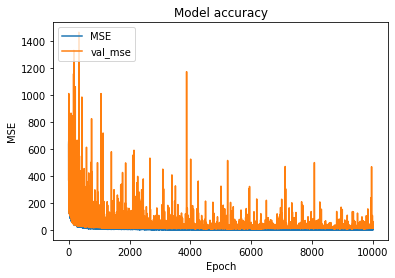

In [326]:
from pylab import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Generate dummy data


#Define the model
def baseline_model():
    model = tf.keras.Sequential()
    model.add(Dense(1000, activation=tf.nn.relu, input_shape=[4]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'linear'))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse','mean_absolute_error'])
    return model

# model.summary()
#Use the model
regr = baseline_model()
# history = regr.fit(normalized_d[:TOP],normalized_f[:TOP],epochs =5,batch_size = 512)

history = regr.fit(standardized[:TOP], Y[:TOP], epochs=10000, batch_size=1000,  verbose=1, validation_split=0.2)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['MSE', 'val_mse'], loc='upper left')
plt.show()


# Prediction Values

In [332]:
regr.predict(standardized[TOP:TOP+20])

array([[ 19.431433 ],
       [  9.288025 ],
       [  1.25494  ],
       [  2.449377 ],
       [ 75.63673  ],
       [  2.144989 ],
       [ 13.843324 ],
       [  0.7913685],
       [  7.8266315],
       [  1.9083252],
       [  9.694857 ],
       [  1.4090672],
       [ 34.923176 ],
       [  3.4558067],
       [ 12.732265 ],
       [  9.899725 ],
       [  1.1671143],
       [127.81349  ],
       [  4.5070324],
       [  4.3981266]], dtype=float32)

In [ ]:
k = regr.predict(standardized[TOP:])

# Real Values

In [333]:
Y[TOP:TOP+20]

array([ 19.1148,   9.5683,   2.1939,   2.5055,  77.0923,   2.5215,
        14.0992,   0.9183,   8.3548,   2.0779,  10.1278,   1.5107,
        34.0356,   3.8931,  13.1915,   9.7354,   1.3446, 126.0504,
         4.8575,   4.4386])

# Error Level

In [331]:
ttt = (np.setdiff1d(k, Y[TOP:]))
sum(ttt)/len(Y[TOP:])

1.5150448495515045

In [302]:
import random 
from random import randint
Y = []
M = []
for i in range(0,len(B_dict)):
#     j = randint(0,len(B_dict)-1)
#     k = randint(0,len(B_dict)-1)
#     l = randint(0,len(B_dict)-1)
#     m = randint(0,len(B_dict)-1)
    S = y_direct(B_dict[i],n_dict[i],S0_dict[i],Q_dict[i])
    Y.append(round(S,4))
    M.append([B_dict[i],n_dict[i],S0_dict[i],Q_dict[i]])
#link inputs of each iteration to input array train
# possibly do every combo first then do rand on test data

Y = np.array(Y)

#not random 

/shared/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


In [303]:
from sklearn.preprocessing import StandardScaler
M = np.array(M)
# demonstrate data standardization with sklearn

# load data
data = M
# create scaler
scaler = StandardScaler()
# fit scaler on data
scaler.fit(data)
# apply transform
standardized = scaler.transform(data)
# inverse transform
inverse = scaler.inverse_transform(standardized)

Train on 720000 samples, validate on 180000 samples
Epoch 1/60
720000/720000 [==============================] - 2s 3us/sample - loss: 0.7580 - mse: 0.7580 - mean_absolute_error: 0.2907 - val_loss: 0.8900 - val_mse: 0.8900 - val_mean_absolute_error: 0.5422
Epoch 2/60
720000/720000 [==============================] - 2s 3us/sample - loss: 0.0058 - mse: 0.0058 - mean_absolute_error: 0.0206 - val_loss: 6.8408 - val_mse: 6.8408 - val_mean_absolute_error: 1.0742
Epoch 3/60
720000/720000 [==============================] - 2s 3us/sample - loss: 0.0015 - mse: 0.0015 - mean_absolute_error: 0.0127 - val_loss: 12.9485 - val_mse: 12.9485 - val_mean_absolute_error: 1.4536
Epoch 4/60
720000/720000 [==============================] - 2s 3us/sample - loss: 7.7806e-04 - mse: 7.7806e-04 - mean_absolute_error: 0.0117 - val_loss: 18.1997 - val_mse: 18.1997 - val_mean_absolute_error: 1.7132
Epoch 5/60
720000/720000 [==============================] - 2s 3us/sample - loss: 5.3711e-04 - mse: 5.3711e-04 - mean_ab

Epoch 39/60
720000/720000 [==============================] - 2s 3us/sample - loss: 2.1870e-04 - mse: 2.1870e-04 - mean_absolute_error: 0.0088 - val_loss: 520.9328 - val_mse: 520.9329 - val_mean_absolute_error: 10.0573
Epoch 40/60
720000/720000 [==============================] - 2s 3us/sample - loss: 2.2852e-04 - mse: 2.2852e-04 - mean_absolute_error: 0.0090 - val_loss: 517.4531 - val_mse: 517.4531 - val_mean_absolute_error: 10.0451
Epoch 41/60
720000/720000 [==============================] - 2s 3us/sample - loss: 4.2721e-04 - mse: 4.2721e-04 - mean_absolute_error: 0.0111 - val_loss: 508.7664 - val_mse: 508.7664 - val_mean_absolute_error: 10.0446
Epoch 42/60
720000/720000 [==============================] - 2s 3us/sample - loss: 3.2030e-04 - mse: 3.2030e-04 - mean_absolute_error: 0.0097 - val_loss: 508.3874 - val_mse: 508.3874 - val_mean_absolute_error: 9.9975
Epoch 43/60
720000/720000 [==============================] - 2s 3us/sample - loss: 1.7072e-04 - mse: 1.7072e-04 - mean_absolute_e

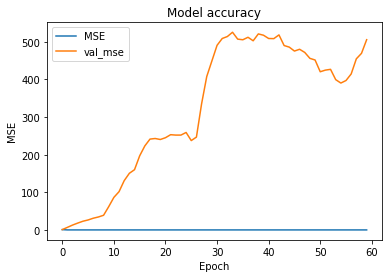

In [305]:
from pylab import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Generate dummy data


#Define the model
def baseline_model():
    model = tf.keras.Sequential()
    model.add(Dense(512, activation=tf.nn.relu, input_shape=[4]))
    model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'linear'))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse','mean_absolute_error'])
    return model

# model.summary()
#Use the model
regr = baseline_model()
# history = regr.fit(normalized_d[:TOP],normalized_f[:TOP],epochs =5,batch_size = 512)

history = regr.fit(standardized[:TOP], Y[:TOP], epochs=60, batch_size=1000,  verbose=1, validation_split=0.2)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['MSE', 'val_mse'], loc='upper left')
plt.show()


In [341]:
from pylab import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Generate dummy data


#Define the model
def baseline_model():
    model = tf.keras.Sequential()
    model.add(Dense(1000, activation=tf.nn.relu, input_shape=[4]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'linear'))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse','mean_absolute_error'])
    return model

# model.summary()
#Use the model
regr = baseline_model()
# history = regr.fit(normalized_d[:TOP],normalized_f[:TOP],epochs =5,batch_size = 512)

history = regr.fit(standardized[:TOP], Y[:TOP], epochs=10, batch_size=1000,  verbose=1, validation_split=0.2)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['MSE', 'val_mse'], loc='upper left')
plt.show()


ModuleNotFoundError: No module named 'tensorflow_gpu'

In [335]:
M


array([[1.71379446e+03, 2.14796400e-02, 1.82823703e-04, 2.25643330e+03],
       [1.09439494e+03, 3.26177200e-02, 5.17359586e-04, 1.26291755e+05],
       [7.82516360e+02, 1.73485600e-02, 4.09826465e-04, 1.25589260e+03],
       ...,
       [4.48069460e+02, 1.59830800e-02, 1.88808916e-03, 1.20379490e+05],
       [9.55801500e+02, 3.65119600e-02, 1.78686812e-03, 6.21319523e+03],
       [5.42121200e+02, 1.60602400e-02, 1.61567870e-03, 8.55435955e+04]])

In [336]:
standardized

array([[ 1.22862754, -0.73784379, -0.48315088, -0.66616598],
       [ 0.13964361,  0.2267703 , -0.03923396,  2.61949383],
       [-0.40867901, -1.09561622, -0.18192649, -0.69267001],
       ...,
       [-0.99667963, -1.2138737 ,  1.77967425,  2.46287964],
       [-0.10402147,  0.56403119,  1.64535761, -0.5613525 ],
       [-0.83132458, -1.20719125,  1.41819549,  1.54008686]])

In [362]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0
